# Intro
Name:  

    Explore_cld_retrieval_2017_v2

Purpose:  

    Run throught the retrieved cloud properties and either flag or assure retrieval quality
    Use the rertievals based on multiple different ACAOD
  
Input:

    none at command line
  
Output:

    figures and save files...
  
Keywords:

    none
  
Dependencies:

    - Sp_parameters.py : for Sp class definition, and for defining the functions used to build parameters
    - matplotlib
    - mpltools
    - numpy
    - scipy : for saving and reading
    - plotting_utils (user defined plotting routines)
    - hdf5storage
  
Needed Files:

  - file.rc : for consistent creation of look of matplotlib figures
  - 4STAR_cloud retrieval .mat files
  
 Modification History:
 
     Written: by Samuel LeBlanc, NASA Ames, Moffett Field, CA, 2016-10-26
     Modified: Samuel LeBlanc, Sanata Cruz, 2019-08-26
               - based on 2016_v2 notebook
     Modified: Samuel LeBlanc, NASA Ames, Moffett Field, CA, 2019-09-17
               - modified for use on 2017 data

# Import of modules

In [1]:
%config InlineBackend.rc = {}
import matplotlib 
#matplotlib.rc_file('C:\\Users\\sleblan2\\Research\\python_codes\\file.rc')
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpltools import color
%matplotlib notebook
import numpy as np
import scipy.io as sio
import hdf5storage as hs
import Sp_parameters as Sp

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from path_utils import getpath

In [3]:
from Sp_parameters import smooth

In [4]:
fo = getpath('ORACLES')

Return path named:  ORACLES /mnt/c/Users/sleblanc/Research/ORACLES/


In [15]:
fp = fo+'starzen_2017/v1/'
fp_plot = fo+'plot_2017/'

In [8]:
fp, fp_plot

(u'/mnt/c/Users/sleblanc/Research/ORACLES/starzen_2017/',
 u'/mnt/c/Users/sleblanc/Research/ORACLES/plot_2017/')

In [9]:
vr = 'R0'

# Load the files

In [10]:
dds = ['20170801','20170802','20170807','20170809', '20170812','20170813',
        '20170815','20170817','20170818','20170819','20170821',
        '20170824','20170826','20170828','20170830','20170831','20170902','20170903','20170904']

In [48]:
rts_low, rts_mid, rts_80, rts_65, rts_05, rts_10, rts_15 = [],[],[],[],[],[],[]
sps = []

In [14]:
daystr

'20170801'

In [49]:
for daystr in dds:
    print daystr
    rt = hs.loadmat(fp+'lowaod/{}_zen_cld_retrieved.mat'.format(daystr))
    s = sio.loadmat(fp+'4STAR_{}starzen.mat'.format(daystr))
    sp = Sp.Sp(s)
    rts_low.append(rt)
    sps.append(sp)

20170801
1556 1556
in rads
(734, 1556) 2 1556
1 in ui
(734, 1556)
Calculating the utc times
No indexed good values, choosing all times that are greater than 0 and that are not parked
good length: 176 / 734
20170802
1556 1556
in rads
(303, 1556) 2 1556
1 in ui
(303, 1556)
Calculating the utc times
No indexed good values, choosing all times that are greater than 0 and that are not parked
good length: 227 / 303
20170807
1556 1556
in rads
(129, 1556) 2 1556
1 in ui
(129, 1556)
Calculating the utc times
No indexed good values, choosing all times that are greater than 0 and that are not parked
good length: 129 / 129
20170809
1556 1556
in rads
(1247, 1556) 2 1556
1 in ui
(1247, 1556)
Calculating the utc times
No indexed good values, choosing all times that are greater than 0 and that are not parked
good length: 974 / 1247
20170812
1556 1556
in rads
(412, 1556) 2 1556
1 in ui
(412, 1556)
Calculating the utc times
No indexed good values, choosing all times that are greater than 0 and that are n

In [50]:
for daystr in dds:
    print daystr
    rt =[]
    rt = hs.loadmat(fp+'midaod/{}_zen_cld_retrieved.mat'.format(daystr))
    rts_mid.append(rt)

20170801
20170802
20170807
20170809
20170812
20170813
20170815
20170817
20170818
20170819
20170821
20170824
20170826
20170828
20170830
20170831
20170902
20170903
20170904


In [51]:
for daystr in dds:
    print daystr
    rt = []
    rt = hs.loadmat(fp+'65aod/{}_zen_cld_retrieved.mat'.format(daystr))
    rts_65.append(rt)

20170801
20170802
20170807
20170809
20170812
20170813
20170815
20170817
20170818
20170819
20170821
20170824
20170826
20170828
20170830
20170831
20170902
20170903
20170904


In [52]:
for daystr in dds:
    print daystr
    rt = []
    rt = hs.loadmat(fp+'80aod/{}_zen_cld_retrieved.mat'.format(daystr))
    rts_80.append(rt)

20170801
20170802
20170807
20170809
20170812
20170813
20170815
20170817
20170818
20170819
20170821
20170824
20170826
20170828
20170830
20170831
20170902
20170903
20170904


In [53]:
for daystr in dds:
    print daystr
    rt = []
    rt = hs.loadmat(fp+'05aod/{}_zen_cld_retrieved.mat'.format(daystr))
    rts_05.append(rt)

20170801
20170802
20170807
20170809
20170812
20170813
20170815
20170817
20170818
20170819
20170821
20170824
20170826
20170828
20170830
20170831
20170902
20170903
20170904


In [54]:
for daystr in dds:
    print daystr
    rt = []
    rt = hs.loadmat(fp+'10aod/{}_zen_cld_retrieved.mat'.format(daystr))
    rts_10.append(rt)

20170801
20170802
20170807
20170809
20170812
20170813
20170815
20170817
20170818
20170819
20170821
20170824
20170826
20170828
20170830
20170831
20170902
20170903
20170904


In [55]:
for daystr in dds:
    print daystr
    rt = []
    rt = hs.loadmat(fp+'15aod/{}_zen_cld_retrieved.mat'.format(daystr))
    rts_15.append(rt)

20170801
20170802
20170807
20170809
20170812
20170813
20170815
20170817
20170818
20170819
20170821
20170824
20170826
20170828
20170830
20170831
20170902
20170903
20170904


## Load the cloud probe incloud flag

In [17]:
from load_utils import mat2py_time,toutc

In [18]:
p = sio.netcdf_file(fp+'..//data_other//oracles.cloud.timings.nc','r')

In [19]:
p.variables

OrderedDict([('timevec_20160902',
              <scipy.io.netcdf.netcdf_variable at 0x7f2b61900590>),
             ('timevec_20160904',
              <scipy.io.netcdf.netcdf_variable at 0x7f2b61900090>),
             ('timevec_20160906',
              <scipy.io.netcdf.netcdf_variable at 0x7f2b61900510>),
             ('timevec_20160908',
              <scipy.io.netcdf.netcdf_variable at 0x7f2b61900710>),
             ('timevec_20160910',
              <scipy.io.netcdf.netcdf_variable at 0x7f2b61900810>),
             ('timevec_20160912',
              <scipy.io.netcdf.netcdf_variable at 0x7f2b61900410>),
             ('timevec_20160914',
              <scipy.io.netcdf.netcdf_variable at 0x7f2b61900990>),
             ('timevec_20160918',
              <scipy.io.netcdf.netcdf_variable at 0x7f2b61900890>),
             ('timevec_20160920',
              <scipy.io.netcdf.netcdf_variable at 0x7f2b61900550>),
             ('timevec_20160924',
              <scipy.io.netcdf.netcdf_variable a

In [20]:
p.variables['timevec_20160914'].data

array([736587.32859954, 736587.32861111, 736587.32862269, ...,
       736587.65826389, 736587.65827546, 736587.65828704])

In [21]:
t_0914 = mat2py_time(p.variables['timevec_20160914'].data)

<IPython.core.display.Javascript object>


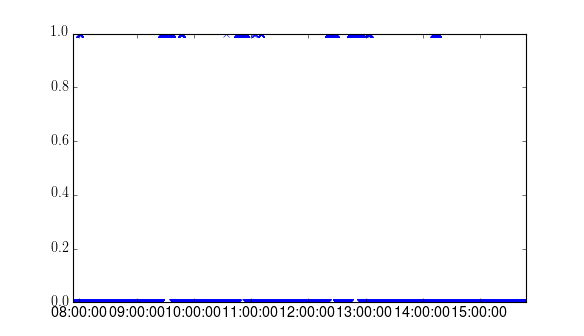

In [28]:
plt.figure()
plt.plot(t_0914,p.variables['cloud_time_20160914'].data,'x')

## Load the AOD ict files

In [56]:
ar6 = hs.loadmat(fo+'/aod_ict_2017/R1/all_aod_ict_R1_2017.mat')

ar6['flac'] = (ar6['qual_flag']==0)&(ar6['flag_acaod']==1)
ar6['flacr'] = (ar6['qual_flag']==0)&(ar6['flag_acaod']==1)&(ar6['fl_routine'])
ar6['flaco'] = (ar6['qual_flag']==0)&(ar6['flag_acaod']==1)&~(ar6['fl_routine'])

ar6['flr'] = (ar6['qual_flag']==0) & (ar6['fl_routine'])
ar6['flo'] = (ar6['qual_flag']==0) & ~(ar6['fl_routine'])
ar6['fl'] = (ar6['qual_flag']==0)

# Start plotting the results

In [57]:
rt.keys()

[u'tau', u'utc', u'ki', u'sza', u'lon', u'lat', u'phase', u'alt', u'ref']

<IPython.core.display.Javascript object>


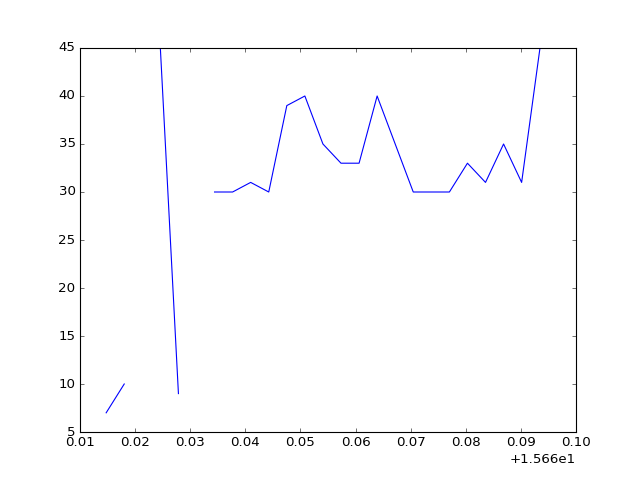

In [58]:
plt.figure()
plt.plot(rt['utc'],rt['tau'])

In [37]:
rt = rts[9]

NameError: name 'rts' is not defined

<IPython.core.display.Javascript object>


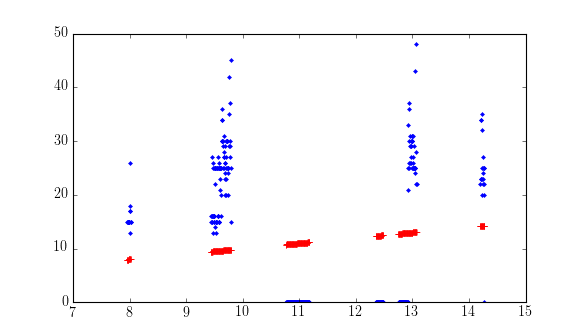

In [15]:
plt.figure()
plt.plot(rts[9]['utc'],rts[9]['tau'],'.')
plt.plot(rts[9]['utc'],rts[9]['utc'],'r+')

<IPython.core.display.Javascript object>


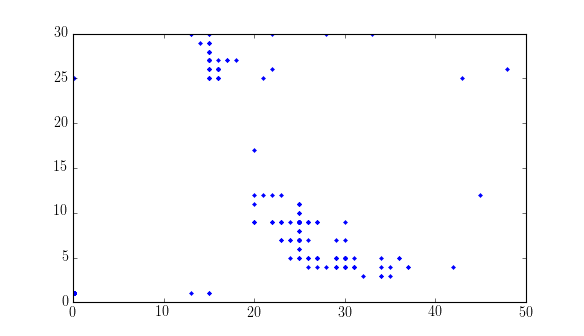

In [16]:
plt.figure()
plt.plot(rts[9]['tau'],rts[9]['ref'],'.')

In [12]:
igood = rts[9]['tau']>0

In [13]:
igood[0:10]

array([False, False, False,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

In [59]:
sp = sps[9]

<IPython.core.display.Javascript object>


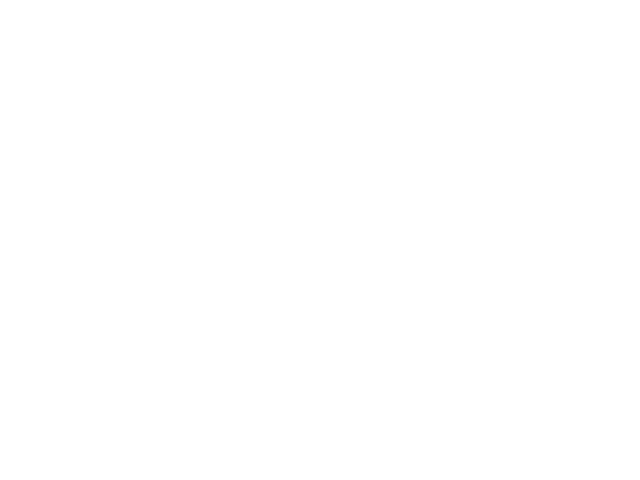

IndexError: index 68 is out of bounds for axis 0 with size 5

In [60]:
i=68
i_vis = [1061,1062,1064]
i_nir = [1060,1063]
plt.figure()
plt.plot(sp.wvl,sp.norm[i,:])
#plt.xlim(970,1030)
plt.plot(sp.wvl[i_vis],sp.norm[i,i_vis],'rx')
plt.plot(sp.wvl[i_nir],sp.norm[i,i_nir],'g+')


In [16]:
np.nanmean(sp.norm[i,iw])

NameError: name 'iw' is not defined

In [17]:
np.nanmean(sp.norm[i,ii])

NameError: name 'ii' is not defined

## Plot some of the sza for each day to ensure good fitting of lut

<IPython.core.display.Javascript object>


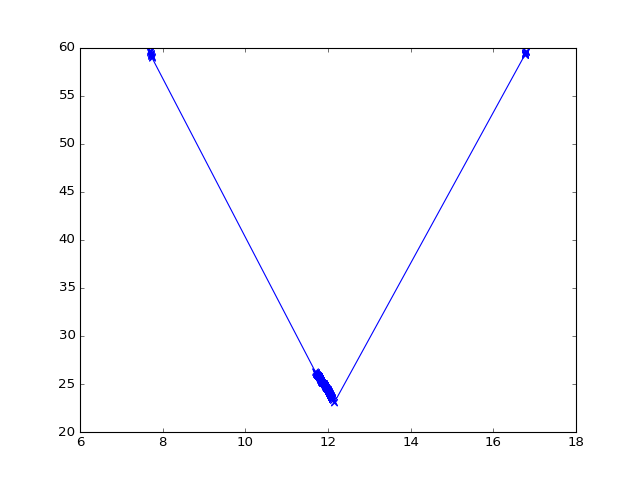

In [61]:
plt.figure()
plt.plot(sps[7].utc,sps[7].sza,'x-')

# Now setup filters to weed out bad data

## Filter out data points where nir and vis spectrometers don't match

In [62]:
i_vis = [1061,1062,1064]
i_nir = [1060,1063]

In [63]:
for i,daystr in enumerate(dds):
    nvis = np.nanmean(sps[i].norm[:,i_vis],axis=1)
    nnir = np.nanmean(sps[i].norm[:,i_nir],axis=1)
    rts_low[i]['delta'] = abs(nvis-nnir)
    rts_low[i]['fl_match'] = rts_low[i]['delta']<0.06
    
    print daystr,rts_low[i]['delta'].shape,rts_low[i]['delta'][rts_low[i]['fl_match']].shape,\
        float(rts_low[i]['delta'][rts_low[i]['fl_match']].shape[0])/ float(rts_low[i]['delta'].shape[0])*100.0
        
    rts_mid[i]['delta'] = abs(nvis-nnir)
    rts_mid[i]['fl_match'] = rts_low[i]['delta']<0.06
    rts_65[i]['delta'] = abs(nvis-nnir)
    rts_65[i]['fl_match'] = rts_low[i]['delta']<0.06
    rts_80[i]['delta'] = abs(nvis-nnir)
    rts_80[i]['fl_match'] = rts_low[i]['delta']<0.06
    rts_05[i]['fl_match'] = rts_low[i]['delta']<0.06
    rts_10[i]['fl_match'] = rts_low[i]['delta']<0.06
    rts_15[i]['fl_match'] = rts_low[i]['delta']<0.06

20170801 (734,) (204,) 27.7929155313
20170802 (303,) (206,) 67.9867986799
20170807 (129,) (0,) 0.0
20170809 (1247,) (803,) 64.3945469126
20170812 (412,) (280,) 67.9611650485
20170813 (1211,) (261,) 21.5524360033
20170815 (455,) (370,) 81.3186813187
20170817 (703,) (233,) 33.1436699858
20170818 (349,) (111,) 31.8051575931
20170819 (5,) (0,) 0.0
20170821 (1566,) (0,) 0.0
20170824 (1356,) (715,) 52.7286135693
20170826 (337,) (97,) 28.7833827893
20170828 (541,) (235,) 43.438077634
20170830 (186,) (123,) 66.1290322581
20170831 (83,) (26,) 31.3253012048
20170902 (44,) (17,) 38.6363636364
20170903 (159,) (126,) 79.2452830189
20170904 (28,) (22,) 78.5714285714


## Now filter out the times which were at too high altitude

In [64]:
fl_alt = rt['alt']<1000.0

In [65]:
for i,daystr in enumerate(dds):
    rts_low[i]['fl_alt'] = rts_low[i]['alt'][:,0]<1000.0
    print daystr,rts_low[i]['utc'].shape,rts_low[i]['utc'][rts_low[i]['fl_alt']].shape,\
        float(rts_low[i]['utc'][rts_low[i]['fl_alt']].shape[0])/ float(rts_low[i]['utc'].shape[0])*100.0
    rts_mid[i]['fl_alt'] = rts_mid[i]['alt'][:,0]<1000.0
    rts_65[i]['fl_alt'] = rts_65[i]['alt'][:,0]<1000.0
    rts_80[i]['fl_alt'] = rts_80[i]['alt'][:,0]<1000.0
    rts_05[i]['fl_alt'] = rts_80[i]['fl_alt']
    rts_10[i]['fl_alt'] = rts_80[i]['fl_alt']
    rts_15[i]['fl_alt'] = rts_80[i]['fl_alt']

20170801 (734,) (0,) 0.0
20170802 (303,) (178,) 58.7458745875
20170807 (129,) (52,) 40.3100775194
20170809 (1247,) (971,) 77.8668805132
20170812 (412,) (379,) 91.9902912621
20170813 (1211,) (506,) 41.7836498761
20170815 (455,) (423,) 92.967032967
20170817 (703,) (316,) 44.9502133713
20170818 (349,) (187,) 53.5816618911
20170819 (5,) (0,) 0.0
20170821 (1566,) (1386,) 88.5057471264
20170824 (1356,) (878,) 64.7492625369
20170826 (337,) (250,) 74.1839762611
20170828 (541,) (271,) 50.0924214418
20170830 (186,) (127,) 68.2795698925
20170831 (83,) (70,) 84.3373493976
20170902 (44,) (44,) 100.0
20170903 (159,) (159,) 100.0
20170904 (28,) (0,) 0.0


## Filter for in cloud

In [66]:
from write_utils import nearest_neighbor

In [29]:
for i,daystr in enumerate(dds):
    try:
        p_time = mat2py_time(p.variables['timevec_{}'.format(daystr)].data)
    except KeyError: # no in cloud data, so choose all of them
        rts_low[i]['fl_incld'] = rts_low[i]['utc']>0.0
        continue
    putc = toutc(p_time)
    rts_low[i]['incld'] = nearest_neighbor(putc,p.variables['cloud_time_{}'.format(daystr)].data,rts_low[i]['utc'],dist=1.0/3600)
    rts_low[i]['fl_incld'] = rts_low[i]['incld']==0
    print daystr,rts_low[i]['utc'].shape,rts_low[i]['utc'][rts_low[i]['fl_incld']].shape,\
        float(rts_low[i]['utc'][rts_low[i]['fl_incld']].shape[0])/ float(rts_low[i]['utc'].shape[0])*100.0

20160902 (1013,) (707,) 69.7926949654
20160904 (1858,) (911,) 49.0312163617
20160906 (1120,) (762,) 68.0357142857
20160908 (105,) (44,) 41.9047619048
20160910 (1415,) (766,) 54.1342756184
20160912 (662,) (350,) 52.8700906344
20160914 (438,) (199,) 45.4337899543
20160918 (553,) (333,) 60.2169981917
20160920 (341,) (282,) 82.6979472141
20160924 (1369,) (359,) 26.2235208181
20160925 (600,) (267,) 44.5
20160927 (145,) (106,) 73.1034482759


In [30]:
for i,daystr in enumerate(dds):
    rts_mid[i]['fl_incld'] = rts_low[i]['fl_incld']
    rts_65[i]['fl_incld'] = rts_low[i]['fl_incld']
    rts_80[i]['fl_incld'] = rts_low[i]['fl_incld']
    rts_15[i]['fl_incld'] = rts_low[i]['fl_incld']
    rts_10[i]['fl_incld'] = rts_low[i]['fl_incld']
    rts_05[i]['fl_incld'] = rts_low[i]['fl_incld']
    

## Filter for high ki squared residuals

In [67]:
for i,daystr in enumerate(dds):
    rts_low[i]['fl_ki'] = rts_low[i]['ki']<0.6
    print daystr,rts_low[i]['utc'].shape,rts_low[i]['utc'][rts_low[i]['fl_ki']].shape,\
        float(rts_low[i]['utc'][rts_low[i]['fl_ki']].shape[0])/ float(rts_low[i]['utc'].shape[0])*100.0
        
    rts_mid[i]['fl_ki'] = rts_mid[i]['ki']<0.6
    rts_65[i]['fl_ki'] = rts_65[i]['ki']<0.6
    rts_80[i]['fl_ki'] = rts_80[i]['ki']<0.6
    rts_05[i]['fl_ki'] = rts_05[i]['ki']<0.6
    rts_10[i]['fl_ki'] = rts_10[i]['ki']<0.6
    rts_15[i]['fl_ki'] = rts_15[i]['ki']<0.6

20170801 (734,) (140,) 19.0735694823
20170802 (303,) (58,) 19.1419141914
20170807 (129,) (0,) 0.0
20170809 (1247,) (557,) 44.6672012831
20170812 (412,) (304,) 73.786407767
20170813 (1211,) (367,) 30.3055326177
20170815 (455,) (376,) 82.6373626374
20170817 (703,) (272,) 38.6913229018
20170818 (349,) (134,) 38.3954154728
20170819 (5,) (0,) 0.0
20170821 (1566,) (0,) 0.0
20170824 (1356,) (679,) 50.0737463127
20170826 (337,) (134,) 39.762611276
20170828 (541,) (321,) 59.3345656192
20170830 (186,) (116,) 62.3655913978
20170831 (83,) (29,) 34.9397590361
20170902 (44,) (29,) 65.9090909091
20170903 (159,) (70,) 44.0251572327
20170904 (28,) (0,) 0.0


## Combine the filters

In [69]:
tot=0
tot_fl=0
for i,daystr in enumerate(dds):
    rts_low[i]['fl'] = rts_low[i]['fl_match'] & rts_low[i]['fl_alt'] & rts_low[i]['fl_ki']
    print daystr,rts_low[i]['utc'].shape,rts_low[i]['utc'][rts_low[i]['fl']].shape,\
        float(rts_low[i]['utc'][rts_low[i]['fl']].shape[0])/ float(rts_low[i]['utc'].shape[0])*100.0 
    tot = tot+len(rts_low[i]['utc'])
    tot_fl = tot_fl+len(rts_low[i]['utc'][rts_low[i]['fl']])
    
    rts_mid[i]['fl'] = rts_mid[i]['fl_match'] & rts_mid[i]['fl_alt']& rts_mid[i]['fl_ki']
    rts_65[i]['fl'] = rts_65[i]['fl_match'] & rts_65[i]['fl_alt'] & rts_65[i]['fl_ki']
    rts_80[i]['fl'] = rts_80[i]['fl_match'] & rts_80[i]['fl_alt'] & rts_80[i]['fl_ki']
    rts_05[i]['fl'] = rts_05[i]['fl_match'] & rts_05[i]['fl_alt'] & rts_05[i]['fl_ki']
    rts_10[i]['fl'] = rts_10[i]['fl_match'] & rts_10[i]['fl_alt'] & rts_10[i]['fl_ki']
    rts_15[i]['fl'] = rts_15[i]['fl_match'] & rts_15[i]['fl_alt'] & rts_15[i]['fl_ki']

20170801 (734,) (0,) 0.0
20170802 (303,) (38,) 12.5412541254
20170807 (129,) (0,) 0.0
20170809 (1247,) (459,) 36.808340016
20170812 (412,) (259,) 62.8640776699
20170813 (1211,) (219,) 18.0842279108
20170815 (455,) (354,) 77.8021978022
20170817 (703,) (188,) 26.7425320057
20170818 (349,) (53,) 15.1862464183
20170819 (5,) (0,) 0.0
20170821 (1566,) (0,) 0.0
20170824 (1356,) (460,) 33.9233038348
20170826 (337,) (70,) 20.7715133531
20170828 (541,) (122,) 22.550831793
20170830 (186,) (74,) 39.7849462366
20170831 (83,) (25,) 30.1204819277
20170902 (44,) (17,) 38.6363636364
20170903 (159,) (56,) 35.2201257862
20170904 (28,) (0,) 0.0


In [70]:
print tot, tot_fl, float(tot_fl)/float(tot)*100.0

9848 2394 24.3095044679


# Now plot each retrieved product, filtered

In [71]:
from Sp_parameters import smooth

<IPython.core.display.Javascript object>


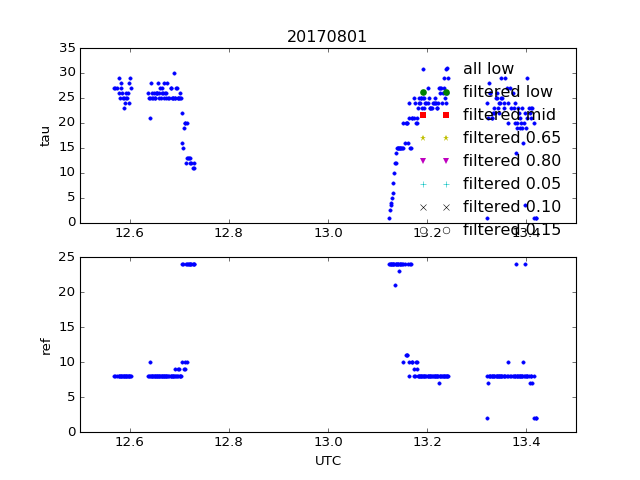

<IPython.core.display.Javascript object>


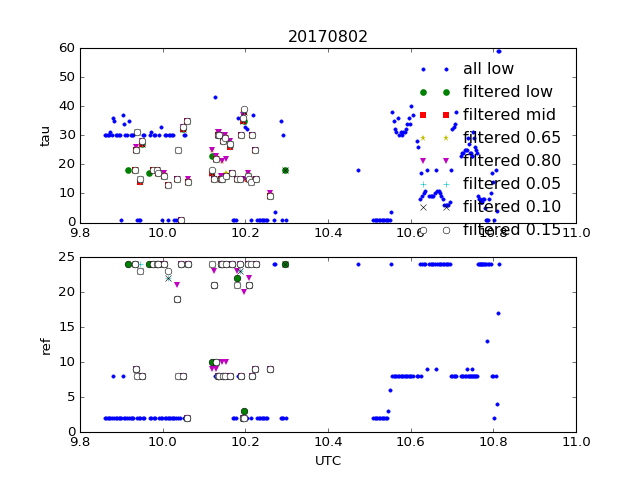

<IPython.core.display.Javascript object>


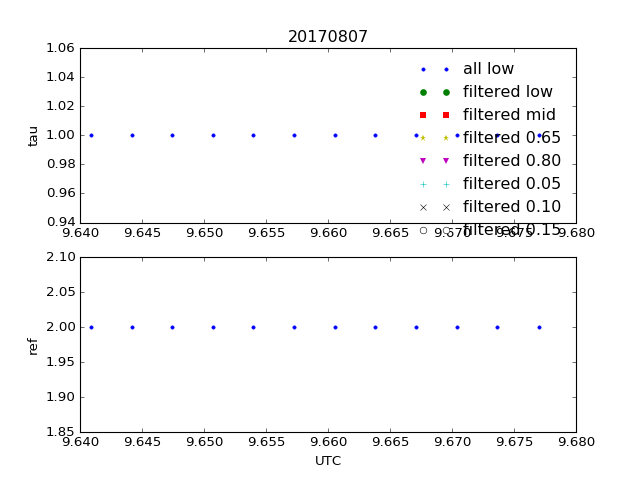

<IPython.core.display.Javascript object>


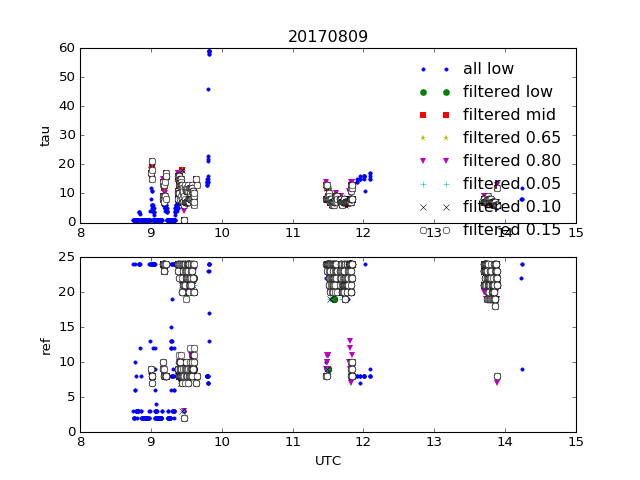

<IPython.core.display.Javascript object>


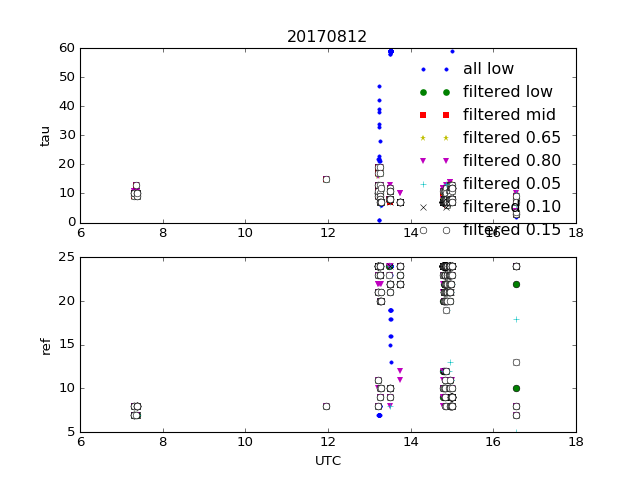

<IPython.core.display.Javascript object>


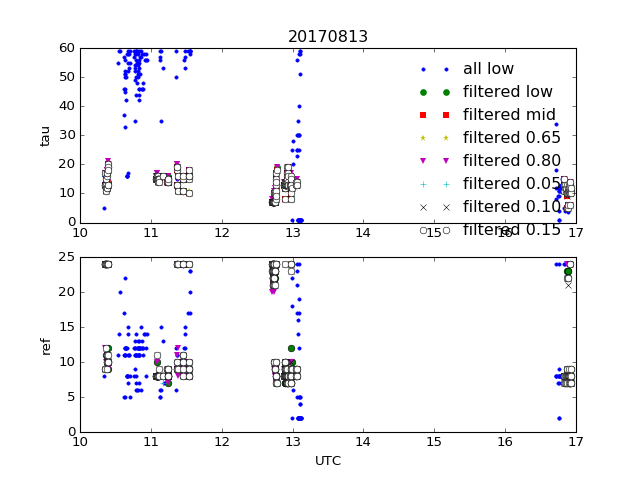

<IPython.core.display.Javascript object>


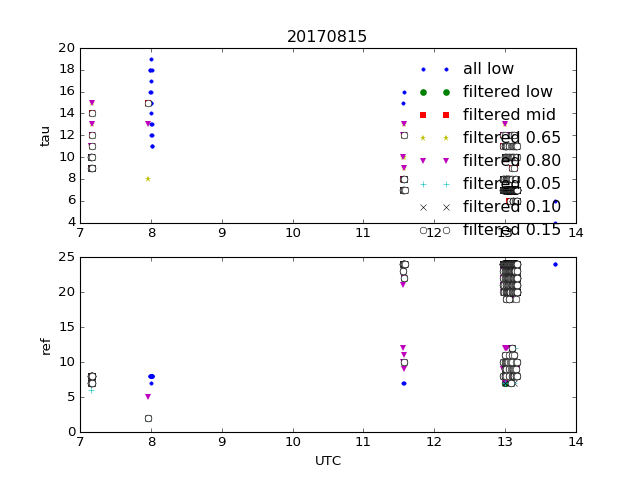

<IPython.core.display.Javascript object>


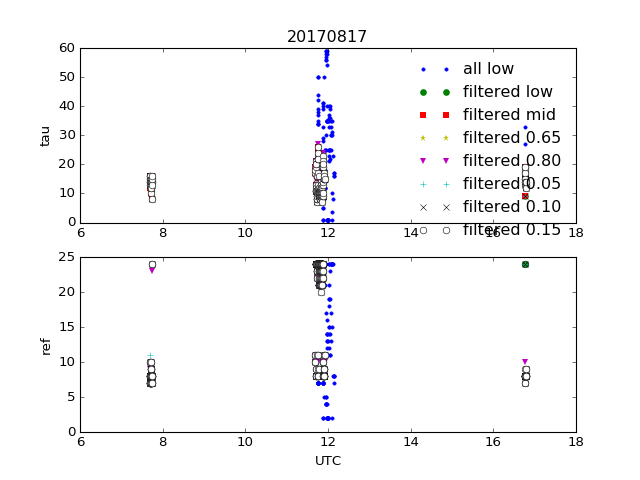

<IPython.core.display.Javascript object>


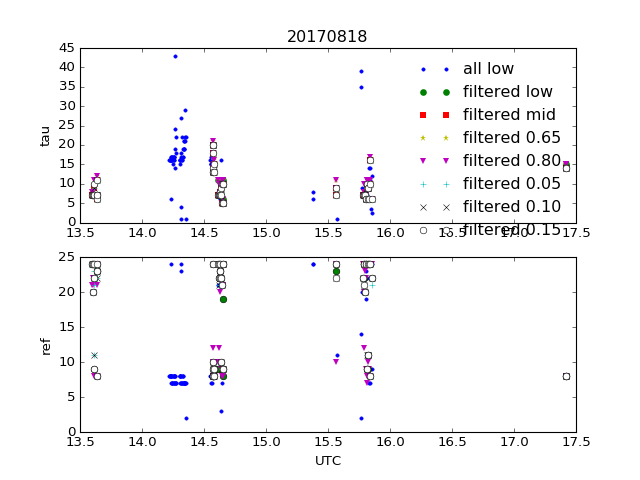

<IPython.core.display.Javascript object>


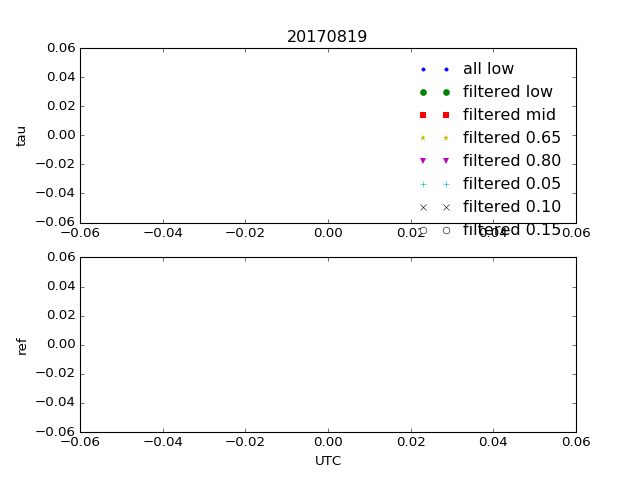

<IPython.core.display.Javascript object>


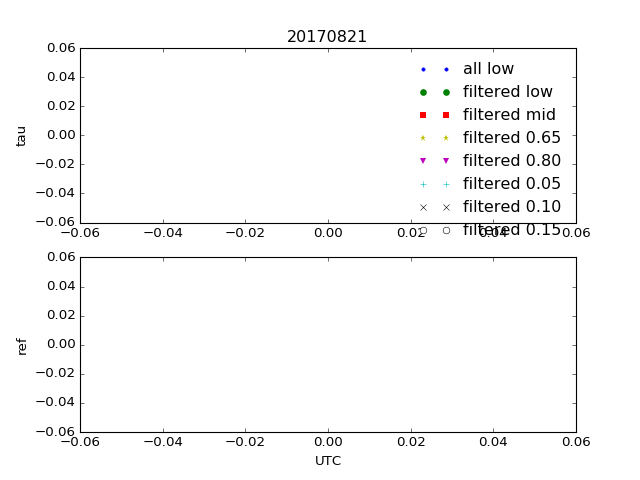

<IPython.core.display.Javascript object>


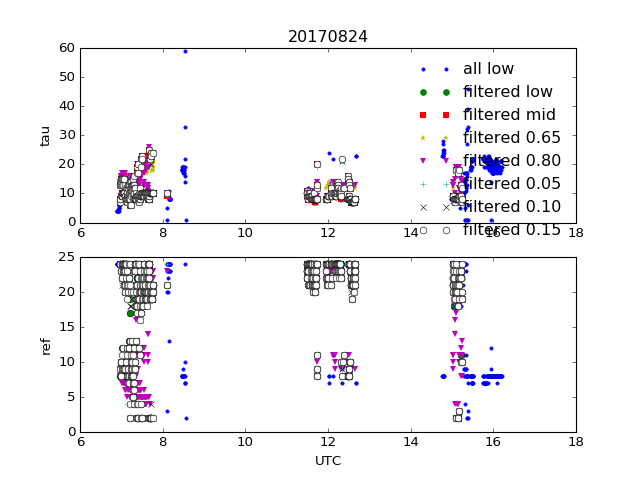

<IPython.core.display.Javascript object>


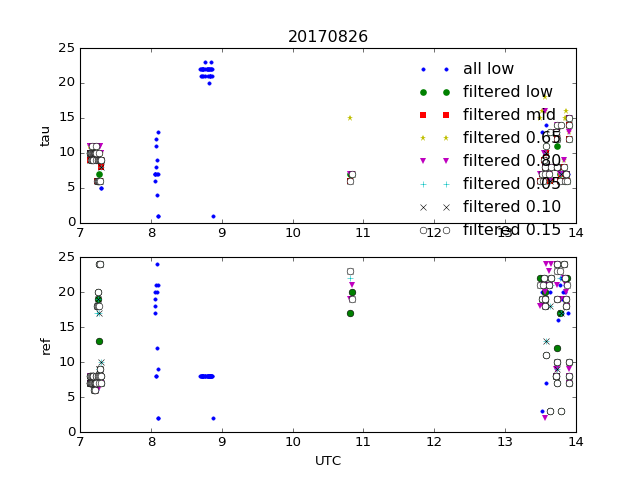

<IPython.core.display.Javascript object>


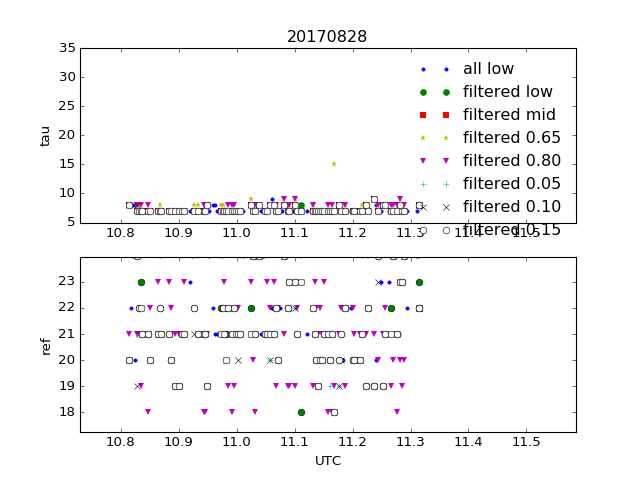

<IPython.core.display.Javascript object>


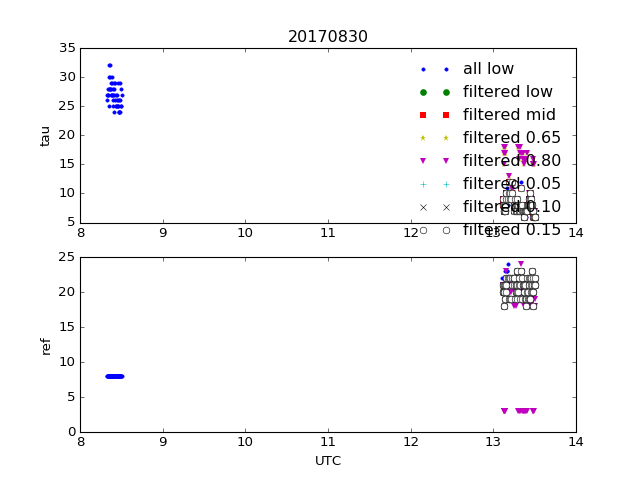

<IPython.core.display.Javascript object>


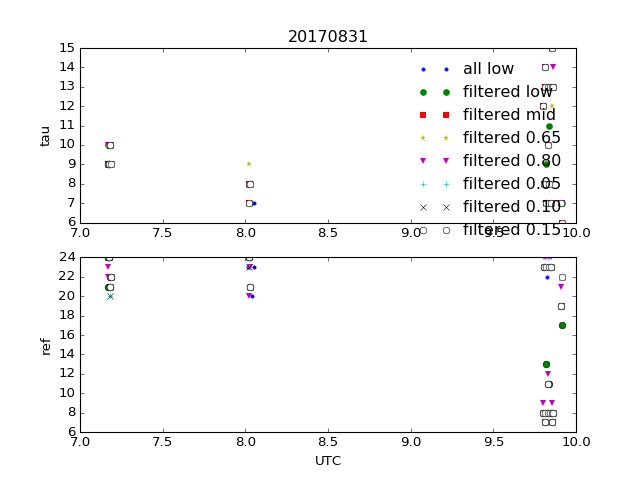

<IPython.core.display.Javascript object>


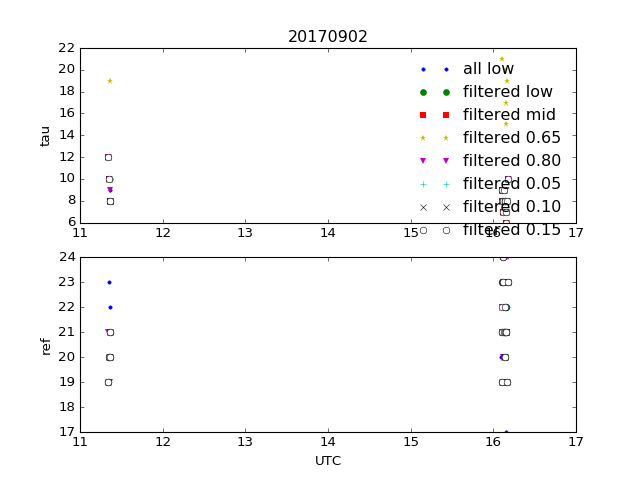

<IPython.core.display.Javascript object>


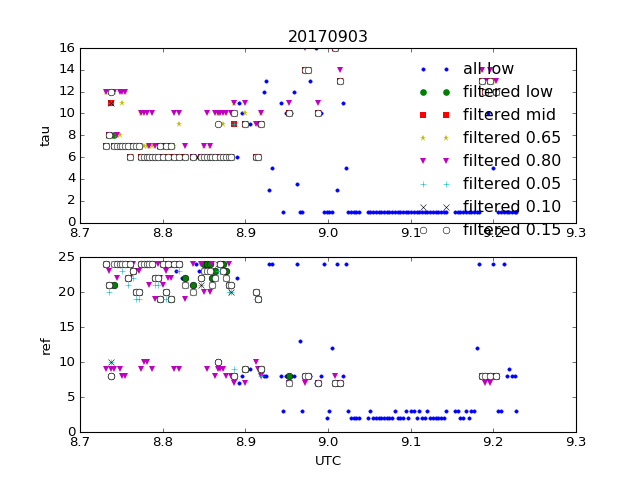

<IPython.core.display.Javascript object>


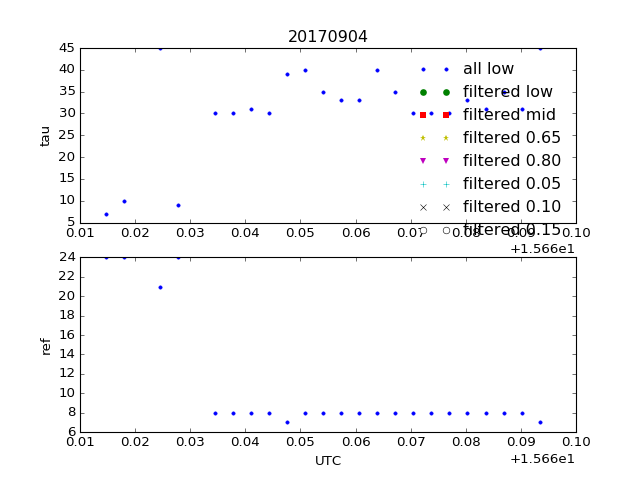

In [167]:
for i,daystr in enumerate(dds):
    plt.figure()
    ax1 = plt.subplot(211)
    ax2 = plt.subplot(212,sharex=ax1)
    ax1.plot(rts_low[i]['utc'],rts_low[i]['tau'],'b.',label='all low')
    ax1.plot(rts_low[i]['utc'][rts_low[i]['fl']],rts_low[i]['tau'][rts_low[i]['fl']],'go',markeredgecolor='None',label='filtered low')
    ax1.plot(rts_mid[i]['utc'][rts_mid[i]['fl']],rts_mid[i]['tau'][rts_mid[i]['fl']],'rs',markeredgecolor='None',label='filtered mid')
    ax1.plot(rts_65[i]['utc'][rts_65[i]['fl']],rts_65[i]['tau'][rts_65[i]['fl']],'y*',markeredgecolor='None',label='filtered 0.65')
    ax1.plot(rts_80[i]['utc'][rts_80[i]['fl']],rts_80[i]['tau'][rts_80[i]['fl']],'mv',markeredgecolor='None',label='filtered 0.80')
    ax1.plot(rts_05[i]['utc'][rts_05[i]['fl']],rts_05[i]['tau'][rts_05[i]['fl']],'c+',label='filtered 0.05')
    ax1.plot(rts_10[i]['utc'][rts_10[i]['fl']],rts_10[i]['tau'][rts_10[i]['fl']],'kx',label='filtered 0.10')
    ax1.plot(rts_15[i]['utc'][rts_15[i]['fl']],rts_15[i]['tau'][rts_15[i]['fl']],'wo',label='filtered 0.15')
    try:
        ax1.plot(rts_low[i]['utc'][rts_low[i]['fl']],smooth(rts_low[i]['tau'][rts_low[i]['fl']],6),'kx',label='smooth low')
    except:
        pass
    ax1.set_ylabel('tau')
    ax1.legend(frameon=False)
    
    ax2.plot(rts_low[i]['utc'],rts_low[i]['ref'],'b.')
    ax2.plot(rts_low[i]['utc'][rts_low[i]['fl']],rts_low[i]['ref'][rts_low[i]['fl']],'go')
    try:
        ax2.plot(rts_low[i]['utc'][rts_low[i]['fl']],smooth(rts_low[i]['ref'][rts_low[i]['fl']],6),'kx')
    except:
        pass
    ax2.plot(rts_80[i]['utc'][rts_80[i]['fl']],rts_80[i]['ref'][rts_80[i]['fl']],'mv',markeredgecolor='None',label='filtered 0.80')
    ax2.plot(rts_05[i]['utc'][rts_05[i]['fl']],rts_05[i]['ref'][rts_05[i]['fl']],'c+',label='filtered 0.05')
    ax2.plot(rts_10[i]['utc'][rts_10[i]['fl']],rts_10[i]['ref'][rts_10[i]['fl']],'kx',label='filtered 0.10')
    ax2.plot(rts_15[i]['utc'][rts_15[i]['fl']],rts_15[i]['ref'][rts_15[i]['fl']],'wo',label='filtered 0.15')
    ax2.set_ylabel('ref')
    ax2.set_xlabel('UTC')
    ax1.set_title(daystr)

<IPython.core.display.Javascript object>


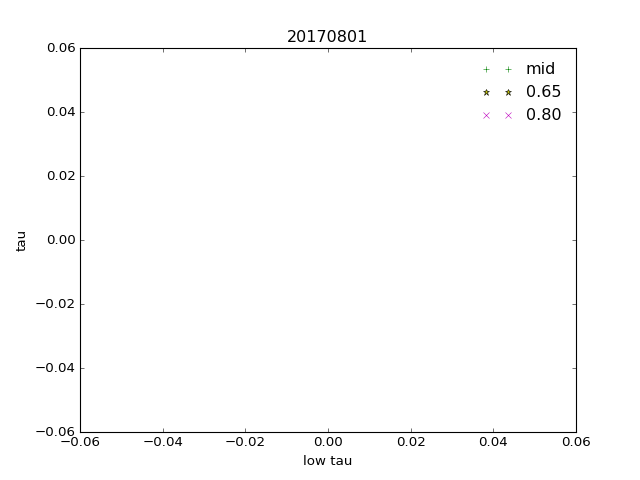

<IPython.core.display.Javascript object>


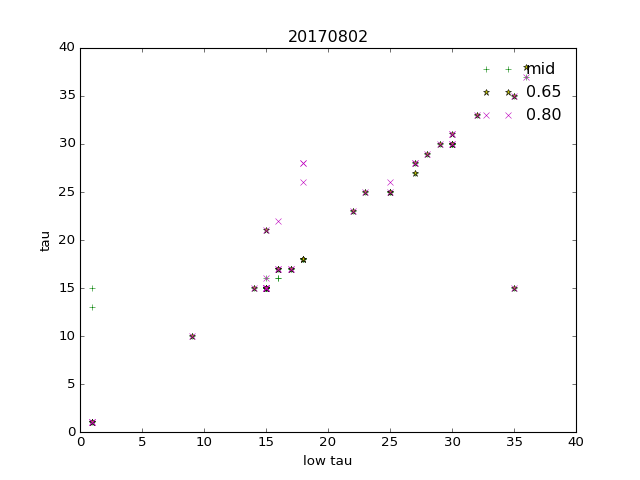

<IPython.core.display.Javascript object>


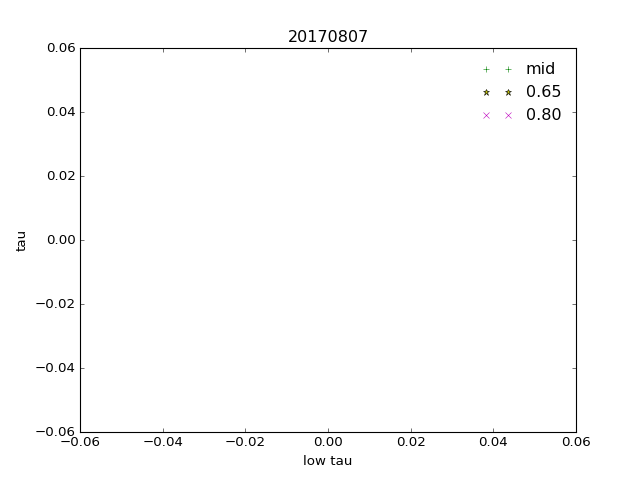

<IPython.core.display.Javascript object>


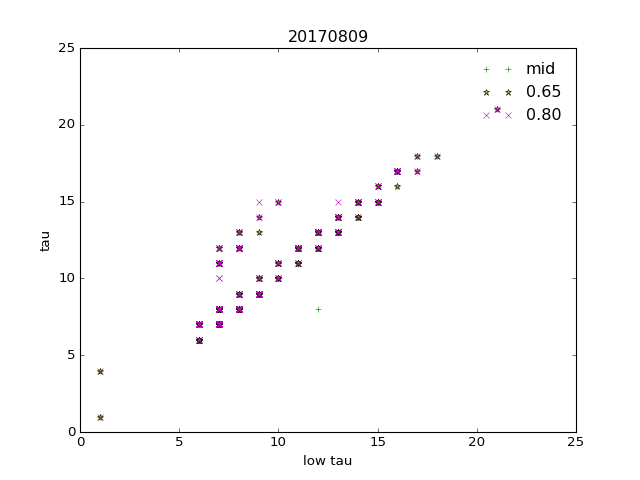

<IPython.core.display.Javascript object>


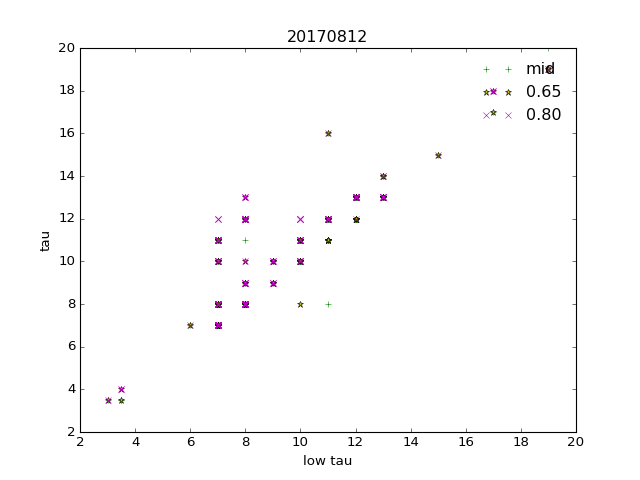

<IPython.core.display.Javascript object>


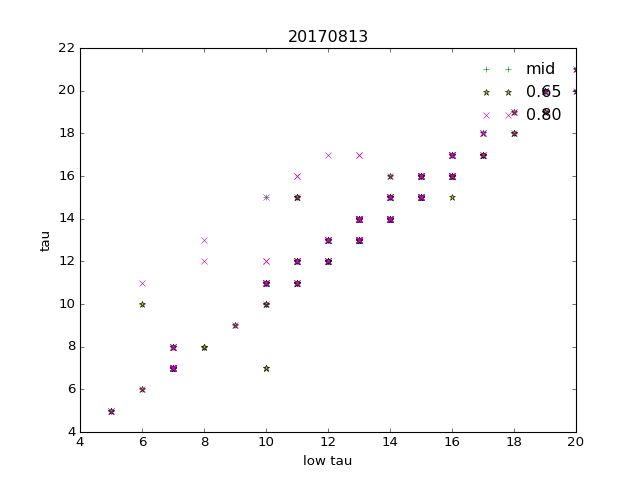

<IPython.core.display.Javascript object>


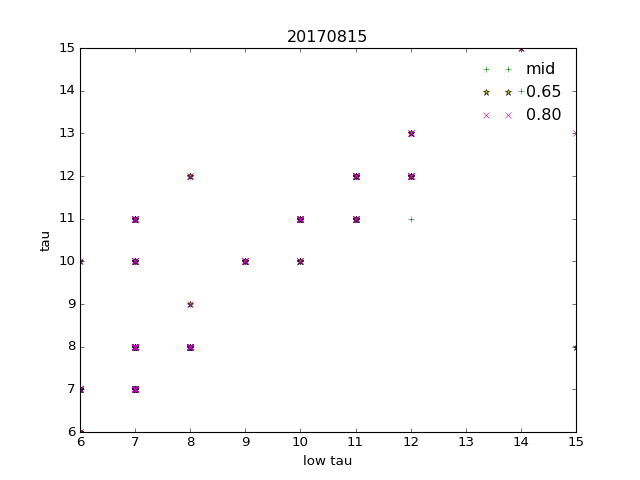

<IPython.core.display.Javascript object>


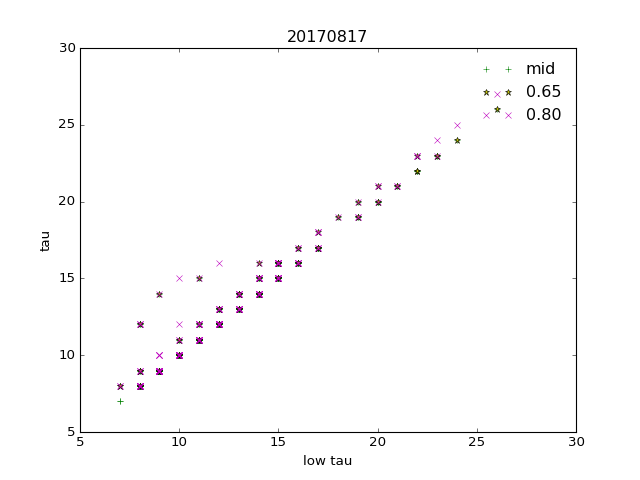

<IPython.core.display.Javascript object>


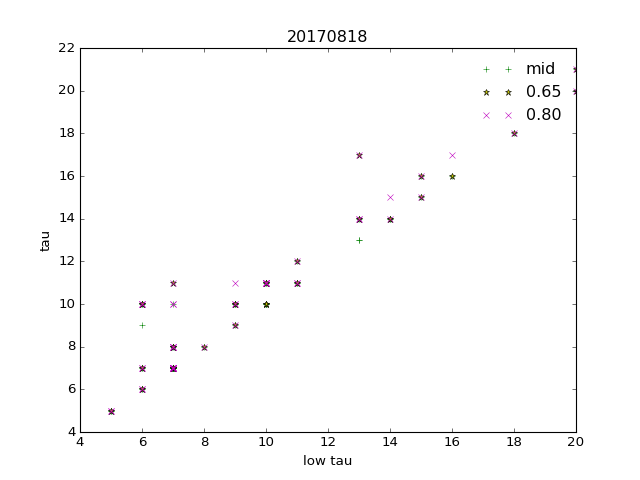

<IPython.core.display.Javascript object>


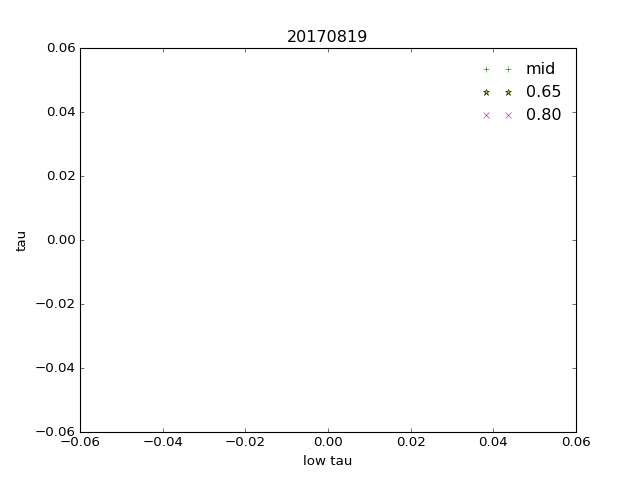

<IPython.core.display.Javascript object>


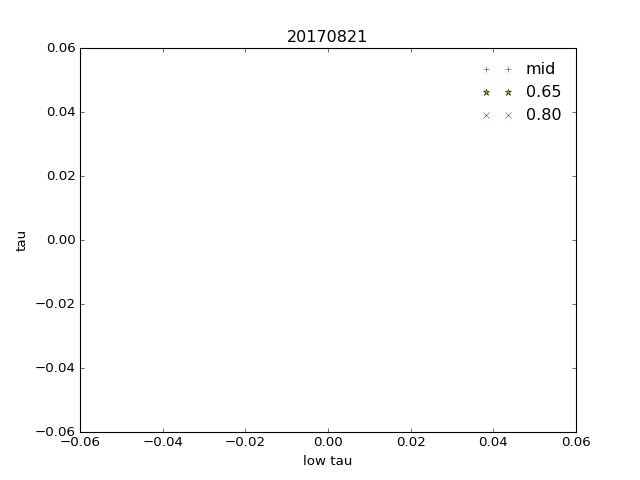

<IPython.core.display.Javascript object>


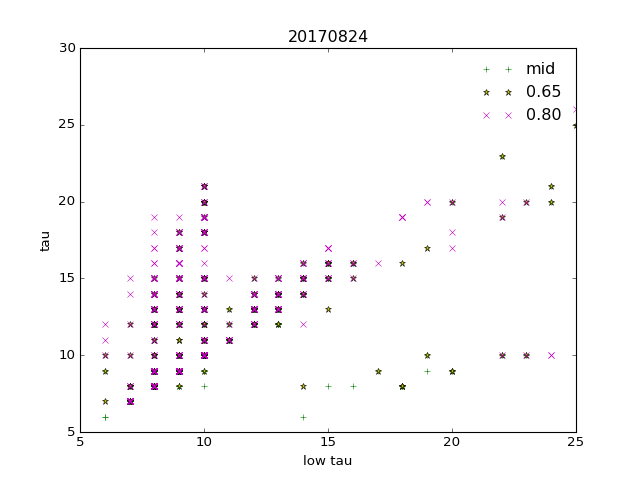

<IPython.core.display.Javascript object>


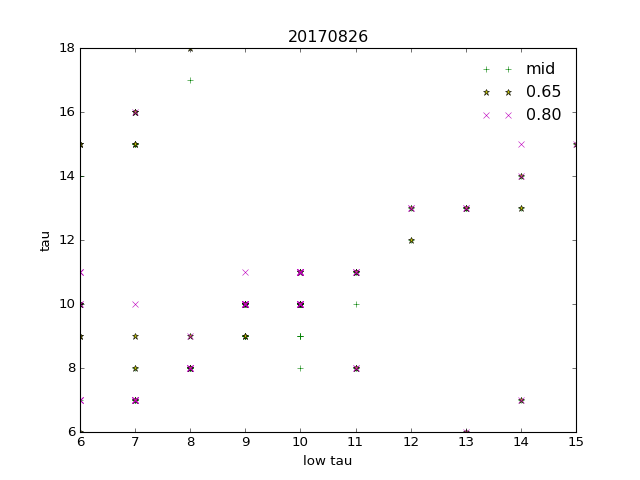

<IPython.core.display.Javascript object>


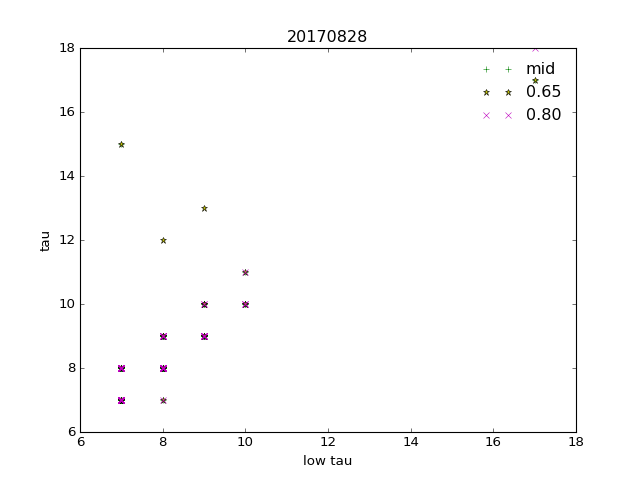

<IPython.core.display.Javascript object>


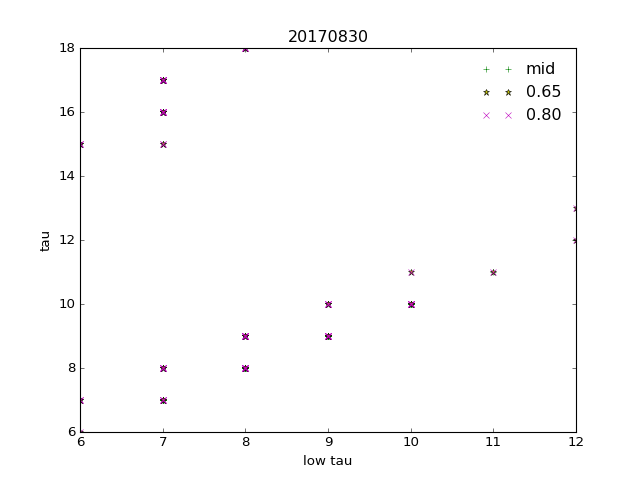

<IPython.core.display.Javascript object>


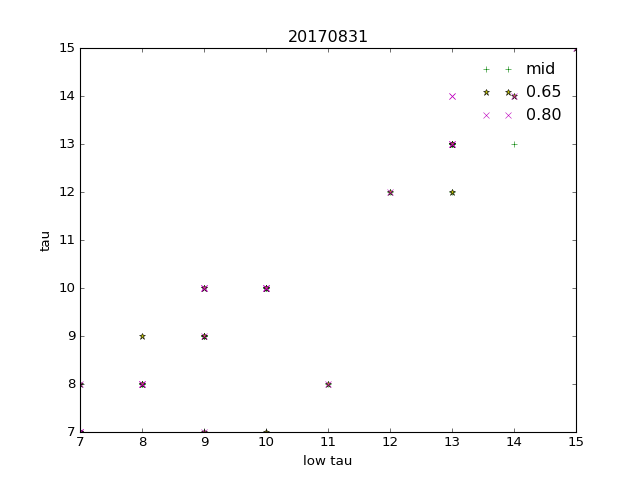

<IPython.core.display.Javascript object>


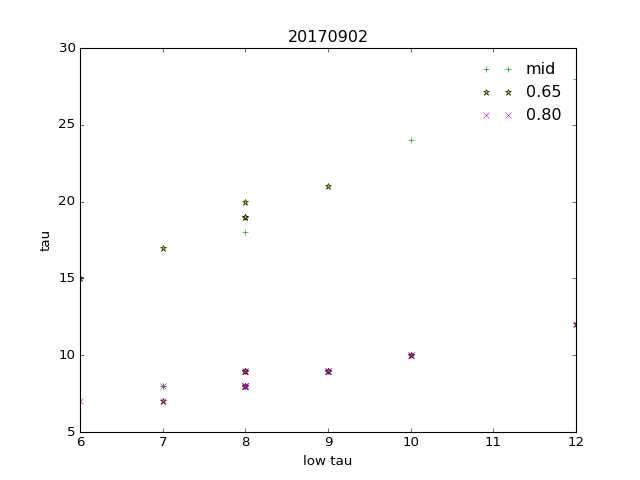

<IPython.core.display.Javascript object>


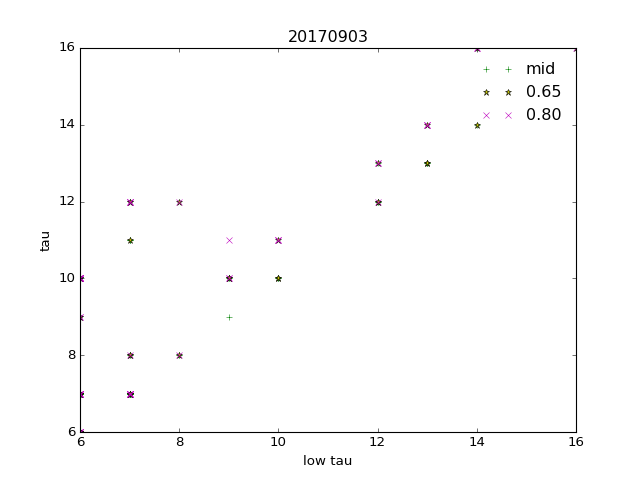

<IPython.core.display.Javascript object>


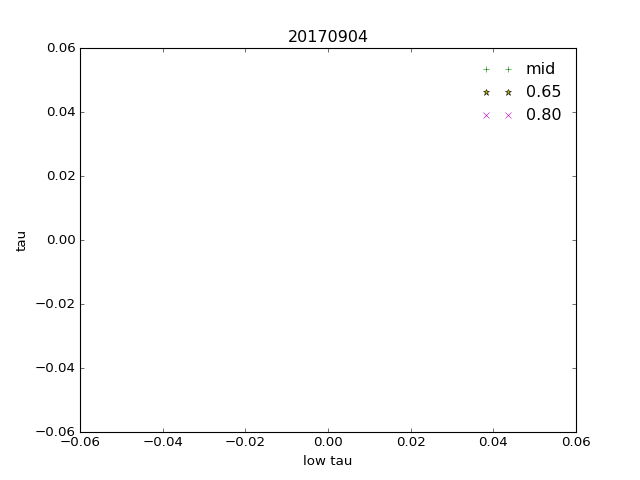

In [73]:
for i,daystr in enumerate(dds):
    plt.figure()
    plt.plot(rts_low[i]['tau'][rts_mid[i]['fl']],rts_mid[i]['tau'][rts_mid[i]['fl']],'g+',label='mid')
    plt.plot(rts_low[i]['tau'][rts_mid[i]['fl']],rts_65[i]['tau'][rts_mid[i]['fl']],'y*',label='0.65')
    plt.plot(rts_low[i]['tau'][rts_mid[i]['fl']],rts_80[i]['tau'][rts_mid[i]['fl']],'mx',label='0.80')
    plt.legend(frameon=False)
    plt.title(daystr)
    plt.ylabel('tau')
    plt.xlabel('low tau')

<IPython.core.display.Javascript object>


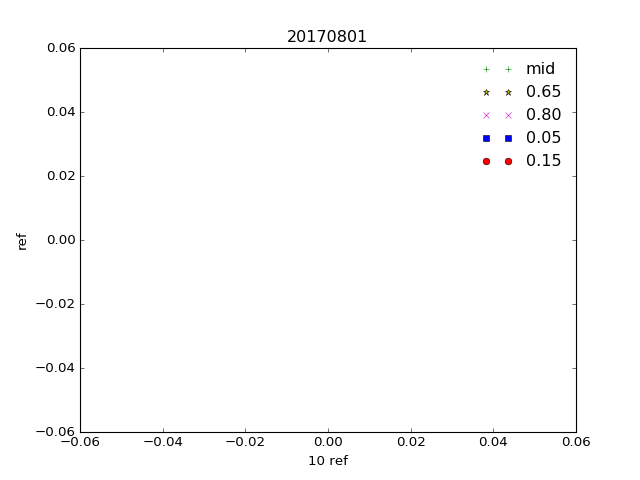

<IPython.core.display.Javascript object>


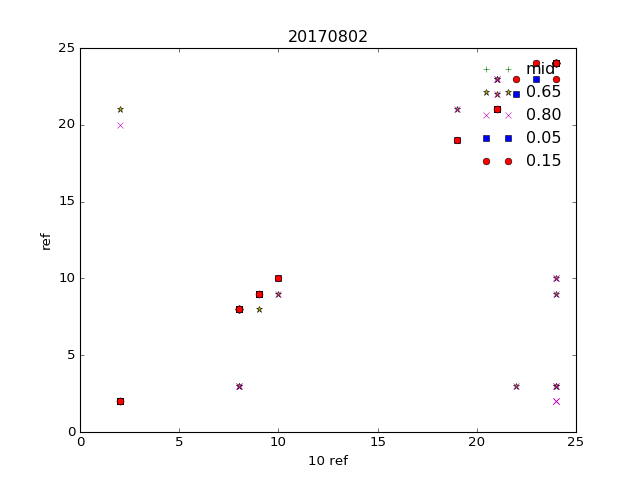

<IPython.core.display.Javascript object>


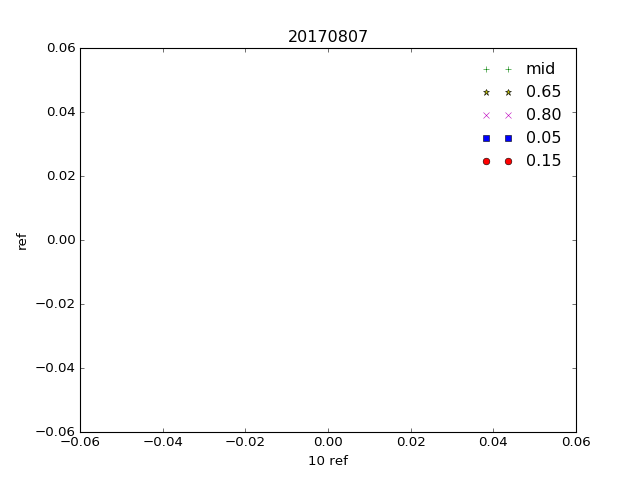

<IPython.core.display.Javascript object>


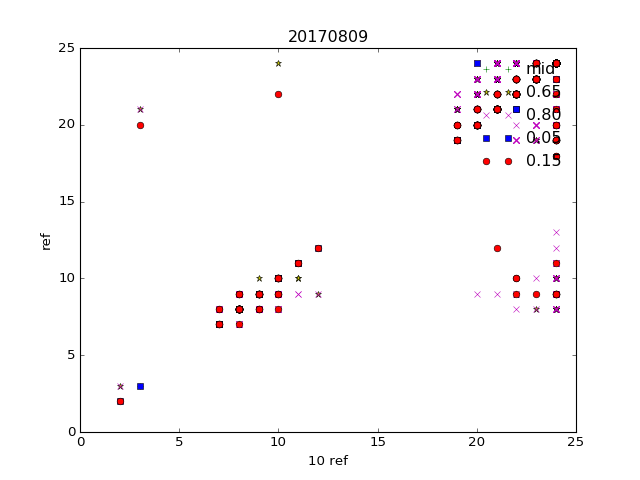

<IPython.core.display.Javascript object>


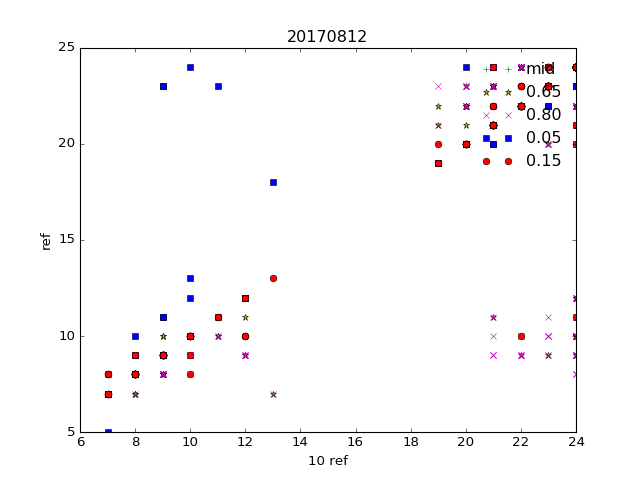

<IPython.core.display.Javascript object>


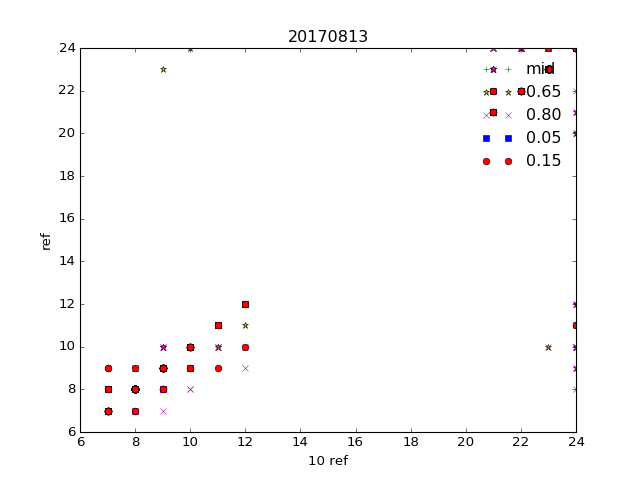

<IPython.core.display.Javascript object>


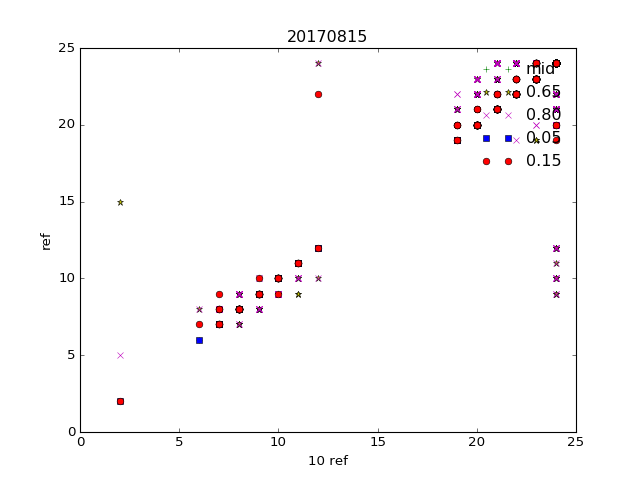

<IPython.core.display.Javascript object>


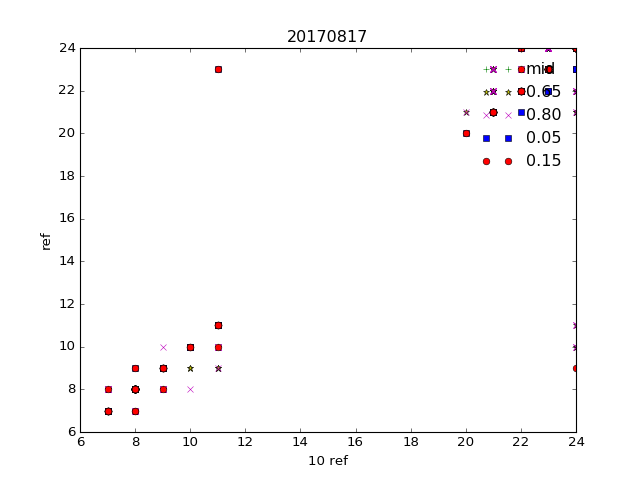

<IPython.core.display.Javascript object>


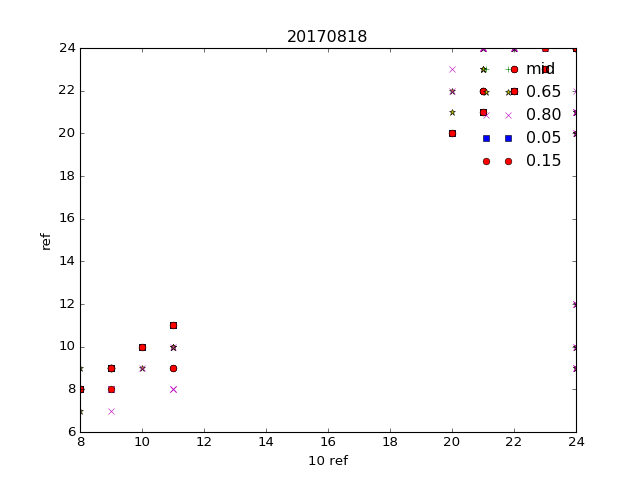

<IPython.core.display.Javascript object>


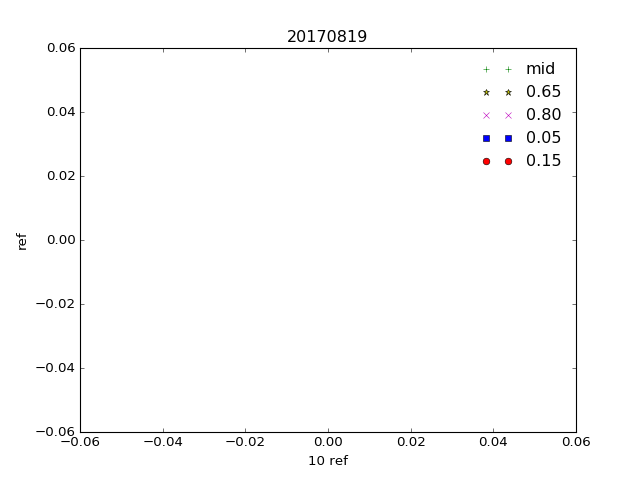

<IPython.core.display.Javascript object>


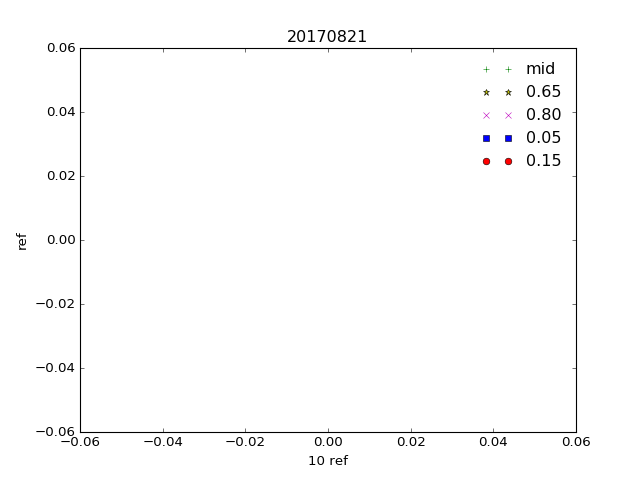

<IPython.core.display.Javascript object>


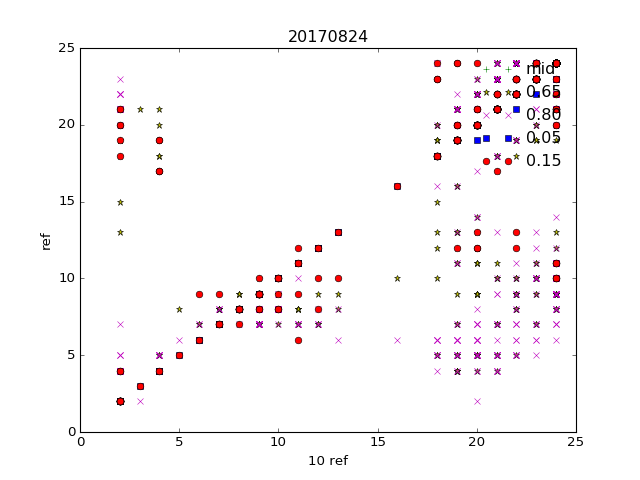

<IPython.core.display.Javascript object>


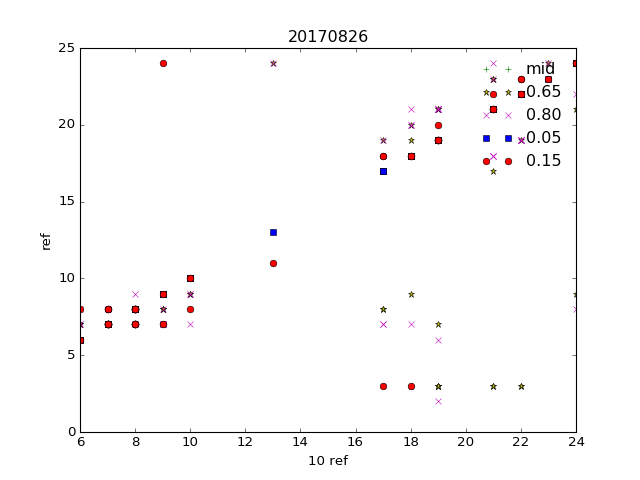

<IPython.core.display.Javascript object>


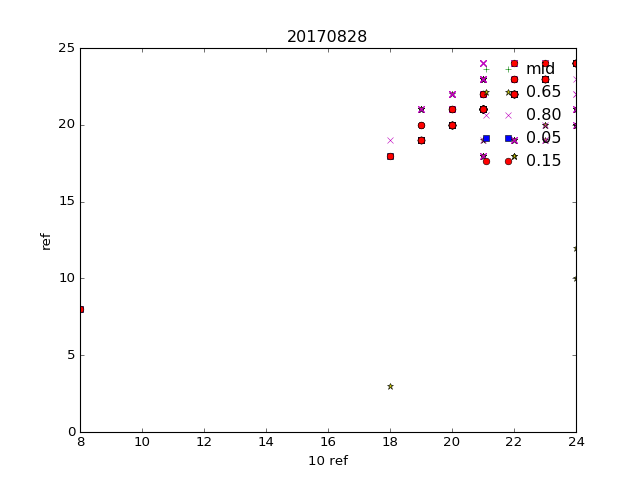

<IPython.core.display.Javascript object>


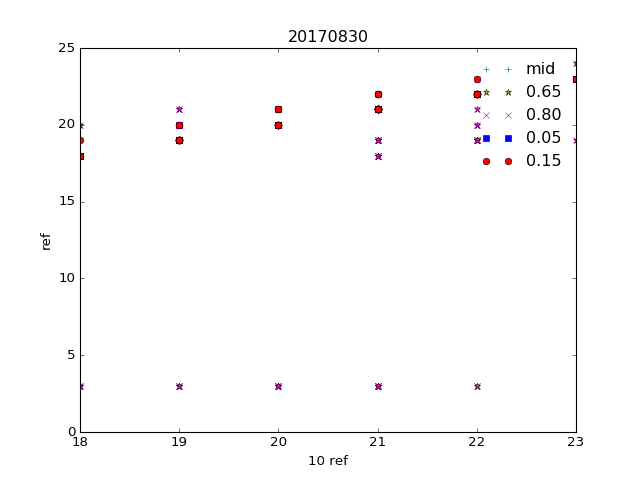

<IPython.core.display.Javascript object>


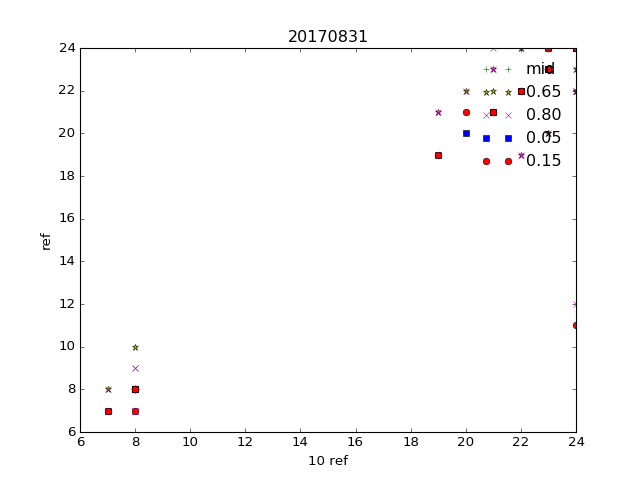

<IPython.core.display.Javascript object>


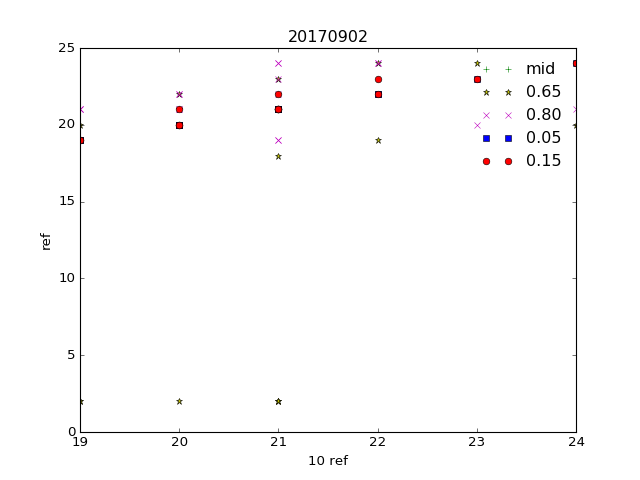

<IPython.core.display.Javascript object>


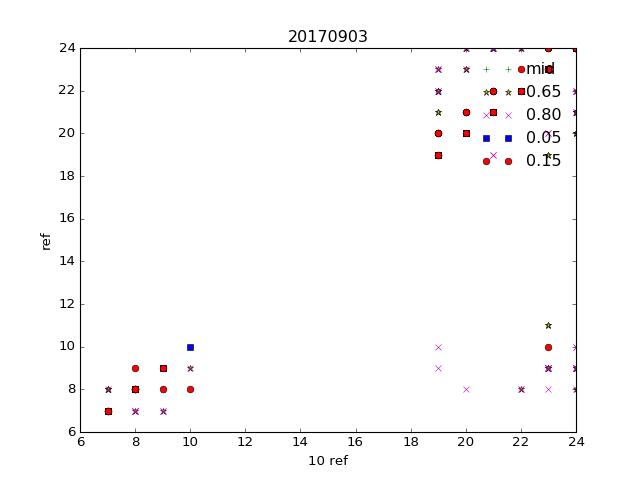

<IPython.core.display.Javascript object>


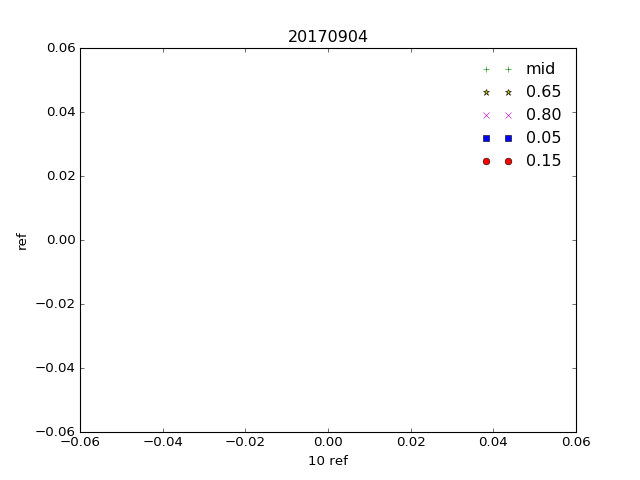

In [185]:
for i,daystr in enumerate(dds):
    plt.figure()
    plt.plot(rts_10[i]['ref'][rts_10[i]['fl']],rts_mid[i]['ref'][rts_10[i]['fl']],'g+',label='mid')
    plt.plot(rts_10[i]['ref'][rts_10[i]['fl']],rts_65[i]['ref'][rts_10[i]['fl']],'y*',label='0.65')
    plt.plot(rts_10[i]['ref'][rts_10[i]['fl']],rts_80[i]['ref'][rts_10[i]['fl']],'mx',label='0.80')
    plt.plot(rts_10[i]['ref'][rts_10[i]['fl']],rts_05[i]['ref'][rts_10[i]['fl']],'bs',label='0.05')
    plt.plot(rts_10[i]['ref'][rts_10[i]['fl']],rts_15[i]['ref'][rts_10[i]['fl']],'ro',label='0.15')
    plt.legend(frameon=False)
    plt.title(daystr)
    plt.ylabel('ref')
    plt.xlabel('10 ref')

## Now select the values of tau dependant on the ACAOD

In [75]:
ar6.keys()

[u'AOD1040',
 u'AOD0532',
 u'AOD0530',
 u'UNCAOD0550',
 u'UNCAOD0700',
 u'AOD0355',
 u'AOD1627',
 u'AOD0520',
 u'UNCAOD0620',
 u'AOD0606',
 u'AOD1064',
 u'Latitude',
 u'UNCAOD0452',
 u'fl_alt_6',
 u'AOD0620',
 u'AOD0700',
 u'AOD0550',
 u'AOD0660',
 'flaco',
 u'UNCAOD1627',
 u'AOD0452',
 u'fl_routine',
 u'AOD0470',
 u'fl1',
 u'UNCAOD1236',
 u'fl3',
 u'fl2',
 'flo',
 u'UNCAOD1064',
 u'UNCAOD0501',
 u'AOD_angstrom_470_865',
 u'AOD_polycoef_a0',
 u'AOD_polycoef_a2',
 u'UNCAOD0606',
 u'UNCAOD0355',
 u'qual_flag',
 u'UNCAOD0675',
 u'AOD1559',
 u'UNCAOD1650',
 u'UNCAOD1559',
 u'UNCAOD1250',
 u'AOD0501',
 u'Longitude',
 u'AOD_polycoef_a1',
 u'UNCAOD0660',
 u'GPS_Alt',
 u'AOD1250',
 u'flac',
 u'UNCAOD0380',
 u'fl',
 u'AOD0675',
 u'fl_QA',
 u'AOD1236',
 u'AOD1650',
 u'UNCAOD0470',
 u'AOD0380',
 u'UNCAOD0865',
 u'Start_UTC',
 u'flr',
 u'UNCAOD0781',
 u'days',
 u'UNCAOD0520',
 u'fl_alt_22',
 u'AOD0781',
 u'fl_alt_18',
 u'flag_acaod',
 u'fl_alt',
 u'AOD0865',
 u'amass_aer',
 u'flacr',
 u'UNCAOD1020

In [76]:
ar6['Start_UTC']

array([11.72444444, 11.72472222, 11.725     , ..., 16.35361111,
       16.35388889, 16.35416667])

In [77]:
ar6['days']

array([ 0.,  0.,  0., ..., 18., 18., 18.])

In [80]:
dasy6 = ['20170809', '20170812','20170813','20170815','20170817','20170818','20170819','20170821',
        '20170824','20170826','20170828','20170830','20170831','20170902']

In [106]:
dds

['20170801',
 '20170802',
 '20170807',
 '20170809',
 '20170812',
 '20170813',
 '20170815',
 '20170817',
 '20170818',
 '20170819',
 '20170821',
 '20170824',
 '20170826',
 '20170828',
 '20170830',
 '20170831',
 '20170902',
 '20170903',
 '20170904']

In [108]:
for i,daystr in enumerate(dds):
    rts_low[i]['acaod'] = rts_low[i]['utc']*0.0
    idd = (ar6['fl_QA']==1) & (ar6['flag_acaod']==1) & (ar6['AOD0501']<2.0)
    if not any(idd): 
        print daystr, 'False'
        continue
    rts_low[i]['acaod'] = nearest_neighbor(ar6['Start_UTC'][idd],ar6['AOD0501'][idd],rts_low[i]['utc'],dist=15.0/60.0)
    print daystr,rts_low[i]['utc'].shape,np.nanmin(rts_low[i]['acaod']),np.nanmax(rts_low[i]['acaod']),np.nanmean(rts_low[i]['acaod'])

20170801 (734,) 0.189 0.294 0.2802063492063492
20170802 (303,) nan nan nan
20170807 (129,) nan nan nan
20170809 (1247,) 0.202 0.418 0.23950351288056207
20170812 (412,) 0.22 0.697 0.4572716049382716
20170813 (1211,) 0.202 0.278 0.24058269720101783
20170815 (455,) 0.22 1.36 0.29279310344827586
20170817 (703,) 0.216 0.317 0.2503001508295626
20170818 (349,) 0.323 0.323 0.323
20170819 (5,) nan nan nan
20170821 (1566,) 0.256 1.36 0.2663959595959597
20170824 (1356,) 0.193 0.507 0.2985996592844975
20170826 (337,) 0.418 0.616 0.517
20170828 (541,) 0.034 0.471 0.3292336448598131
20170830 (186,) 0.354 1.36 0.49763414634146336
20170831 (83,) nan nan nan
20170902 (44,) 0.202 0.208 0.20488000000000003
20170903 (159,) nan nan nan
20170904 (28,) nan nan nan


In [109]:
aod_luts = [0.15,0.3,0.45,0.6,1.5,1.95,2.4]

In [110]:
acaod_index = []
for i,dayst in enumerate(dds): acaod_index.append([np.abs(aod_luts-a).argmin() for a in rts_low[i]['acaod']])

In [111]:
acaod_index[4]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [112]:
i = 4
tmpt = np.array([rts_05[i]['tau'],rts_10[i]['tau'],rts_15[i]['tau'],rts_low[i]['tau'],rts_mid[i]['tau'],rts_65[i]['tau'],rts_80[i]['tau']])

In [113]:
tmpt.shape

(7, 412)

In [114]:
np.array(acaod_index[4]).shape

(412,)

In [115]:
ta = np.array([tmpt[a,j] for j,a in enumerate(acaod_index[i])])

In [116]:
ta.shape

(412,)

<IPython.core.display.Javascript object>


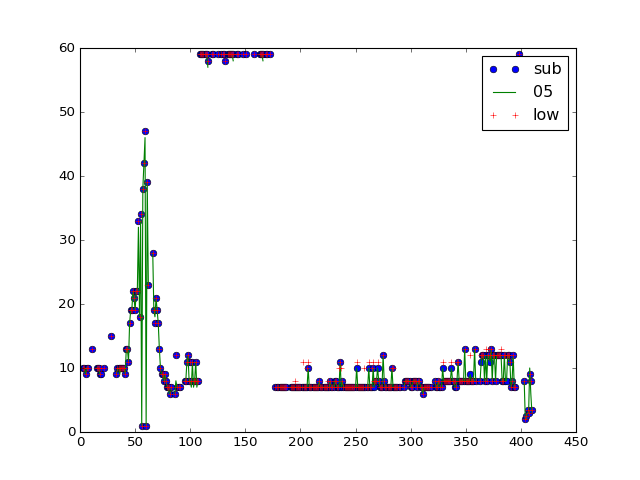

In [90]:
plt.figure()
plt.plot(ta,'o',label='sub')
plt.plot(rts_05[i]['tau'],label='05')
plt.plot(rts_low[i]['tau'],'+',label='low')
plt.legend()

In [171]:
rts = rts_10

In [172]:
for i,daystr in enumerate(dds):
    ta, re = [],[]
    tmpt = np.array([rts_05[i]['tau'],rts_10[i]['tau'],rts_15[i]['tau'],rts_low[i]['tau'],rts_mid[i]['tau'],rts_65[i]['tau'],rts_80[i]['tau']])
    tmpr = np.array([rts_05[i]['ref'],rts_10[i]['ref'],rts_15[i]['ref'],rts_low[i]['ref'],rts_mid[i]['ref'],rts_65[i]['ref'],rts_80[i]['ref']])
    ta = np.array([tmpt[a,j] for j,a in enumerate(acaod_index[i])])
    re = np.array([tmpr[a,j] for j,a in enumerate(acaod_index[i])])
    rts[i]['tau'] = ta
    rts[i]['ref'] = re

In [186]:
for i,daystr in enumerate(dds):
    print daystr
    try:
        rts[i]['tau_fl'] = smooth(rts[i]['tau'][rts_10[i]['fl']],6,old=True)
        rts[i]['ref_fl'] = smooth(rts[i]['ref'][rts_10[i]['fl']],6,old=True)
    except TypeError:
        print 'except',i
        rts[i]['tau_fl'] = rts[i]['tau'][rts_10[i]['fl']]
        rts[i]['ref_fl'] = rts[i]['ref'][rts_10[i]['fl']]
    except ValueError:
        nn = np.array([np.nan,np.nan])
        rts[i]['tau_fl'],rts[i]['ref_fl'] = nn,nn
        rts[i]['lat_fl'] = rts_10[i]['lat'][0:2]
        rts[i]['lon_fl'] = rts_10[i]['lon'][0:2]
        rts[i]['alt_fl'] = rts_10[i]['alt'][0:2]
        rts[i]['utc_fl'] = rts_10[i]['utc'][0:2]
        rts[i]['tau_err'],rts[i]['tau_err_fl'],rts[i]['ref_err'],rts[i]['ref_err_fl'] = nn,nn,nn,nn
        rts[i]['LWP_fl'],rts[i]['LWP_err_fl'] = nn,nn
        rts[i]['LWP'],rts[i]['LWP_err'] = nn,nn
        print 'Nothing to output for file:',daystr,i
        rts[i]['special_comment'] = 'No good retrievals for this day'
        continue
    rts[i]['special_comment'] = None
    rts[i]['lat_fl'] = rts_10[i]['lat'][rts_10[i]['fl']]
    rts[i]['lon_fl'] = rts_10[i]['lon'][rts_10[i]['fl']]
    rts[i]['alt_fl'] = rts_10[i]['alt'][rts_10[i]['fl']]
    rts[i]['utc_fl'] = rts_10[i]['utc'][rts_10[i]['fl']]
    
    rts[i]['tau_err'] = np.nanstd([rts_05[i]['tau'],rts_10[i]['tau'],rts_15[i]['tau'],rts_80[i]['tau']],axis=0)#\
                         # - np.nanmin([rts_05[i]['tau'],rts_10[i]['tau'],rts_15[i]['tau'],rts_80[i]['tau']],axis=0)
    rts[i]['tau_err_fl'] = smooth(rts[i]['tau_err'][rts_10[i]['fl']],6,old=True)
    rts[i]['ref_err'] = np.nanstd([rts_05[i]['ref'],rts_10[i]['ref'],rts_15[i]['ref'],rts_80[i]['ref']],axis=0)#\
                         # - np.nanmin([rts_05[i]['ref'],rts_10[i]['ref'],rts_15[i]['ref'],rts_80[i]['ref']],axis=0)
    rts[i]['ref_err_fl'] = smooth(rts[i]['ref_err'][rts_10[i]['fl']],6,old=True)
    
    rts[i]['LWP_fl'] = 5.0/9.0 * rts[i]['tau_fl']* rts[i]['ref_fl']
    rts[i]['LWP_err_fl'] = np.sqrt((5.0/9.0 * rts[i]['ref_fl'] * rts[i]['tau_err_fl'])**2.0+\
                                   (5.0/9.0 * rts[i]['tau_fl'] * rts[i]['ref_err_fl'])**2.0)
    rts[i]['LWP'] = 5.0/9.0 * rts[i]['tau']* rts[i]['ref']
    rts[i]['LWP_err'] = np.sqrt((5.0/9.0 * rts[i]['ref'] * rts[i]['tau_err'])**2.0+\
                                (5.0/9.0 * rts[i]['tau'] * rts[i]['ref_err'])**2.0)
    

20170801
Nothing to output for file: 20170801 0
20170802
20170807
Nothing to output for file: 20170807 2
20170809
20170812
20170813
20170815
20170817
20170818
20170819
Nothing to output for file: 20170819 9
20170821
Nothing to output for file: 20170821 10
20170824
20170826
20170828
20170830
20170831
20170902
20170903
20170904
Nothing to output for file: 20170904 18


In [105]:
#for i,daystr in enumerate(dds):
#    try:
#        rts_mid[i]['tau_fl'] = smooth(rts_mid[i]['tau'][rts_mid[i]['fl']],6,old=True)
#        rts_mid[i]['ref_fl'] = smooth(rts_mid[i]['ref'][rts_mid[i]['fl']],6,old=True)
#    except TypeError:
#        print 'except',i
#        rts_mid[i]['tau_fl'] = rts_mid[i]['tau'][rts_mid[i]['fl']]
#        rts_mid[i]['ref_fl'] = rts_mid[i]['ref'][rts_mid[i]['fl']]
    rts_mid[i]['lat_fl'] = rts_mid[i]['lat'][rts_mid[i]['fl']]
    rts_mid[i]['lon_fl'] = rts_mid[i]['lon'][rts_mid[i]['fl']]
    rts_mid[i]['alt_fl'] = rts_mid[i]['alt'][rts_mid[i]['fl']]
    rts_mid[i]['utc_fl'] = rts_mid[i]['utc'][rts_mid[i]['fl']]
    
    rts_mid[i]['tau_err'] = np.nanmax([rts_05[i]['tau'],rts_10[i]['tau'],rts_65[i]['tau'],rts_80[i]['tau']],axis=0)\
                          - np.nanmin([rts_low[i]['tau'],rts_10[i]['tau'],rts_65[i]['tau'],rts_80[i]['tau']],axis=0)
    rts_mid[i]['tau_err_fl'] = smooth(rts_mid[i]['tau_err'][rts_10[i]['fl']],6,old=True)
    rts_mid[i]['ref_err'] = np.nanmax([rts_low[i]['ref'],rts_10[i]['ref'],rts_65[i]['ref'],rts_80[i]['ref']],axis=0)\
                          - np.nanmin([rts_low[i]['ref'],rts_10[i]['ref'],rts_65[i]['ref'],rts_80[i]['ref']],axis=0)
    rts_mid[i]['ref_err_fl'] = smooth(rts_mid[i]['ref_err'][rts_10[i]['fl']],6,old=True)
    
    rts_mid[i]['LWP_fl'] = 5.0/9.0 * rts_mid[i]['tau_fl']* rts_mid[i]['ref_fl']
    rts_mid[i]['LWP_err_fl'] = np.sqrt((5.0/9.0 * rts_mid[i]['ref_fl'] * rts_mid[i]['tau_err_fl'])**2.0+\
                                       (5.0/9.0 * rts_mid[i]['tau_fl'] * rts_mid[i]['ref_err_fl'])**2.0)
    rts_mid[i]['LWP'] = 5.0/9.0 * rts_mid[i]['tau']* rts_mid[i]['ref']
    rts_mid[i]['LWP_err'] = np.sqrt((5.0/9.0 * rts_mid[i]['ref'] * rts_mid[i]['tau_err'])**2.0+\
                                       (5.0/9.0 * rts_mid[i]['tau'] * rts_mid[i]['ref_err'])**2.0)
    

# Now write these values to ict file

In [97]:
import write_utils as wu

In [174]:
hdict = {'PI':'Samuel LeBlanc',
     'Institution':'NASA Ames Research Center',
     'Instrument':'Spectrometers for Sky-Scanning, Sun-Tracking Atmospheric Research (4STAR)',
     'campaign':'ORACLES 2017',
     'special_comments':'Retrieved cloud properties, averaged over 6 seconds of hyperspectral zenith radiance measurements from 4STAR while under clouds.',
     'PI_contact':'Samuel.leblanc@nasa.gov',
     'platform':'NASA P3',
     'location':'based out of Sao Tome, actual location of measurement included in file',
     'instrument_info':'Derived product from 4STAR zenith measurements',
     'data_info':'Using the cloud property retrieval method based on spectral transmitted light measurements described by LeBlanc, Pileskie, Schmidt, and Coddington (2015), AMT, https://doi.org/10.5194/amt-8-1361-2015 ,modified to include impact of overlying aerosol layer.',
     'uncertainty':'See included variables.',
     'DM_contact':'Samuel LeBlanc, samuel.leblanc@nasa.gov',
     'project_info':'ORACLES 2017 deployment (year 2 of 3); August-September 2017; Sao Tome',
     'stipulations':'This is a public release of the ORACLES-2017 data set. We strongly recommend that you consult the PI, both for updates to the data set, and for the proper and most recent interpretation of the data for specific science use.',
     'rev_comments':"""R0: Archival for first public release of retrieved cloud properties from 4STAR sky radiance measurements. Using renewed look-up-table created accounting for actual above cloud AOD values (same as R3 for ORACLES-2016).
    Data is subject to uncertainties linked to detector stability, transfer efficiency of light through fiber optic cable, and deposition on the instrument window. Filtered out in-cloud data, bad measurements, and high clouds."""
    }
order = ['LAT','LON','COD','REF','LWP','COD_err','REF_err','LWP_err']
spec_comment = 'Retrieved cloud properties, averaged over 6 seconds of hyperspectral zenith radiance measurements from 4STAR while under clouds.'

In [187]:
for i,daystr in enumerate(dds):
    print i,daystr
    d_dict = {'Start_UTC':{'data':rts[i]['utc_fl']*3600.0,'unit':'seconds from midnight UTC','long_description':'time keeping'},
              'utc':{'data':rts[i]['utc_fl'],'unit':'seconds from midnight UTC','long_description':'time keeping'},
          'COD':{'data':rts[i]['tau_fl'],'unit':'None','long_description':'Cloud Optical Depth of overlying cloud'},
          'REF':{'data':rts[i]['ref_fl'],'unit':'micrometer','long_description':'Cloud drop effective radius for liquid clouds'},
          'LAT':{'data':rts[i]['lat_fl'],'unit':'Degrees','long_description':'Latitude of measurement, negative for Southern hemisphere'},
          'LON':{'data':rts[i]['lon_fl'],'unit':'Degrees','long_description':'Longitude of measurement, East is positive, from -180 to 180'},
          'COD_err':{'data':rts[i]['tau_err_fl'],'unit':'None','long_description':'Retrieval uncertainty of Cloud Optical Depth'},
          'REF_err':{'data':rts[i]['ref_err_fl'],'unit':'micrometer','long_description':'Retrieval uncertainty of Cloud effective radius. When uncertainty greater than 2 micrometer, retrieval is considered to have failed.'},
          'LWP':{'data':rts[i]['LWP_fl'],'unit':'g/meter^2','long_description':'Calculated Liquid Water Path of overlying cloud, (5/9*COD*REF) assuming linearly increasing effective radius with altitude (based on Wood and Hartmann, 2006, J. Clim., https://doi.org/10.1175/JCLI3702.1)'},
          'LWP_err':{'data':rts[i]['LWP_err_fl'],'unit':'g/meter^2','long_description':'Retrieval uncertainty of Liuid Water Path, based on error propogation of COD_err and ref_err'}
             }
    if rts[i]['special_comment']:
        hdict['special_comments'] = rts[i]['special_comment']
    else:
        hdict['special_comments'] = spec_comment
    d_dict_out = wu.prep_data_for_ict(d_dict,in_var_name='utc',out_var_name='Start_UTC', in_input=True,time_interval=1.0)
    wu.write_ict(hdict,d_dict_out,filepath=fo+'zen_ict_2017/v2/',
              data_id='4STAR_CLD',loc_id='P3',date=daystr,rev='R0',order=order)    

0 20170801
LAT
LON
COD
REF
LWP
COD_err
REF_err
LWP_err
File writing successful to: /mnt/c/Users/sleblanc/Research/ORACLES/zen_ict_2017/v2/4STAR-CLD_P3_20170801_R0.ict
1 20170802
LAT
LON
COD
REF
LWP
COD_err
REF_err
LWP_err
File writing successful to: /mnt/c/Users/sleblanc/Research/ORACLES/zen_ict_2017/v2/4STAR-CLD_P3_20170802_R0.ict
2 20170807
LAT
LON
COD
REF
LWP
COD_err
REF_err
LWP_err
File writing successful to: /mnt/c/Users/sleblanc/Research/ORACLES/zen_ict_2017/v2/4STAR-CLD_P3_20170807_R0.ict
3 20170809
LAT
LON
COD
REF
LWP
COD_err
REF_err
LWP_err
File writing successful to: /mnt/c/Users/sleblanc/Research/ORACLES/zen_ict_2017/v2/4STAR-CLD_P3_20170809_R0.ict
4 20170812
LAT
LON
COD
REF
LWP
COD_err
REF_err
LWP_err
File writing successful to: /mnt/c/Users/sleblanc/Research/ORACLES/zen_ict_2017/v2/4STAR-CLD_P3_20170812_R0.ict
5 20170813
LAT
LON
COD
REF
LWP
COD_err
REF_err
LWP_err
File writing successful to: /mnt/c/Users/sleblanc/Research/ORACLES/zen_ict_2017/v2/4STAR-CLD_P3_20170813_R0.ic

## For use of this python, save values to mat files

In [176]:
rtss = {str(i):rr for i,rr in enumerate(rts)}

In [177]:
def dict_keys_to_unicode(d):
    out = dict()
    for k, v in d.items():
        out[k.decode()] = v
    return out

for n in rtss.keys():
    if type(rtss[n]) is list:
        print n
        for i,t in enumerate(rtss[n]):
            rtss[n][i] = dict_keys_to_unicode(t)
    else:
        print 'no',n
        rtss[n] = dict_keys_to_unicode(rtss[n])


no 11
no 10
no 13
no 12
no 15
no 14
no 17
no 16
no 18
no 1
no 0
no 3
no 2
no 5
no 4
no 7
no 6
no 9
no 8


In [178]:
hs.savemat(fo+'zen_ict_2017/v2/2017_{}_all_cld_retrieved.mat'.format(vr),rtss)

## Optionally load the saved mat files

In [115]:
rtss = hs.loadmat(fo+'zen_ict_2017/v2/2017_{}_all_cld_retrieved.mat'.format(vr))

In [34]:
if not 'rts' in locals():
    rts = []
    for n in sorted([int(u) for u in rtss.keys()]):
        rts.append(rtss[str(n)])
elif not rts:
    for n in sorted([int(u) for u in rtss.keys()]):
        rts.append(rtss[str(n)])

# Make plots

## Read the files as a verification

In [179]:
vv = 'R0'

In [161]:
from load_utils import load_ict

In [188]:
out_RA = []
out_head_RA = []
for d in dds:
    fname_aod = fo+'zen_ict_2017/v2/4STAR-CLD_P3_{}_{vr}.ict'.format(d,vr=vr)
    tt,th = load_ict(fname_aod,return_header=True)
    out_RA.append(tt)
    out_head_RA.append(th)

('Start_UTC', 'LAT', 'LON', 'COD', 'REF', 'LWP', 'COD_err', 'REF_err', 'LWP_err')
('Start_UTC', 'LAT', 'LON', 'COD', 'REF', 'LWP', 'COD_err', 'REF_err', 'LWP_err')
('Start_UTC', 'LAT', 'LON', 'COD', 'REF', 'LWP', 'COD_err', 'REF_err', 'LWP_err')
('Start_UTC', 'LAT', 'LON', 'COD', 'REF', 'LWP', 'COD_err', 'REF_err', 'LWP_err')
('Start_UTC', 'LAT', 'LON', 'COD', 'REF', 'LWP', 'COD_err', 'REF_err', 'LWP_err')
('Start_UTC', 'LAT', 'LON', 'COD', 'REF', 'LWP', 'COD_err', 'REF_err', 'LWP_err')
('Start_UTC', 'LAT', 'LON', 'COD', 'REF', 'LWP', 'COD_err', 'REF_err', 'LWP_err')
('Start_UTC', 'LAT', 'LON', 'COD', 'REF', 'LWP', 'COD_err', 'REF_err', 'LWP_err')
('Start_UTC', 'LAT', 'LON', 'COD', 'REF', 'LWP', 'COD_err', 'REF_err', 'LWP_err')
('Start_UTC', 'LAT', 'LON', 'COD', 'REF', 'LWP', 'COD_err', 'REF_err', 'LWP_err')
('Start_UTC', 'LAT', 'LON', 'COD', 'REF', 'LWP', 'COD_err', 'REF_err', 'LWP_err')
('Start_UTC', 'LAT', 'LON', 'COD', 'REF', 'LWP', 'COD_err', 'REF_err', 'LWP_err')
('Start_UTC', 'L

In [181]:
out_head_RA[5]

['44, 1001\n',
 'Samuel LeBlanc\n',
 'NASA Ames Research Center\n',
 'Spectrometers for Sky-Scanning, Sun-Tracking Atmospheric Research (4STAR)\n',
 'ORACLES 2017\n',
 '1,1\n',
 '2017,08,13,2019,09,18\n',
 '1.0\n',
 'Start_UTC, Seconds, Time of measurement continuous starting from midnight UTC\n',
 '8\n',
 '1,1,1,1,1,1,1,1\n',
 '-9999.000,-9999.000,-9999.000,-9999.000,-9999.000,-9999.000,-9999.000,-9999.000\n',
 'LAT, Degrees, Latitude of measurement, negative for Southern hemisphere\n',
 'LON, Degrees, Longitude of measurement, East is positive, from -180 to 180\n',
 'COD, None, Cloud Optical Depth of overlying cloud\n',
 'REF, micrometer, Cloud drop effective radius for liquid clouds\n',
 'LWP, g/meter^2, Calculated Liquid Water Path of overlying cloud, (5/9*COD*REF) assuming linearly increasing effective radius with altitude (based on Wood and Hartmann, 2006, J. Clim., https://doi.org/10.1175/JCLI3702.1)\n',
 'COD_err, None, Retrieval uncertainty of Cloud Optical Depth\n',
 'REF_err

In [189]:
nm = out_RA[0].dtype.names

In [190]:
nm

('Start_UTC',
 'LAT',
 'LON',
 'COD',
 'REF',
 'LWP',
 'COD_err',
 'REF_err',
 'LWP_err')

<IPython.core.display.Javascript object>


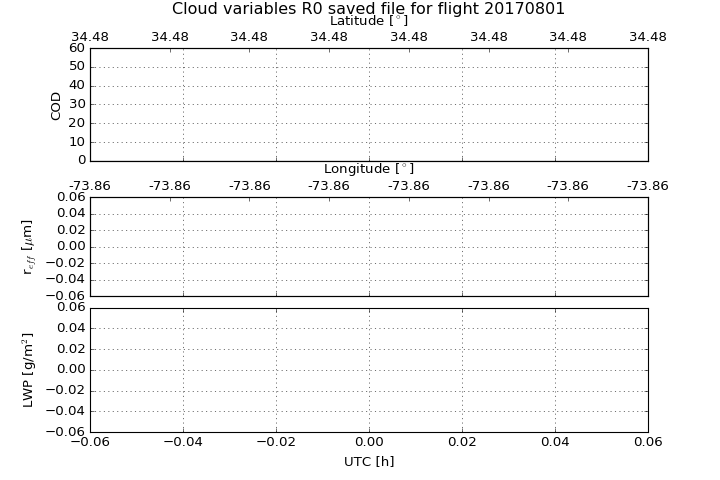

<IPython.core.display.Javascript object>


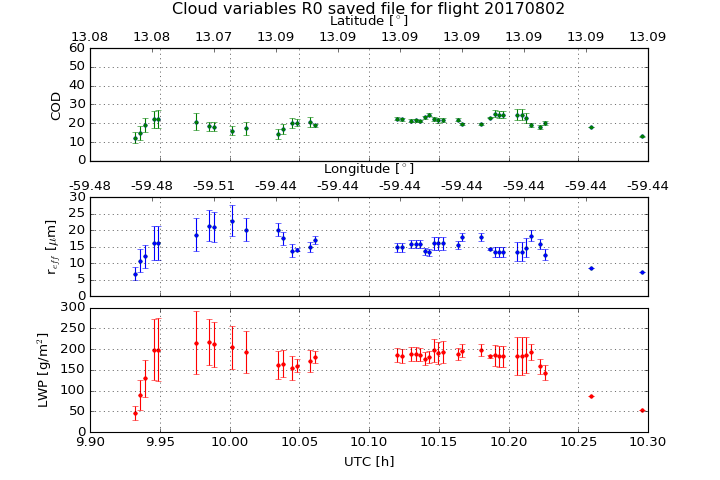

<IPython.core.display.Javascript object>


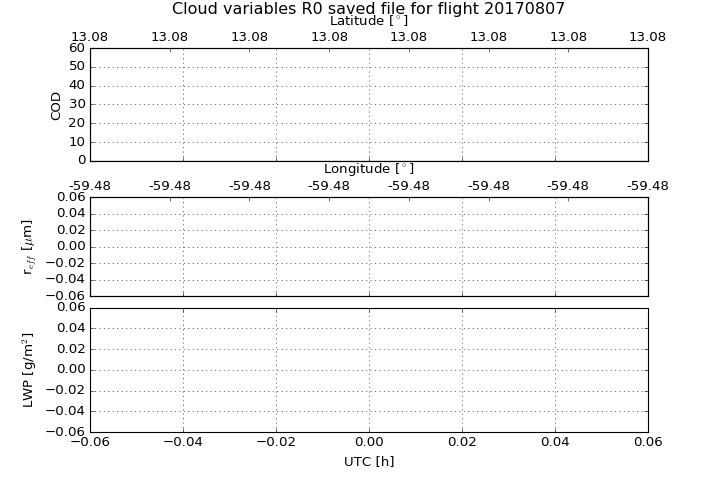

<IPython.core.display.Javascript object>


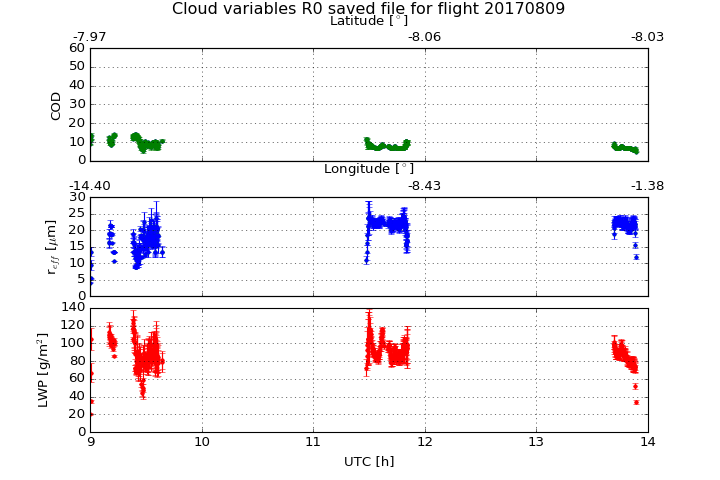

<IPython.core.display.Javascript object>


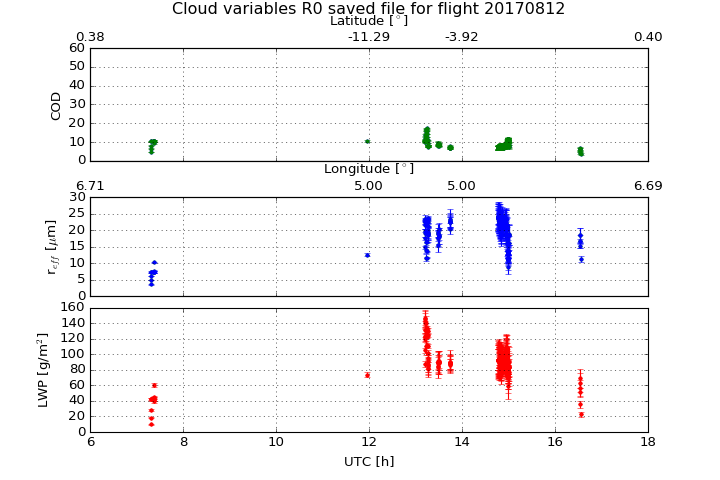

<IPython.core.display.Javascript object>


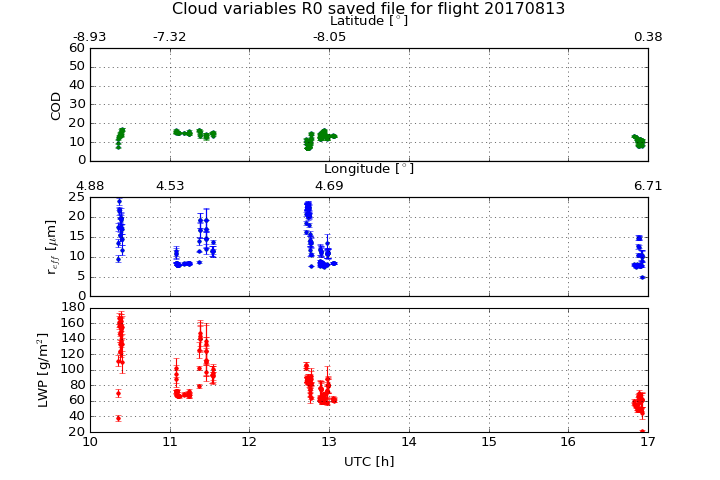

<IPython.core.display.Javascript object>


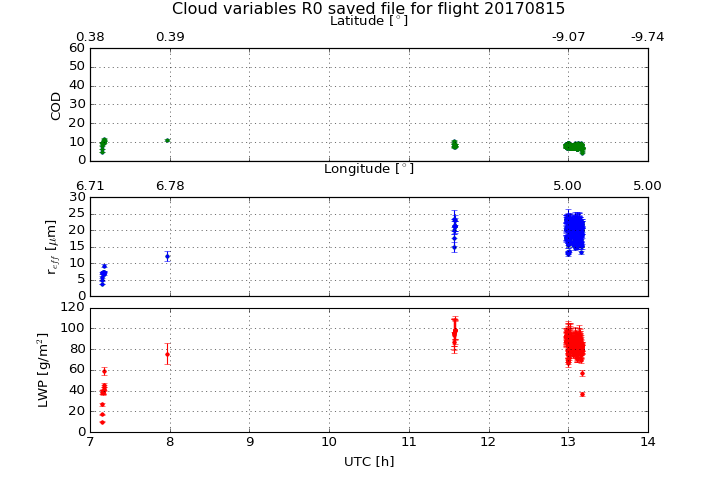

<IPython.core.display.Javascript object>


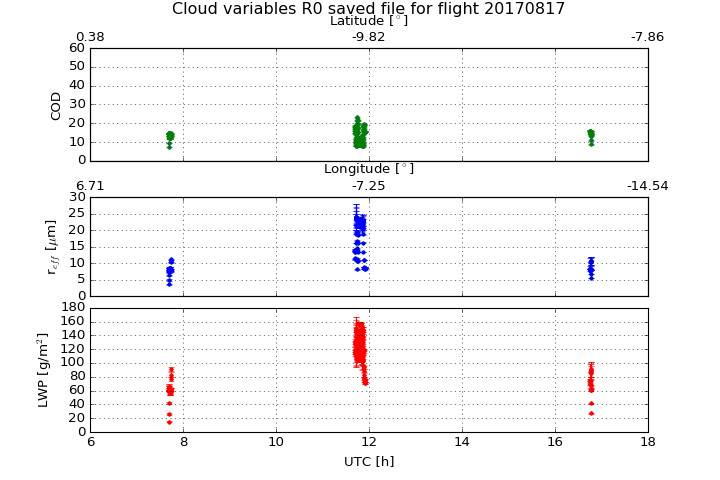

<IPython.core.display.Javascript object>


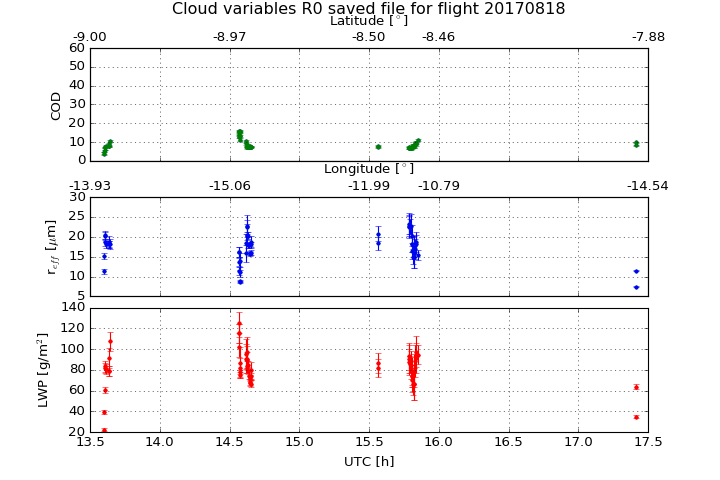

<IPython.core.display.Javascript object>


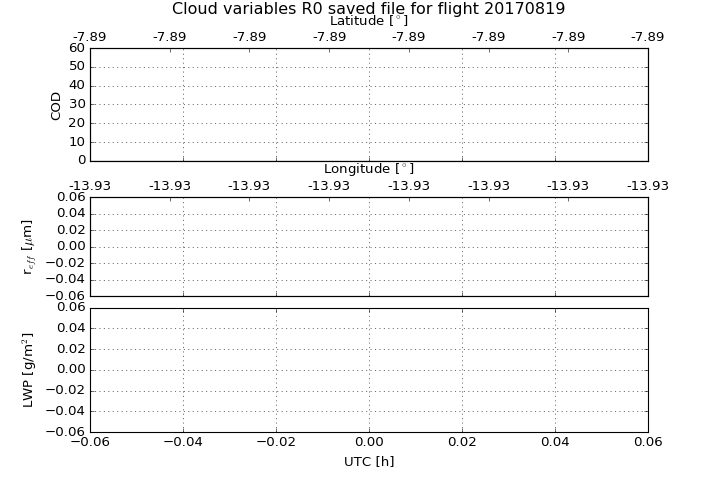

<IPython.core.display.Javascript object>


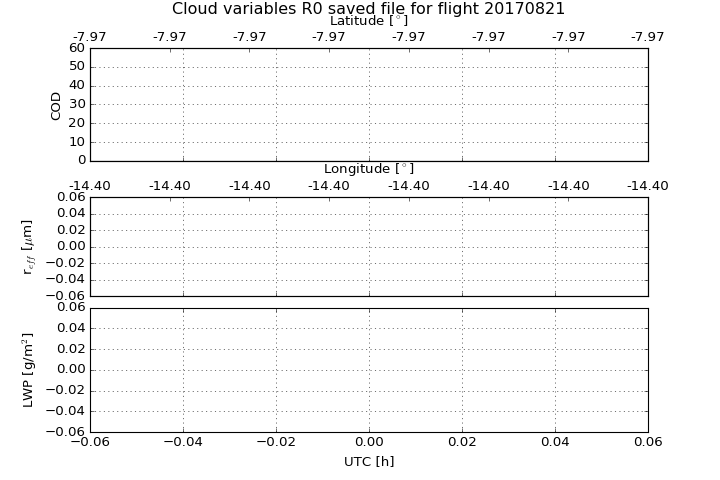

<IPython.core.display.Javascript object>


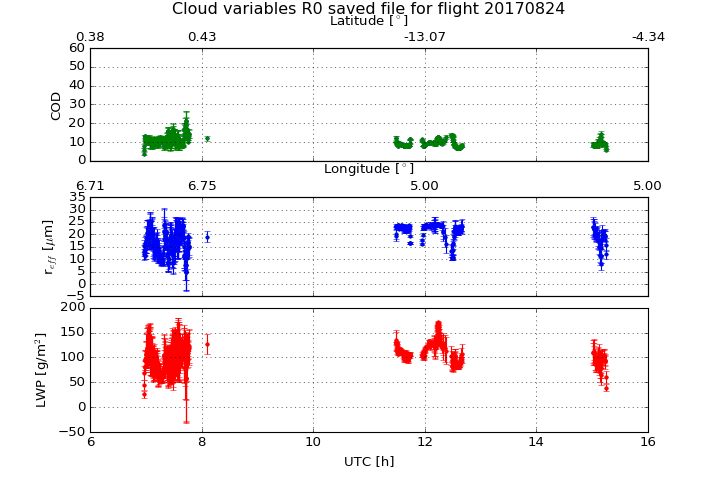

<IPython.core.display.Javascript object>


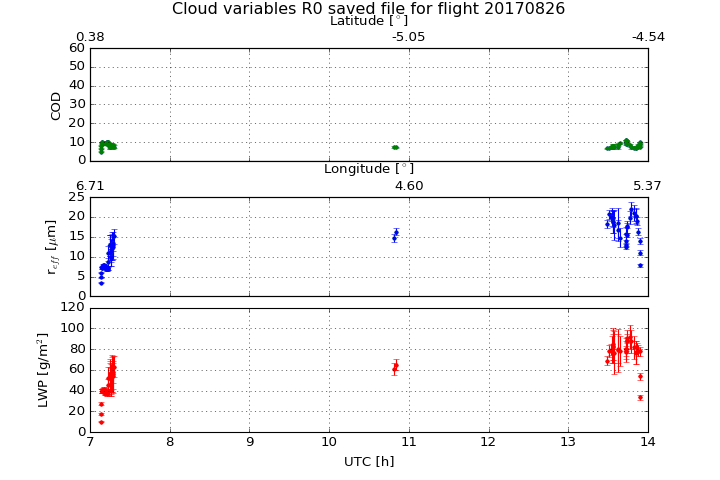

<IPython.core.display.Javascript object>


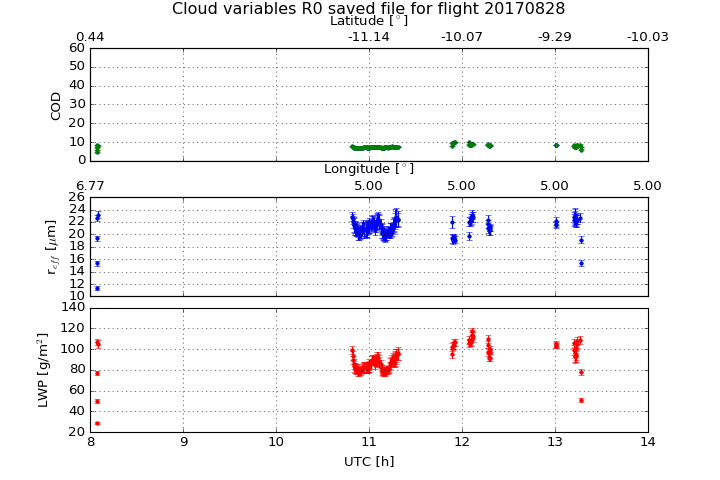

<IPython.core.display.Javascript object>


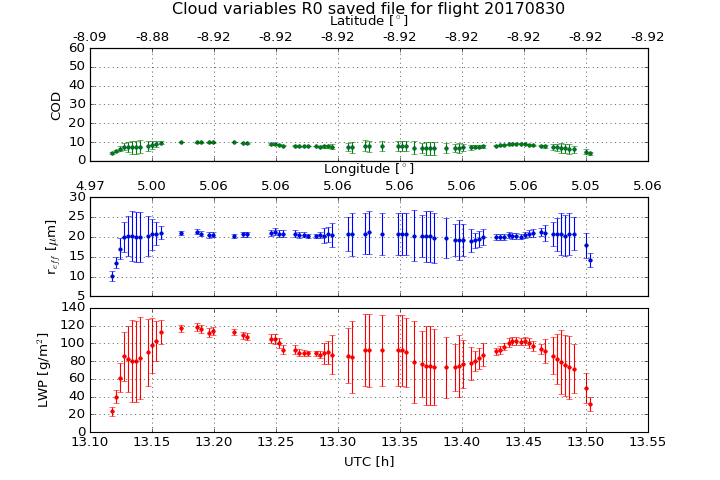

<IPython.core.display.Javascript object>


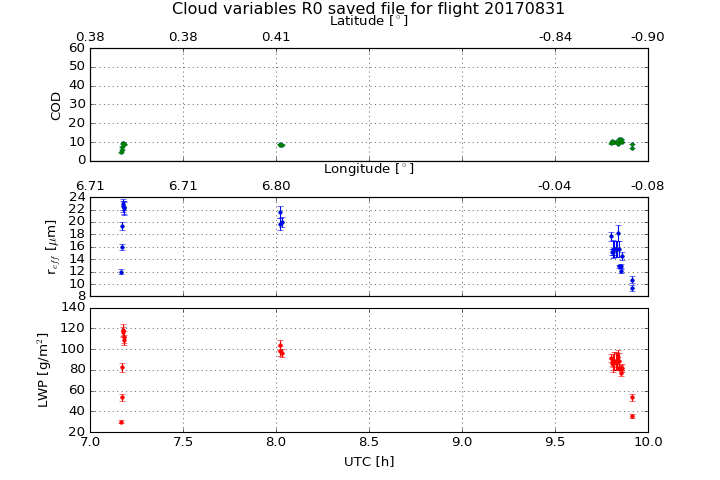

<IPython.core.display.Javascript object>


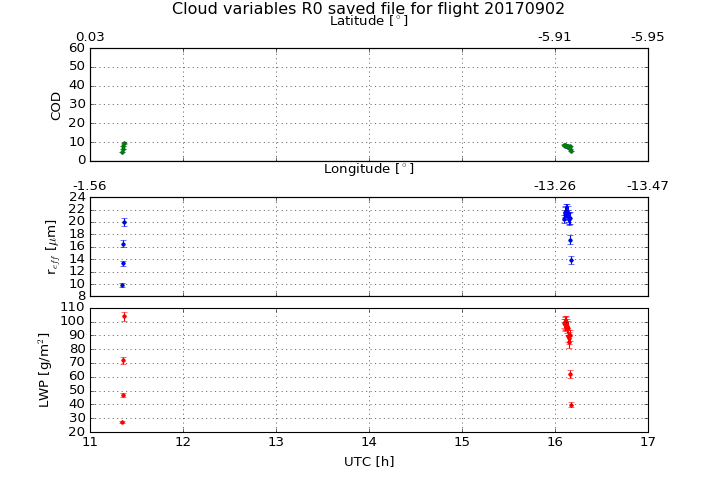

<IPython.core.display.Javascript object>


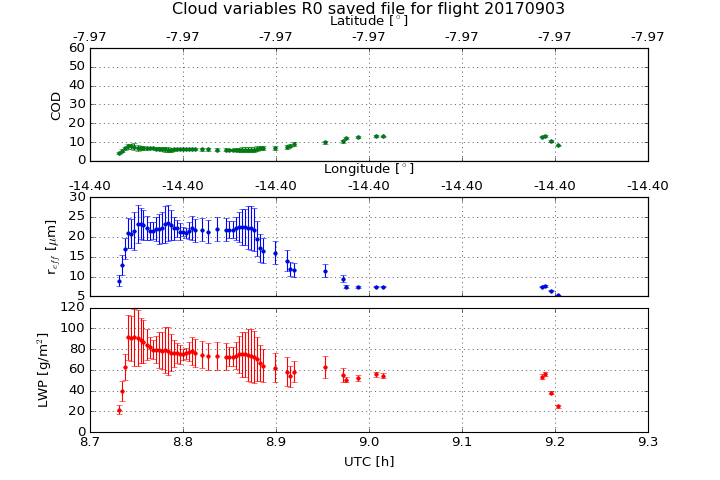

<IPython.core.display.Javascript object>


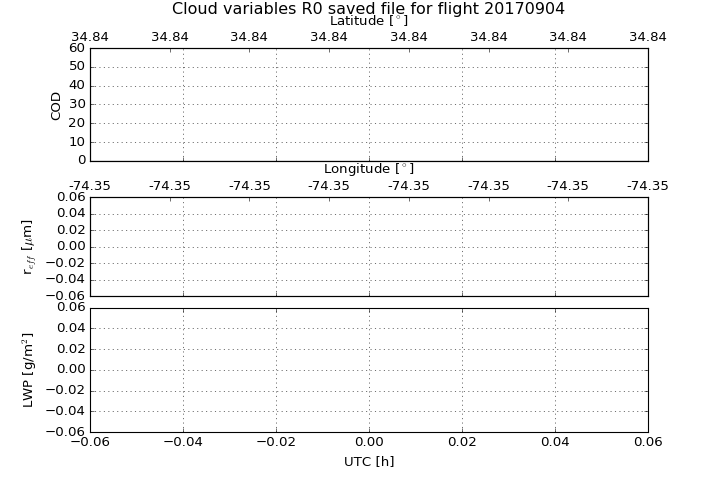

In [191]:
for i,d in enumerate(dds):
    fig,ax = plt.subplots(3,sharex=True,figsize=(9,6))
    ax = ax.ravel()
    ax[0].set_title('Cloud variables {} saved file for flight {}'.format(vv,d),y=1.25)
    #ax[0].set_color_cycle([plt.cm.gist_ncar(k) for k in np.linspace(0, 1, len(wl))])
    ax[0].plot(out_RA[i][nm[0]],out_RA[i]['COD'],'.')
    ax[0].errorbar(out_RA[i][nm[0]],out_RA[i]['COD'],yerr=out_RA[i]['COD_err'],linestyle='None',marker='.')
    ax[0].set_ylabel('COD')
    ax[0].set_ylim(0,60)
    ax[0].axhline(0,color='k')
    ax[0].grid()
    axy0 = ax[0].twiny()
    axy0.set_xlim(ax[0].get_xlim())
    xt = ax[0].get_xticks()
    xl = []
    for x in xt:
        ii = np.argmin(abs(out_RA[i][nm[0]]-x))
        if np.isfinite(out_RA[i]['LAT'][ii]):
            xl.append('{:2.2f}'.format(out_RA[i]['LAT'][ii]))
        else:
            ia = np.isfinite(out_RA[i]['LAT'][ii-1200:ii+1200])
            if any(ia):
                laa = np.interp([1200],np.arange(len(ia))[ia],out_RA[i]['LAT'][ii-1200:ii+1200][ia])
                if not np.isfinite(laa[0]):
                    xl.append(' ')
                else:
                    xl.append('{:2.2f}'.format(laa[0]))
            else: xl.append(' ')
    axy0.set_xticks(xt)
    axy0.set_xticklabels(xl)
    axy0.set_xlabel('Latitude [$^\\circ$]')
    box = ax[0].get_position()
    ax[0].set_position([box.x0, box.y0, box.width, box.height*1.0])
    axy0.set_position([box.x0, box.y0, box.width, box.height*1.0])
    
    ax[1].plot(out_RA[i][nm[0]],out_RA[i]['REF'],'g.')
    ax[1].errorbar(out_RA[i][nm[0]],out_RA[i]['REF'],yerr=out_RA[i]['REF_err'],linestyle='None',marker='.')
    ax[1].set_ylabel('r$_{{eff}}$ [$\\mu$m]')
    #ax[1].set_xlabel('UTC [h]')
    ax[1].grid()
    axy1 = ax[1].twiny()
    axy1.set_xlim(ax[1].get_xlim())
    x1t = ax[1].get_xticks()
    x1l = []
    for x in x1t:
        ii = np.argmin(abs(out_RA[i][nm[0]]-x))
        if np.isfinite(out_RA[i]['LON'][ii]):
            x1l.append('{:2.2f}'.format(out_RA[i]['LON'][ii]))
        else:
            iio = np.isfinite(out_RA[i]['LON'][ii-1200:ii+1200])
            if any(iio):
                loo = np.interp([1200],np.arange(len(iio))[iio],out_RA[i]['LON'][ii-1200:ii+1200][iio])
                if not np.isfinite(loo[0]):
                    x1l.append(' ')
                else:
                    x1l.append('{:2.2f}'.format(loo[0]))
            else: x1l.append(' ')
    axy1.set_xticks(x1t)
    axy1.set_xticklabels(x1l)
    axy1.set_xlabel('Longitude [$^\\circ$]')
    box = ax[1].get_position()
    ax[1].set_position([box.x0, box.y0, box.width, box.height*0.88])
    axy1.set_position([box.x0, box.y0, box.width, box.height*0.88])
    
    ax[2].plot(out_RA[i][nm[0]],out_RA[i]['LWP'],'r.')
    ax[2].errorbar(out_RA[i][nm[0]],out_RA[i]['LWP'],yerr=out_RA[i]['LWP_err'],linestyle='None',marker='.',color='r')
    ax[2].set_ylabel('LWP [g/m$^2$]')
    ax[2].set_xlabel('UTC [h]')
    ax[2].grid()
    box = ax[2].get_position()
    ax[2].set_position([box.x0, box.y0, box.width, box.height*1.1])

    plt.savefig(fo+'zen_ict_2017/v2/{vv}_{}.png'.format(d,vv=vv),dpi=600,transparent=True)

## Combine the data into a single array

In [192]:
ar = {}
for n in rts[0].keys():
    ar[n] = np.array([])

In [193]:
ar['days'] = np.array([])

In [194]:
for i,d in enumerate(dds):
    ar['days'] = np.append(ar['days'],np.zeros_like(rts[i]['utc'])+i)
    for n in rts[0].keys():
        ar[n] = np.append(ar[n],rts[i][n])

## Save the combined array

In [195]:
import hdf5storage as hs

In [196]:
hs.savemat(fo+'zen_ict_2017/v2/{}_all_cld_ict_2017.mat'.format(vr),ar)

## Optionally load the all ict file

In [7]:
if not 'ar' in locals():
    ar = hs.loadmat(fo+'zen_ict_2017/v2/{}_all_cld_ict_2017.mat'.format(vr))

## plot the data on a map

In [197]:
import plotting_utils as pu

In [198]:
from map_interactive import build_basemap

In [199]:
rts[i]['tau_fl']

array([nan, nan])

In [200]:
for i,daystr in enumerate(dds):
    print rts[i]['lat'][rts[i]['fl']][:,0].shape,rts[i]['lon'][rts[i]['fl']][:,0].shape,rts[i]['tau_fl'].shape

(0,) (0,) (2,)
(41,) (41,) (41,)
(0,) (0,) (2,)
(459,) (459,) (459,)
(260,) (260,) (260,)
(219,) (219,) (219,)
(354,) (354,) (354,)
(190,) (190,) (190,)
(53,) (53,) (53,)
(0,) (0,) (2,)
(0,) (0,) (2,)
(460,) (460,) (460,)
(70,) (70,) (70,)
(122,) (122,) (122,)
(74,) (74,) (74,)
(25,) (25,) (25,)
(17,) (17,) (17,)
(56,) (56,) (56,)
(0,) (0,) (2,)


<IPython.core.display.Javascript object>


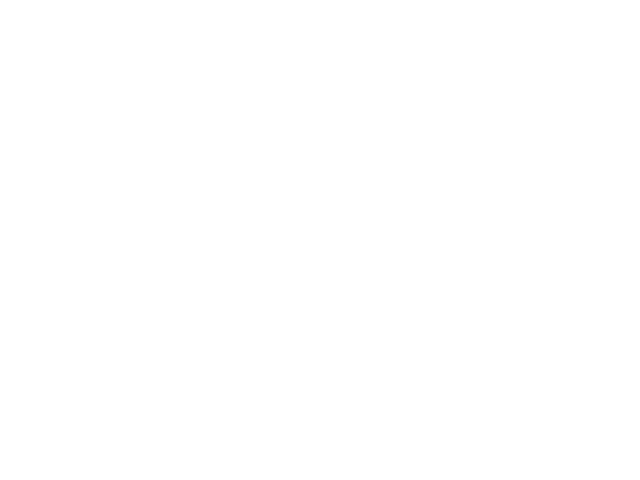

ValueError: Color array must be two-dimensional

In [201]:
fig = plt.figure()
ax = plt.subplot(111)
m = build_basemap(lower_left=[-2,-25],upper_right=[15,-8],ax=ax,larger=False)
sa = []
for i,daystr in enumerate(dds):
    x,y = m(rts[i]['lon'][rts[i]['fl']][:,0]+i*0.03,rts[i]['lat'][rts[i]['fl']][:,0])
    sca = ax.scatter(x,y,c=rts[i]['tau_fl'],
              s=20,alpha=0.7,vmin=0.0,vmax=30.0,edgecolor='None')
    sa.append(sca)
#pu.prelim()
cb = plt.colorbar(sa[0])
cb.set_label('COD')
plt.savefig(fo+'zen_ict_2017/v2/{}_2017_COD_map.png'.format(vr),transparent=True,dpi=600)

<IPython.core.display.Javascript object>


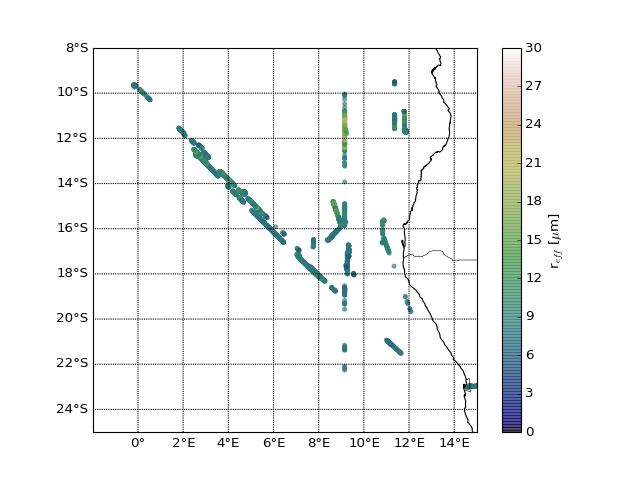

In [92]:
fig = plt.figure()
ax = plt.subplot(111)
m = build_basemap(lower_left=[-2,-25],upper_right=[15,-8],ax=ax,larger=False)
sa = []
for i,daystr in enumerate(dds):
    x,y = m(rts[i]['lon'][rts[i]['fl']][:,0]+i*0.03,rts[i]['lat'][rts[i]['fl']][:,0])
    sca = ax.scatter(x,y,c=rts[i]['ref_fl'],
              s=20,alpha=0.7,vmin=0.0,vmax=30.0,edgecolor='None',cmap=plt.cm.gist_earth)
    sa.append(sca)
#pu.prelim()
cb = plt.colorbar(sa[0])
cb.set_label('r$_{{eff}}$ [$\\mu$m]')
plt.savefig(fp+'..//zen_ict/v5/{}_REF_map.png'.format(vr),transparent=True,dpi=600)

<IPython.core.display.Javascript object>


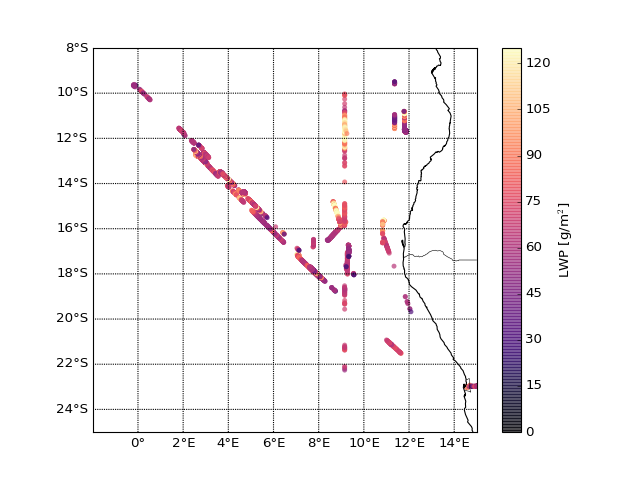

In [93]:
fig = plt.figure()
ax = plt.subplot(111)
m = build_basemap(lower_left=[-2,-25],upper_right=[15,-8],ax=ax,larger=False)
sa = []
for i,daystr in enumerate(dds):
    x,y = m(rts[i]['lon'][rts[i]['fl']][:,0]+i*0.03,rts[i]['lat'][rts[i]['fl']][:,0])
    sca = ax.scatter(x,y,c=rts[i]['LWP_fl'],
              s=20,alpha=0.7,vmin=0.0,vmax=125.0,edgecolor='None',cmap=plt.cm.magma)
    sa.append(sca)
#pu.prelim()
cb = plt.colorbar(sa[0])
cb.set_label('LWP [g/m$^2$]')
plt.savefig(fp+'..//zen_ict/v5/{}_LWP_map.png'.format(vr),transparent=True,dpi=600)

## Plot out some statistics of all retrievals

<IPython.core.display.Javascript object>


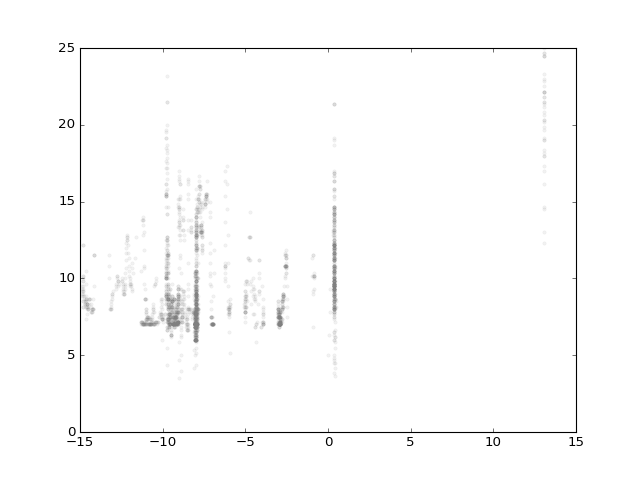

ValueError: autodetected range of [nan, nan] is not finite

In [202]:
plt.figure()
plt.plot(ar['lat_fl'],ar['tau_fl'],'.',color='grey',alpha=0.1)
plt.hist2d(ar['lat_fl'],ar['tau_fl'],bins=40,normed=True)
plt.xlabel('Latitude [$^\\circ$]')
plt.ylabel('COD')
cb = plt.colorbar()
cb.set_label('Normalized counts')
plt.title('4STAR Cloud optical depth for all ORACLES flights')
plt.savefig(fo+'zen_ict_2017/v2/{}_2017_COD_hist_lat.png'.format(vr),transparent=True,dpi=600)

<IPython.core.display.Javascript object>


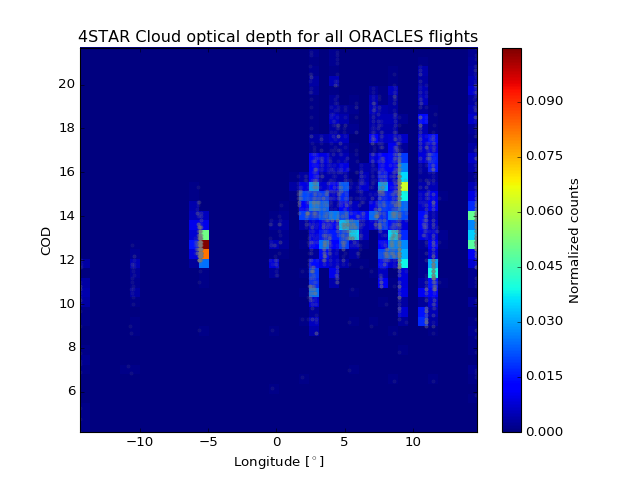

In [95]:
plt.figure()
plt.plot(ar['lon_fl'],ar['tau_fl'],'.',color='grey',alpha=0.1)
plt.hist2d(ar['lon_fl'],ar['tau_fl'],bins=40,normed=True)
plt.xlabel('Longitude [$^\\circ$]')
plt.ylabel('COD')
cb = plt.colorbar()
cb.set_label('Normalized counts')
plt.title('4STAR Cloud optical depth for all ORACLES flights')
plt.savefig(fp+'..//zen_ict/v5/COD_hist_lon.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


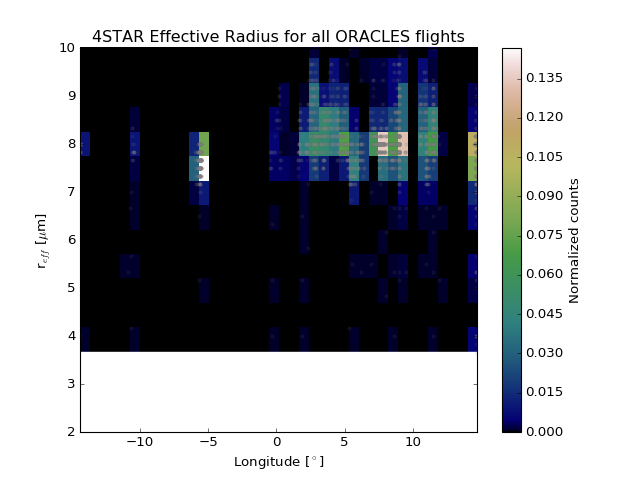

In [96]:
plt.figure()
plt.plot(ar['lon_fl'],ar['ref_fl'],'.',color='grey',alpha=0.1)
plt.hist2d(ar['lon_fl'],ar['ref_fl'],bins=40,normed=True,cmap=plt.cm.gist_earth)
plt.xlabel('Longitude [$^\\circ$]')
plt.ylabel('r$_{{eff}}$ [$\\mu$m]')
plt.ylim(2,10)
cb = plt.colorbar()
cb.set_label('Normalized counts')
plt.title('4STAR Effective Radius for all ORACLES flights')
plt.savefig(fp+'..//zen_ict/v5/ref_hist_lon.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


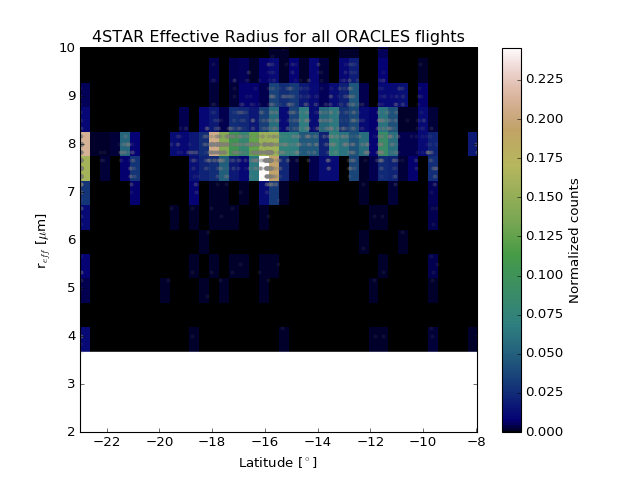

In [97]:
plt.figure()
plt.plot(ar['lat_fl'],ar['ref_fl'],'.',color='grey',alpha=0.1)
plt.hist2d(ar['lat_fl'],ar['ref_fl'],bins=40,normed=True,cmap=plt.cm.gist_earth)
plt.ylim(2,10)
plt.xlabel('Latitude [$^\\circ$]')
plt.ylabel('r$_{{eff}}$ [$\\mu$m]')
cb = plt.colorbar()
cb.set_label('Normalized counts')
plt.title('4STAR Effective Radius for all ORACLES flights')
plt.savefig(fp+'..//zen_ict/v5/ref_hist_lat.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


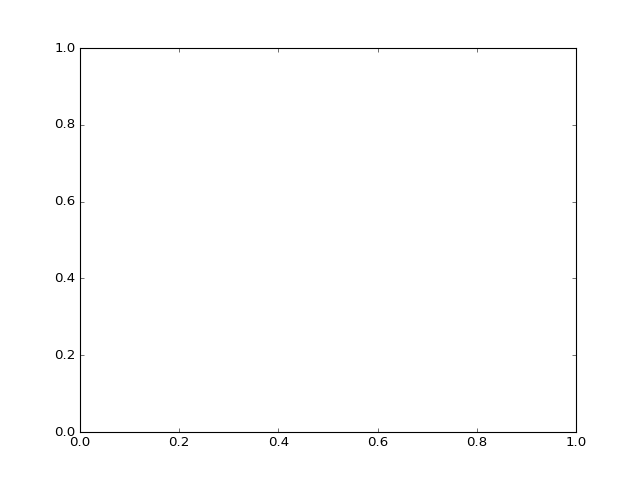

ValueError: max must be larger than min in range parameter.

In [203]:
fig = plt.figure()
plt.hist(ar['tau_fl'],bins=30,edgecolor='None',color='g',alpha=0.7,normed=True,label='filtered')
plt.hist(ar['tau'],bins=30,edgecolor='None',color='b',alpha=0.1,normed=True,range=(0,70),label='All points')
plt.ylabel('Normed counts')
plt.xlabel('COD')
plt.grid()
pu.prelim()
plt.legend(frameon=False)
plt.savefig(fo+'zen_ict_2017/v2/cod_hist_2017.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


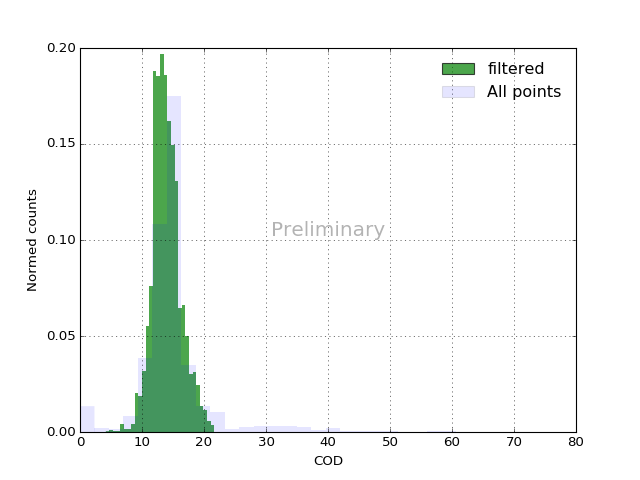

In [98]:
fig = plt.figure()
plt.hist(ar['tau_fl'],bins=30,edgecolor='None',color='g',alpha=0.7,normed=True,label='filtered')
plt.hist(ar['tau'],bins=30,edgecolor='None',color='b',alpha=0.1,normed=True,range=(0,70),label='All points')
plt.ylabel('Normed counts')
plt.xlabel('COD')
plt.grid()
pu.prelim()
plt.legend(frameon=False)
plt.savefig(fp+'..//zen_ict/v5/cod_hist.png',transparent=True,dpi=600)

In [99]:
ar.keys()

['fl_alt',
 u'tau',
 'ref_err',
 'ref_err_fl',
 u'sza',
 'lat_fl',
 u'phase',
 'tau_err_fl',
 u'alt',
 'tau_err',
 'alt_fl',
 u'lon',
 'tau_fl',
 'LWP_err',
 'LWP_err_fl',
 u'ref',
 'LWP',
 'fl_ki',
 'utc_fl',
 'LWP_fl',
 'delta',
 u'lat',
 'fl',
 'fl_match',
 u'utc',
 u'ki',
 'days',
 'fl_incld',
 'lon_fl',
 'ref_fl']

In [100]:
aam = ar['utc_fl']<12.0
apm = ar['utc_fl']>12.0

<IPython.core.display.Javascript object>


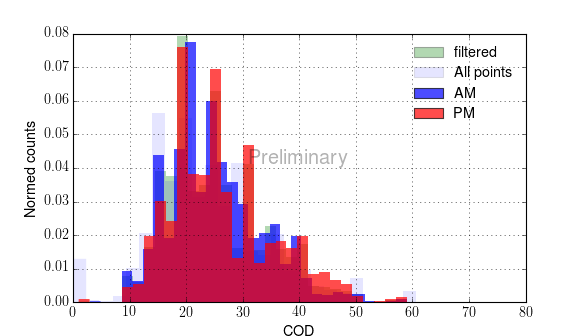

In [12]:
fig = plt.figure()
plt.hist(ar['tau_fl'],bins=30,edgecolor='None',color='g',alpha=0.3,normed=True,label='filtered')
plt.hist(ar['tau'],bins=30,edgecolor='None',color='b',alpha=0.1,normed=True,range=(0,70),label='All points')
plt.hist(ar['tau_fl'][aam],bins=30,edgecolor='None',color='b',alpha=0.7,normed=True,label='AM')
plt.hist(ar['tau_fl'][apm],bins=30,edgecolor='None',color='r',alpha=0.7,normed=True,label='PM')
plt.ylabel('Normed counts')
plt.xlabel('COD')
plt.grid()
pu.prelim()
plt.legend(frameon=False)
plt.savefig(fp+'..//zen_ict/v3/cod_hist_pm_am.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


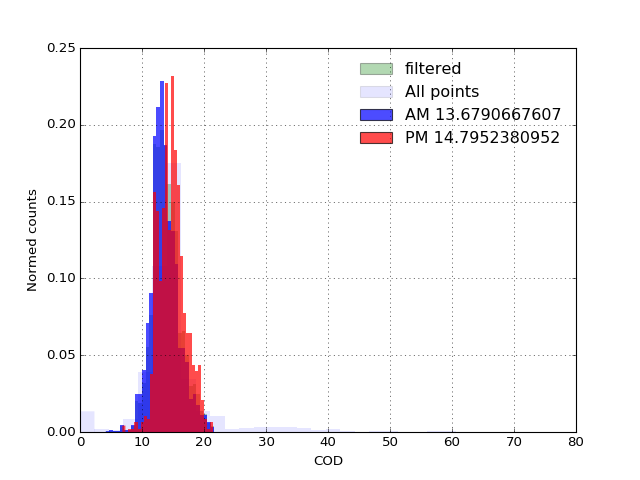

In [108]:
fig = plt.figure()
plt.hist(ar['tau_fl'],bins=30,edgecolor='None',color='g',alpha=0.3,normed=True,label='filtered')
plt.hist(ar['tau'],bins=30,edgecolor='None',color='b',alpha=0.1,normed=True,range=(0,70),label='All points')
plt.hist(ar['tau_fl'][aam],bins=30,edgecolor='None',color='b',alpha=0.7,normed=True,label='AM {}'.format(np.nanmean(ar['tau_fl'][aam])))
plt.hist(ar['tau_fl'][apm],bins=30,edgecolor='None',color='r',alpha=0.7,normed=True,label='PM {}'.format(np.nanmean(ar['tau_fl'][apm])))
plt.ylabel('Normed counts')
plt.xlabel('COD')
plt.grid()
#pu.prelim()
plt.legend(frameon=False)
plt.savefig(fp+'..//zen_ict/v5/cod_hist_pm_am.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


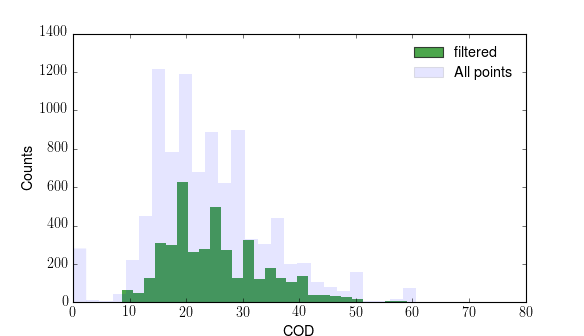

In [94]:
fig = plt.figure()
plt.hist(ar['tau_fl'],bins=30,edgecolor='None',color='g',alpha=0.7,normed=False,label='filtered')
plt.hist(ar['tau'],bins=30,edgecolor='None',color='b',alpha=0.1,normed=False,range=(0,70),label='All points')
plt.ylabel('Counts')
plt.xlabel('COD')
plt.legend(frameon=False)
plt.savefig(fp+'..//zen_ict/v3/cod_hist_all.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


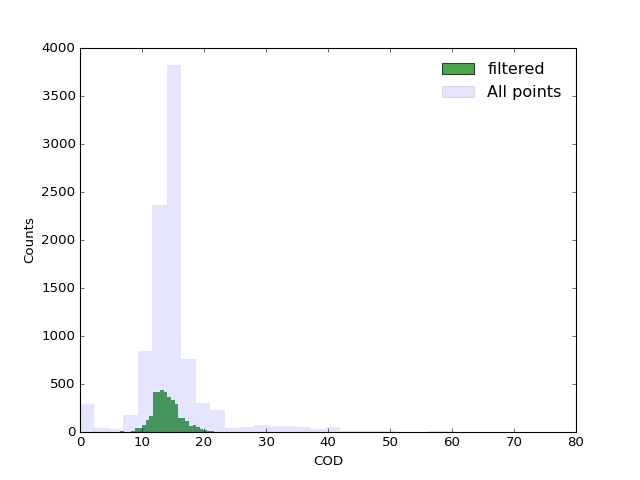

In [102]:
fig = plt.figure()
plt.hist(ar['tau_fl'],bins=30,edgecolor='None',color='g',alpha=0.7,normed=False,label='filtered')
plt.hist(ar['tau'],bins=30,edgecolor='None',color='b',alpha=0.1,normed=False,range=(0,70),label='All points')
plt.ylabel('Counts')
plt.xlabel('COD')
plt.legend(frameon=False)
plt.savefig(fp+'..//zen_ict/v5/cod_hist_all.png',transparent=True,dpi=600)

In [103]:
np.nanmean(ar['tau_fl'])

13.965714535290006

In [104]:
np.nanmean(ar['ref_fl'])

9.012928022361983

<IPython.core.display.Javascript object>


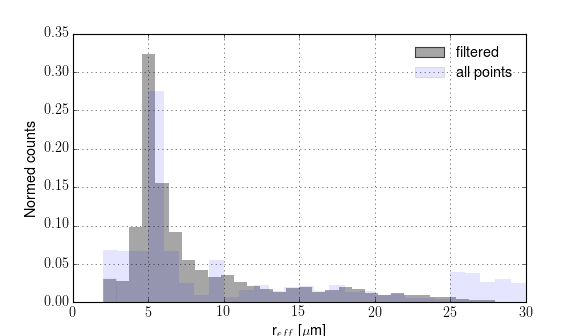

In [102]:
fig = plt.figure()
plt.hist(ar['ref_fl'],bins=30,edgecolor='None',color='grey',alpha=0.7,normed=True,label='filtered')
plt.hist(ar['ref'],bins=30,edgecolor='None',color='b',alpha=0.1,normed=True,range=(0,30),label='all points')
plt.ylabel('Normed counts')
plt.xlabel('r$_{{eff}}$ [$\\mu$m]')
plt.grid()
#pu.prelim()
plt.legend(frameon=False)
plt.savefig(fp+'..//zen_ict/v3/{}_ref_hist.png'.format(vr),transparent=True,dpi=600)

<IPython.core.display.Javascript object>


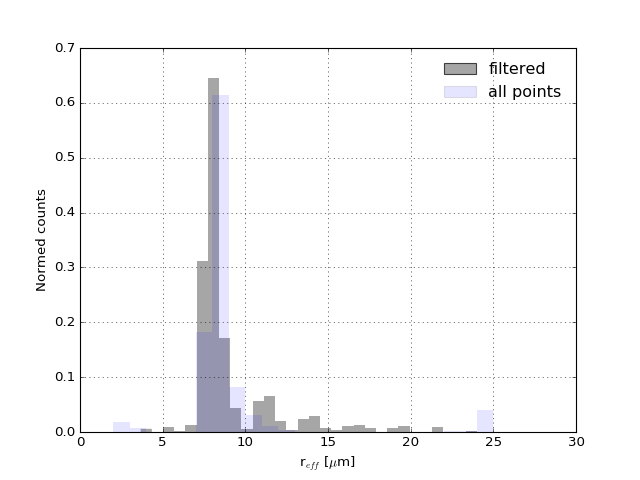

In [105]:
fig = plt.figure()
plt.hist(ar['ref_fl'],bins=30,edgecolor='None',color='grey',alpha=0.7,normed=True,label='filtered')
plt.hist(ar['ref'],bins=30,edgecolor='None',color='b',alpha=0.1,normed=True,range=(0,30),label='all points')
plt.ylabel('Normed counts')
plt.xlabel('r$_{{eff}}$ [$\\mu$m]')
plt.grid()
#pu.prelim()
plt.legend(frameon=False)
plt.savefig(fp+'..//zen_ict/v5/{}_ref_hist.png'.format(vr),transparent=True,dpi=600)

<IPython.core.display.Javascript object>


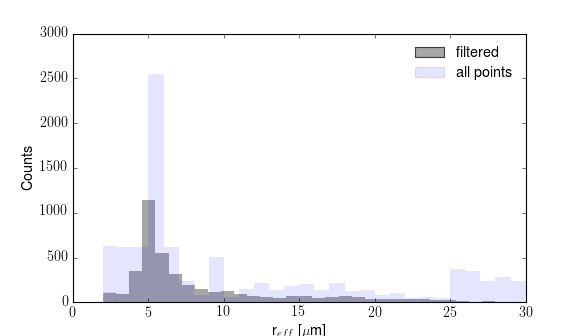

In [101]:
fig = plt.figure()
plt.hist(ar['ref_fl'],bins=30,edgecolor='None',color='grey',alpha=0.7,normed=False,label='filtered')
plt.hist(ar['ref'],bins=30,edgecolor='None',color='b',alpha=0.1,normed=False,range=(0,30),label='all points')
plt.ylabel('Counts')
plt.xlabel('r$_{{eff}}$ [$\\mu$m]')
plt.legend(frameon=False)
plt.savefig(fp+'..//zen_ict/v3/{}_ref_hist_all.png'.format(vr),transparent=True,dpi=600)

<IPython.core.display.Javascript object>


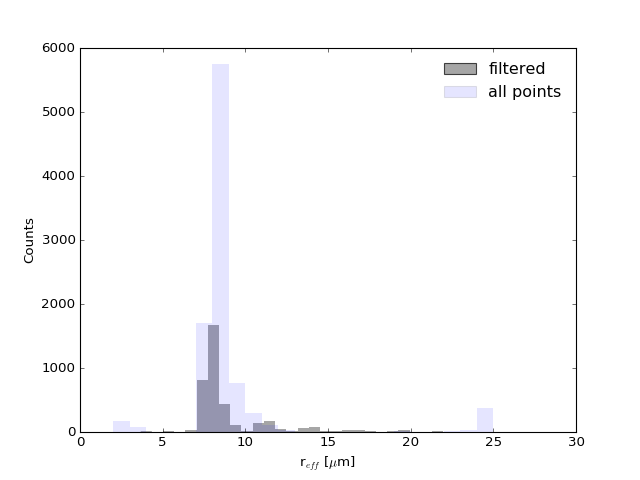

In [106]:
fig = plt.figure()
plt.hist(ar['ref_fl'],bins=30,edgecolor='None',color='grey',alpha=0.7,normed=False,label='filtered')
plt.hist(ar['ref'],bins=30,edgecolor='None',color='b',alpha=0.1,normed=False,range=(0,30),label='all points')
plt.ylabel('Counts')
plt.xlabel('r$_{{eff}}$ [$\\mu$m]')
plt.legend(frameon=False)
plt.savefig(fp+'..//zen_ict/v5/{}_ref_hist_all.png'.format(vr),transparent=True,dpi=600)

<IPython.core.display.Javascript object>


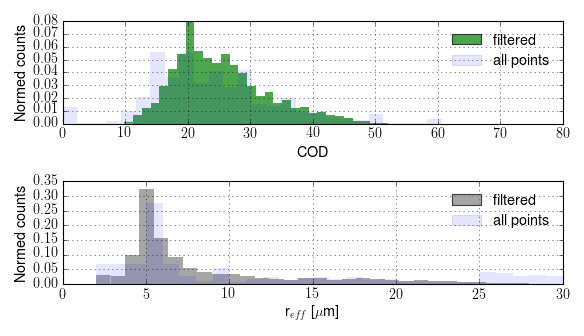

In [100]:
fig,ax = plt.subplots(2,1)
ax = ax.ravel()
ax[0].hist(ar['tau_fl'],bins=30,edgecolor='None',color='g',alpha=0.7,normed=True,label='filtered')
ax[0].hist(ar['tau'],bins=30,edgecolor='None',color='b',alpha=0.1,normed=True,range=(0,70),label='all points')
ax[0].set_ylabel('Normed counts')
ax[0].set_xlabel('COD')
ax[0].grid()
#pu.prelim(ax=ax[0])
ax[0].legend(frameon=False)

ax[1].hist(ar['ref_fl'],bins=30,edgecolor='None',color='grey',alpha=0.7,normed=True,label='filtered')
ax[1].hist(ar['ref'],bins=30,edgecolor='None',color='b',alpha=0.1,normed=True,range=(0,30),label='all points')
ax[1].set_ylabel('Normed counts')
ax[1].set_xlabel('r$_{{eff}}$ [$\\mu$m]')
plt.grid()
#pu.prelim(ax=ax[1])
plt.legend(frameon=False)

plt.tight_layout()

plt.savefig(fp+'..//zen_ict/v3/{}_ref_cod_hist.png'.format(vr),transparent=True,dpi=600)

<IPython.core.display.Javascript object>


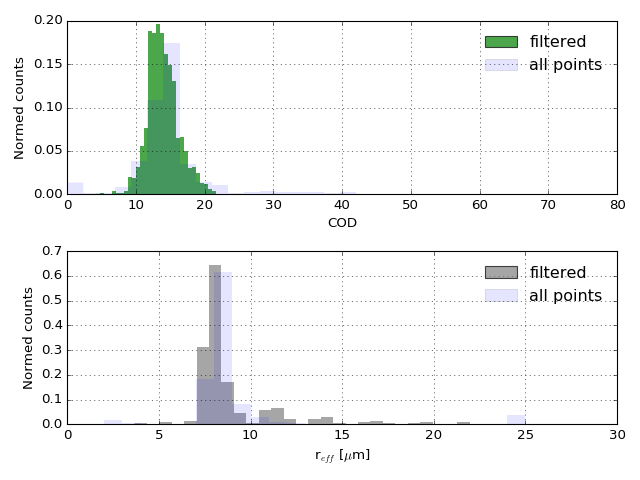

In [107]:
fig,ax = plt.subplots(2,1)
ax = ax.ravel()
ax[0].hist(ar['tau_fl'],bins=30,edgecolor='None',color='g',alpha=0.7,normed=True,label='filtered')
ax[0].hist(ar['tau'],bins=30,edgecolor='None',color='b',alpha=0.1,normed=True,range=(0,70),label='all points')
ax[0].set_ylabel('Normed counts')
ax[0].set_xlabel('COD')
ax[0].grid()
#pu.prelim(ax=ax[0])
ax[0].legend(frameon=False)

ax[1].hist(ar['ref_fl'],bins=30,edgecolor='None',color='grey',alpha=0.7,normed=True,label='filtered')
ax[1].hist(ar['ref'],bins=30,edgecolor='None',color='b',alpha=0.1,normed=True,range=(0,30),label='all points')
ax[1].set_ylabel('Normed counts')
ax[1].set_xlabel('r$_{{eff}}$ [$\\mu$m]')
plt.grid()
#pu.prelim(ax=ax[1])
plt.legend(frameon=False)

plt.tight_layout()

plt.savefig(fp+'..//zen_ict/v5/{}_ref_cod_hist.png'.format(vr),transparent=True,dpi=600)

# Evaluate the Cloud Radiative Effect (CRE) from calculated retrieved values

Based on the calculations of CRE found in Link to [ORACLES_cld_CRE](ORACLES_cld_CRE.ipynb)

After running calculations on Pleaides, results are read in and operated

## Load results

In [11]:
fp

u'/mnt/c/Users/sleblanc/Research/ORACLES/starzen/'

In [12]:
c = hs.loadmat(fp+'../rtm/ORACLES_CRE_{}.mat'.format('v2'))

In [13]:
c.keys()

[u'star_aero_CRE',
 u'star_noaero_C',
 u'star_noaero_CRE',
 u'star_noaero_CRE_clear',
 u'star_aero_CRE_clear',
 u'star_aero_C']

In [14]:
c['star_aero_C']

array([[ -45.9273323 ,  -46.48854   ,  -43.07040923],
       [ -46.7963013 ,  -47.36605   ,  -43.88047923],
       [ -47.232753  ,  -47.80663   ,  -44.28713922],
       ..., 
       [ -62.406951  ,  -64.31951   ,  -59.02220922],
       [-201.167639  , -200.14736   , -182.99878665],
       [-177.190489  , -176.12333   , -161.21438713]])

In [16]:
c['star_aero_CRE'].keys()

[u'dn', u'up']

In [21]:
CRE_aero = c['star_aero_CRE']['up'][:,2] -c['star_aero_CRE_clear']['up'][:,2] 
CRE_noaero = c['star_noaero_CRE']['up'][:,2] -c['star_noaero_CRE_clear']['up'][:,2] 

## Start plotting results of CRE

In [15]:
import plotting_utils as pu

<IPython.core.display.Javascript object>


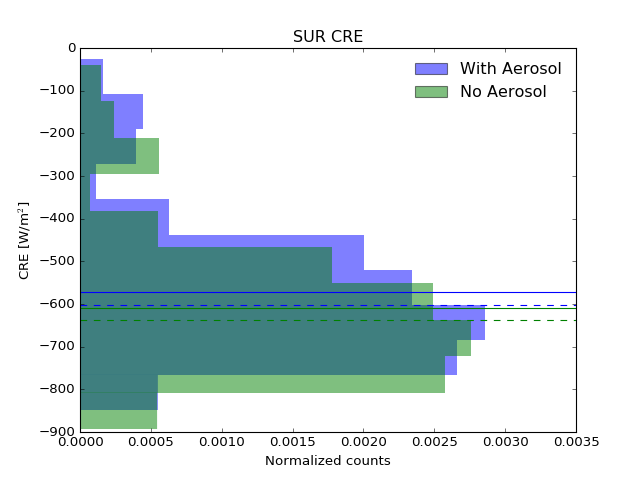

In [47]:
plt.figure()
plt.hist(c['star_aero_C'][:,0],alpha=0.5,label='With Aerosol',edgecolor='None',normed=True,orientation='horizontal')
plt.hist(c['star_noaero_C'][:,0],alpha=0.5,label='No Aerosol',edgecolor='None',normed=True,orientation='horizontal')
plt.axhline(np.nanmean(c['star_aero_C'][:,0]))
plt.axhline(np.nanmedian(c['star_aero_C'][:,0]),linestyle='--')

plt.axhline(np.nanmean(c['star_noaero_C'][:,0]),color='g')
plt.axhline(np.nanmedian(c['star_noaero_C'][:,0]),color='g',linestyle='--')

plt.xlim(0,0.0035)
plt.legend(frameon=False,loc=1)
plt.ylabel('CRE [W/m$^2$]')
plt.title('SUR CRE')
plt.xlabel('Normalized counts')
plt.savefig(fp_plot+'ORACLES_SUR_CRE_4STAR.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


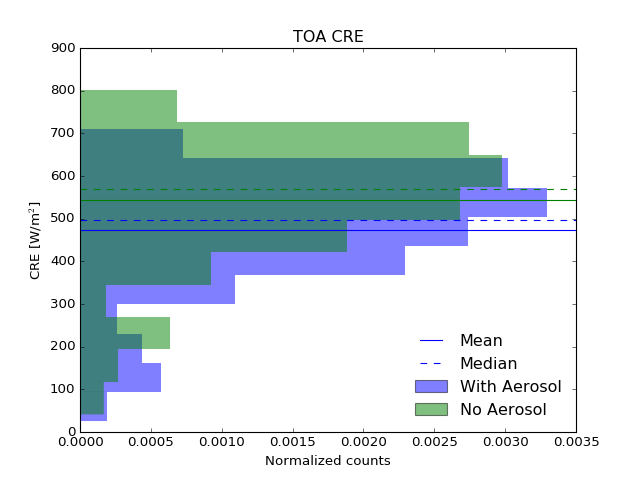

In [48]:
plt.figure()
plt.hist(CRE_aero,alpha=0.5,label='With Aerosol',edgecolor='None',normed=True,orientation='horizontal')
plt.hist(CRE_noaero,alpha=0.5,label='No Aerosol',edgecolor='None',normed=True,orientation='horizontal')
plt.axhline(np.nanmean(CRE_aero),label='Mean')
plt.axhline(np.nanmedian(CRE_aero),linestyle='--',label='Median')

plt.axhline(np.nanmean(CRE_noaero),color='g')
plt.axhline(np.nanmedian(CRE_noaero),color='g',linestyle='--')
plt.xlim(0,0.0035)
plt.legend(frameon=False,loc=4)
plt.ylabel('CRE [W/m$^2$]')
plt.title('TOA CRE')
plt.xlabel('Normalized counts')
plt.savefig(fp_plot+'ORACLES_TOA_CRE_4STAR.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


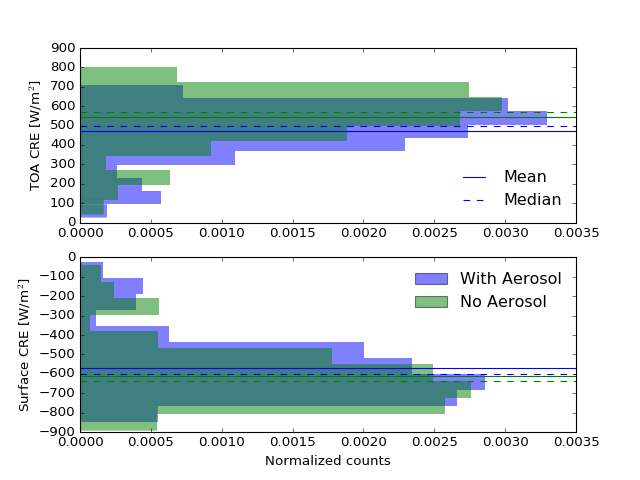

In [50]:
plt.figure()
plt.subplot(2,1,1)
plt.hist(CRE_aero,alpha=0.5,edgecolor='None',normed=True,orientation='horizontal')
plt.hist(CRE_noaero,alpha=0.5,edgecolor='None',normed=True,orientation='horizontal')
plt.axhline(np.nanmean(CRE_aero),label='Mean')
plt.axhline(np.nanmedian(CRE_aero),linestyle='--',label='Median')

plt.axhline(np.nanmean(CRE_noaero),color='g')
plt.axhline(np.nanmedian(CRE_noaero),color='g',linestyle='--')
plt.xlim(0,0.0035)
plt.legend(frameon=False,loc=4)
plt.ylabel('TOA CRE [W/m$^2$]')

plt.subplot(2,1,2)
plt.hist(c['star_aero_C'][:,0],alpha=0.5,label='With Aerosol',edgecolor='None',normed=True,orientation='horizontal')
plt.hist(c['star_noaero_C'][:,0],alpha=0.5,label='No Aerosol',edgecolor='None',normed=True,orientation='horizontal')
plt.axhline(np.nanmean(c['star_aero_C'][:,0]))
plt.axhline(np.nanmedian(c['star_aero_C'][:,0]),linestyle='--')

plt.axhline(np.nanmean(c['star_noaero_C'][:,0]),color='g')
plt.axhline(np.nanmedian(c['star_noaero_C'][:,0]),color='g',linestyle='--')

plt.xlim(0,0.0035)
plt.legend(frameon=False,loc=1)
plt.ylabel('Surface CRE [W/m$^2$]')
plt.xlabel('Normalized counts')
plt.savefig(fp_plot+'ORACLES_SUR_TOA_CRE_4STAR.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


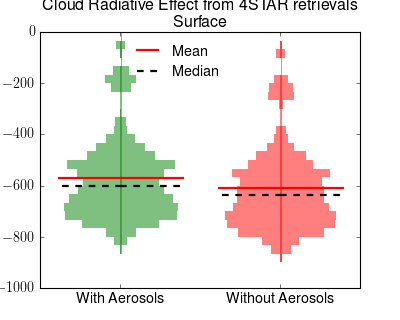

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\matplotlib\axes\_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [42]:
fig = plt.figure(figsize=(5,4))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8],ylim=[-1000,0],xlim=[-0.5,1.5])
ax1.set_ylabel('Cloud Radiative Effect [W/m$^2$]')
ax1.set_title('Cloud Radiative Effect from 4STAR retrievals\nSurface')
ax1.set_xticks([0,1])
ax1.set_xticklabels(['With Aerosols','Without Aerosols'])
pu.plot_vert_hist(fig,ax1,c['star_aero_C'][:,0],0,[-1000,0],legend=True,onlyhist=False,loc=2,color='g',bins=30)
pu.plot_vert_hist(fig,ax1,c['star_noaero_C'][:,0],1,[-1000,0],legend=True,color='r',bins=30)
plt.savefig(fp+'../plot/ORACLES_surface_CRE_4STAR.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


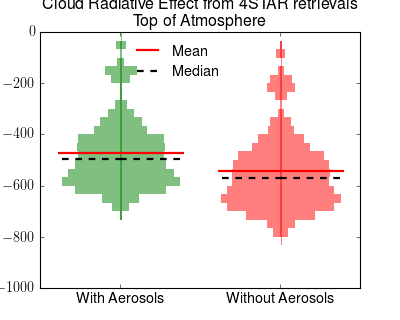

In [43]:
fig = plt.figure(figsize=(5,4))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8],ylim=[-1000,0],xlim=[-0.5,1.5])
ax1.set_ylabel('Cloud Radiative Effect [W/m$^2$]')
ax1.set_title('Cloud Radiative Effect from 4STAR retrievals\nTop of Atmosphere')
ax1.set_xticks([0,1])
ax1.set_xticklabels(['With Aerosols','Without Aerosols'])
pu.plot_vert_hist(fig,ax1,c['star_aero_C'][:,2],0,[-1000,0],legend=True,onlyhist=False,loc=2,color='g',bins=30)
pu.plot_vert_hist(fig,ax1,c['star_noaero_C'][:,2],1,[-1000,0],legend=True,color='r',bins=30)
plt.savefig(fp+'../plot/ORACLES_CRE_toa_4STAR.png',transparent=True,dpi=600)

In [48]:
print 'Surface CRE'
print 'mean aero: {}, no aero: {}'.format(np.nanmean(c['star_aero_C'][:,0]),np.nanmean(c['star_noaero_C'][:,0]))
print 'median aero: {}, no aero: {}'.format(np.nanmedian(c['star_aero_C'][:,0]),np.nanmedian(c['star_noaero_C'][:,0]))
print 'std aero: {}, no aero: {}'.format(np.nanstd(c['star_aero_C'][:,0]),np.nanstd(c['star_noaero_C'][:,0]))

Surface CRE
mean aero: -571.210240685, no aero: -610.312619598
median aero: -601.360284941, no aero: -638.132627512
std aero: 160.861793015, no aero: 162.326799866


In [49]:
print 'TOA CRE'
print 'mean aero: {}, no aero: {}'.format(np.nanmean(c['star_aero_C'][:,2]),np.nanmean(c['star_noaero_C'][:,2]))
print 'median aero: {}, no aero: {}'.format(np.nanmedian(c['star_aero_C'][:,2]),np.nanmedian(c['star_noaero_C'][:,2]))
print 'std aero: {}, no aero: {}'.format(np.nanstd(c['star_aero_C'][:,2]),np.nanstd(c['star_noaero_C'][:,2]))

TOA CRE
mean aero: -473.465602992, no aero: -544.230326019
median aero: -496.637744272, no aero: -569.149741202
std aero: 136.162857642, no aero: 147.735737961


<IPython.core.display.Javascript object>


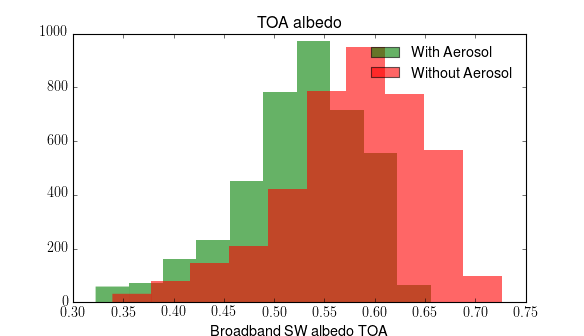

In [50]:
plt.figure()
plt.hist(c['star_aero_CRE']['up'][:,2]/c['star_aero_CRE']['dn'][:,2],normed=False,edgecolor='None',color='g',
         alpha=0.6,label='With Aerosol')
plt.hist(c['star_noaero_CRE']['up'][:,2]/c['star_noaero_CRE']['dn'][:,2],normed=False,edgecolor='None',color='r',
         alpha=0.6,label='Without Aerosol')
plt.xlabel('Broadband SW albedo TOA')
plt.legend(frameon=False)
plt.title('TOA albedo')
plt.savefig(fp+'../plot/ORACLES_albedo_toa_4STAR.png',transparent=True,dpi=600)

## calculate and plot the relative CRE

### Setup alternate calculations

In [51]:
rCRE_sur_aero = c['star_aero_C'][:,0]/c['star_aero_CRE_clear']['dn'][:,2]*100.0 
rCRE_sur_noaero = c['star_noaero_C'][:,0]/c['star_aero_CRE_clear']['dn'][:,2]*100.0 
rCRE_toa_aero = CRE_aero/c['star_aero_CRE_clear']['dn'][:,2]*100.0 
rCRE_toa_noaero = CRE_noaero/c['star_aero_CRE_clear']['dn'][:,2]*100.0

In [52]:
rCRE_sur_daero = rCRE_sur_aero-rCRE_sur_noaero
rCRE_toa_daero = rCRE_toa_aero-rCRE_toa_noaero

<IPython.core.display.Javascript object>


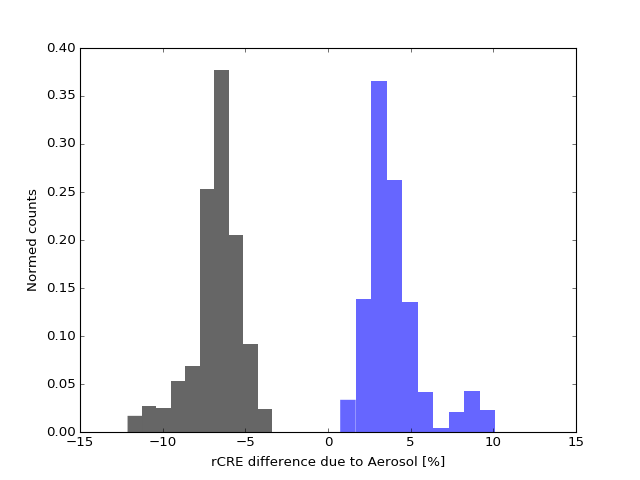

In [55]:
plt.figure()
plt.hist(rCRE_sur_daero,normed=True,edgecolor='None',color='blue',alpha=0.6,label='Surface')
plt.hist(rCRE_toa_daero,normed=True,edgecolor='None',color='k',alpha=0.6,label='TOA')
plt.xlabel('rCRE difference due to Aerosol [%]')
plt.ylabel('Normed counts')

<IPython.core.display.Javascript object>


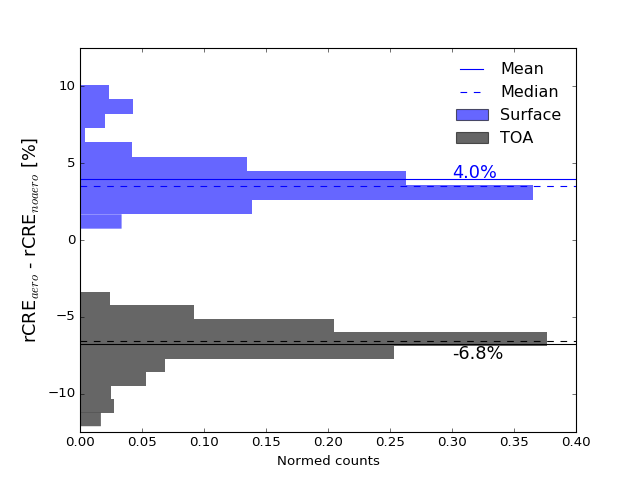

In [69]:
plt.figure()
plt.hist(rCRE_sur_daero,normed=True,edgecolor='None',color='blue',alpha=0.6,label='Surface',orientation='horizontal')
plt.hist(rCRE_toa_daero,normed=True,edgecolor='None',color='k',alpha=0.6,label='TOA',orientation='horizontal')

plt.axhline(np.nanmean(rCRE_sur_daero),color='b',label='Mean')
plt.axhline(np.nanmedian(rCRE_sur_daero),color='b',linestyle='--',label='Median')
plt.text(0.3,np.nanmean(rCRE_sur_daero)+0.1,'{:3.1f}%'.format(np.nanmean(rCRE_sur_daero)),
         color='b',fontsize=16)

plt.axhline(np.nanmean(rCRE_toa_daero),color='k')
plt.axhline(np.nanmedian(rCRE_toa_daero),color='k',linestyle='--')
plt.text(0.3,np.nanmean(rCRE_toa_daero)-0.1,'{:3.1f}%'.format(np.nanmean(rCRE_toa_daero)),
         color='k',verticalalignment='top',fontsize=16)

plt.legend(frameon=False)

plt.ylabel('rCRE$_{{aero}}$ - rCRE$_{{no aero}}$ [%]',fontsize=16)
plt.xlabel('Normed counts')
plt.ylim(-12.5,12.5)

plt.savefig(fp_plot+'ORACLES_SUR_TOA_rCRE_dAOD.png',transparent=True,dpi=600)

In [72]:
np.nanstd(rCRE_sur_daero), np.nanstd(rCRE_toa_daero)

(1.7461204529455838, 1.4628634550836628)

### Use previous calculations

In [62]:
star_aero_rC = np.zeros_like(c['star_aero_C'])
star_noaero_rC = np.zeros_like(c['star_aero_C'])

In [88]:
star_aero_rC[:,0] = c['star_aero_C'][:,0]/c['star_aero_CRE']['dn'][:,2]*100.0
star_aero_rC[:,1] = c['star_aero_C'][:,1]/c['star_aero_CRE']['dn'][:,2]*100.0
star_aero_rC[:,2] = c['star_aero_C'][:,2]/c['star_aero_CRE']['dn'][:,2]*100.0
star_noaero_rC[:,0] = c['star_noaero_C'][:,0]/c['star_noaero_CRE']['dn'][:,2]*100.0
star_noaero_rC[:,1] = c['star_noaero_C'][:,1]/c['star_noaero_CRE']['dn'][:,2]*100.0
star_noaero_rC[:,2] = c['star_noaero_C'][:,2]/c['star_noaero_CRE']['dn'][:,2]*100.0

In [91]:
star_aero_rC_abc = np.zeros_like(c['star_aero_C'])
star_noaero_rC_abc = np.zeros_like(c['star_aero_C'])

star_aero_rC_abc[:,0] = c['star_aero_C'][:,0]/c['star_aero_CRE']['dn'][:,1]*100.0
star_noaero_rC_abc[:,0] = c['star_noaero_C'][:,0]/c['star_noaero_CRE']['dn'][:,1]*100.0

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


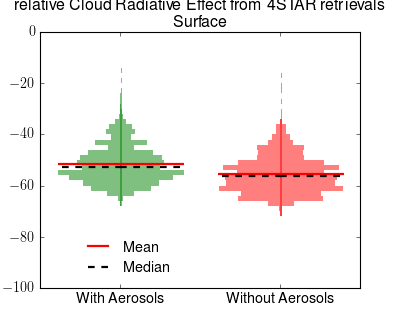

In [89]:
fig = plt.figure(figsize=(5,4))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8],ylim=[-100,0],xlim=[-0.5,1.5])
ax1.set_ylabel('relative Cloud Radiative Effect [\%]')
ax1.set_title('relative Cloud Radiative Effect from 4STAR retrievals\nSurface')
ax1.set_xticks([0,1])
ax1.set_xticklabels(['With Aerosols','Without Aerosols'])
pu.plot_vert_hist(fig,ax1,star_aero_rC[:,0],0,[-100,0],legend=True,onlyhist=False,loc=4,color='g',bins=50)
pu.plot_vert_hist(fig,ax1,star_noaero_rC[:,0],1,[-100,0],legend=True,color='r',bins=50)
plt.savefig(fp+'../plot/ORACLES_rCRE_surface_4STAR.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


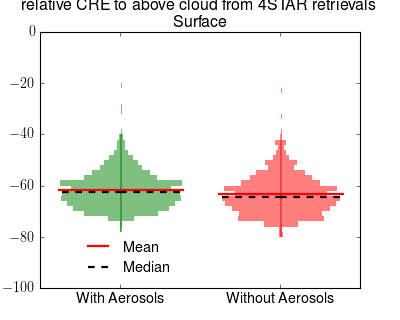

In [90]:
fig = plt.figure(figsize=(5,4))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8],ylim=[-100,0],xlim=[-0.5,1.5])
ax1.set_ylabel('relative Cloud Radiative Effect [\%]')
ax1.set_title('relative CRE to above cloud from 4STAR retrievals\nSurface')
ax1.set_xticks([0,1])
ax1.set_xticklabels(['With Aerosols','Without Aerosols'])
pu.plot_vert_hist(fig,ax1,c['star_aero_C'][:,0]/c['star_aero_CRE']['dn'][:,1]*100.0,0,[-100,0],legend=True,onlyhist=False,loc=4,color='g',bins=50)
pu.plot_vert_hist(fig,ax1,c['star_noaero_C'][:,0]/c['star_noaero_CRE']['dn'][:,1]*100.0,1,[-100,0],legend=True,color='r',bins=50)
plt.savefig(fp+'../plot/ORACLES_rCRE_above_cloud_for_surface_4STAR.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


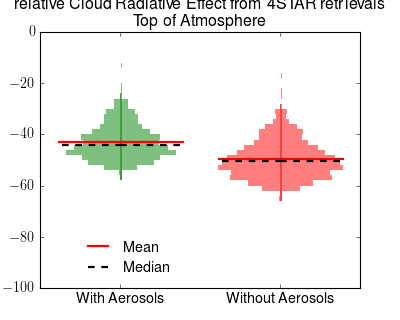

In [84]:
fig = plt.figure(figsize=(5,4))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8],ylim=[-100,0],xlim=[-0.5,1.5])
ax1.set_ylabel('relative Cloud Radiative Effect [\%]')
ax1.set_title('relative Cloud Radiative Effect from 4STAR retrievals\nTop of Atmosphere')
ax1.set_xticks([0,1])
ax1.set_xticklabels(['With Aerosols','Without Aerosols'])
pu.plot_vert_hist(fig,ax1,star_aero_rC[:,2],0,[-100,0],legend=True,onlyhist=False,loc=4,color='g',bins=50)
pu.plot_vert_hist(fig,ax1,star_noaero_rC[:,2],1,[-100,0],legend=True,color='r',bins=50)
plt.savefig(fp+'../plot/ORACLES_rCRE_toa_4STAR.png',transparent=True,dpi=600)

In [85]:
print 'Surface rCRE'
print 'mean aero: {}, no aero: {}'.format(np.nanmean(star_aero_rC[:,0]),np.nanmean(star_noaero_rC[:,0]))
print 'median aero: {}, no aero: {}'.format(np.nanmedian(star_aero_rC[:,0]),np.nanmedian(star_noaero_rC[:,0]))
print 'std aero: {}, no aero: {}'.format(np.nanstd(star_aero_rC[:,0]),np.nanstd(star_noaero_rC[:,0]))

Surface rCRE
mean aero: -51.5566189351, no aero: -63.4650491684
median aero: -52.8564701366, no aero: -64.2776485233
std aero: 7.50382921486, no aero: 7.36365813911


In [86]:
print 'TOA rCRE'
print 'mean aero: {}, no aero: {}'.format(np.nanmean(star_aero_rC[:,2]),np.nanmean(star_noaero_rC[:,2]))
print 'median aero: {}, no aero: {}'.format(np.nanmedian(star_aero_rC[:,2]),np.nanmedian(star_noaero_rC[:,2]))
print 'std aero: {}, no aero: {}'.format(np.nanstd(star_aero_rC[:,2]),np.nanstd(star_noaero_rC[:,2]))

TOA rCRE
mean aero: -42.8515919398, no aero: -49.6147994146
median aero: -43.978884687, no aero: -50.5205118444
std aero: 6.80759225767, no aero: 7.14408025099


## plot the aerosol forcing

In [68]:
c.keys()

[u'star_aero_CRE',
 u'star_noaero_C',
 u'star_noaero_CRE',
 u'star_noaero_CRE_clear',
 u'star_aero_CRE_clear',
 u'star_aero_C']

<IPython.core.display.Javascript object>


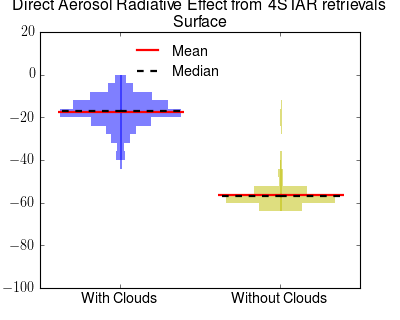

In [69]:
fig = plt.figure(figsize=(5,4))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8],ylim=[-100,20],xlim=[-0.5,1.5])
ax1.set_ylabel('Direct Aerosol Radiative Effect [W/m$^2$]')
ax1.set_title('Direct Aerosol Radiative Effect from 4STAR retrievals\nSurface')
ax1.set_xticks([0,1])
ax1.set_xticklabels(['With Clouds','Without Clouds'])
DAREs = (c['star_aero_CRE']['dn'][:,0]-c['star_aero_CRE']['up'][:,0])-(c['star_noaero_CRE']['dn'][:,0]-c['star_noaero_CRE']['up'][:,0])
DAREs_clear = (c['star_aero_CRE_clear']['dn'][:,0]-c['star_aero_CRE_clear']['up'][:,0])-(c['star_noaero_CRE_clear']['dn'][:,0]-c['star_noaero_CRE_clear']['up'][:,0])
pu.plot_vert_hist(fig,ax1,DAREs,0,[-100,20],legend=True,onlyhist=False,loc=2,color='b',bins=30)
pu.plot_vert_hist(fig,ax1,DAREs_clear,1,[-100,20],legend=True,color='y',bins=30)
plt.savefig(fp+'../plot/ORACLES_DARE_surface_4STAR.png',transparent=True,dpi=600)

In [70]:
print 'Surface DARE'
print 'mean clouds: {}, no clouds: {}'.format(np.nanmean(DAREs),np.nanmean(DAREs_clear))
print 'median clouds: {}, no clouds: {}'.format(np.nanmedian(DAREs),np.nanmedian(DAREs_clear))
print 'std clouds: {}, no clouds: {}'.format(np.nanstd(DAREs),np.nanstd(DAREs_clear))

Surface DARE
mean clouds: -17.3870145784, no clouds: -56.4893934921
median clouds: -17.0328, no clouds: -57.105685
std clouds: 7.52116641462, no clouds: 5.49123351814


<IPython.core.display.Javascript object>


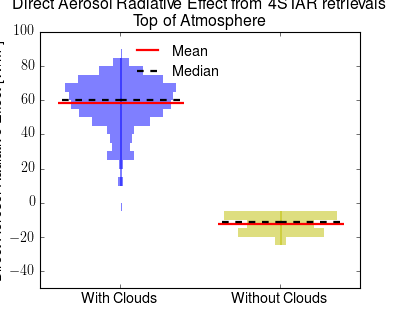

In [71]:
fig = plt.figure(figsize=(5,4))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8],ylim=[-50,100],xlim=[-0.5,1.5])
ax1.set_ylabel('Direct Aerosol Radiative Effect [W/m$^2$]')
ax1.set_title('Direct Aerosol Radiative Effect from 4STAR retrievals\nTop of Atmosphere')
ax1.set_xticks([0,1])
ax1.set_xticklabels(['With Clouds','Without Clouds'])
DAREt = (c['star_aero_CRE']['dn'][:,2]-c['star_aero_CRE']['up'][:,2])-\
       (c['star_noaero_CRE']['dn'][:,2]-c['star_noaero_CRE']['up'][:,2])
DAREt_clear = (c['star_aero_CRE_clear']['dn'][:,2]-c['star_aero_CRE_clear']['up'][:,2])-\
             (c['star_noaero_CRE_clear']['dn'][:,2]-c['star_noaero_CRE_clear']['up'][:,2])
pu.plot_vert_hist(fig,ax1,DAREt,0,[-50,100],legend=True,onlyhist=False,loc=2,color='b',bins=30)
pu.plot_vert_hist(fig,ax1,DAREt_clear,1,[-50,100],legend=True,color='y',bins=30)
plt.savefig(fp+'../plot/ORACLES_DARE_toa_4STAR.png',transparent=True,dpi=600)

In [72]:
print 'TOA DARE'
print 'mean clouds: {}, no clouds: {}'.format(np.nanmean(DAREt),np.nanmean(DAREt_clear))
print 'median clouds: {}, no clouds: {}'.format(np.nanmedian(DAREt),np.nanmedian(DAREt_clear))
print 'std clouds: {}, no clouds: {}'.format(np.nanstd(DAREt),np.nanstd(DAREt_clear))

TOA DARE
mean clouds: 58.1258777631, no clouds: -12.6388452634
median clouds: 60.3205981959, no clouds: -11.4949634139
std clouds: 14.2642682735, no clouds: 4.27571125869


### Calculate the relative forcing efficiency

In [73]:
tau_500 = 0.3689

In [74]:
rfes = DAREs/c['star_aero_CRE']['dn'][:,2]*100.0/tau_500
rfes_clear = DAREs_clear/c['star_aero_CRE']['dn'][:,2]*100.0/tau_500
rfet = DAREt/c['star_aero_CRE']['dn'][:,2]*100.0/tau_500
rfet_clear = DAREt_clear/c['star_aero_CRE']['dn'][:,2]*100.0/tau_500 

<IPython.core.display.Javascript object>


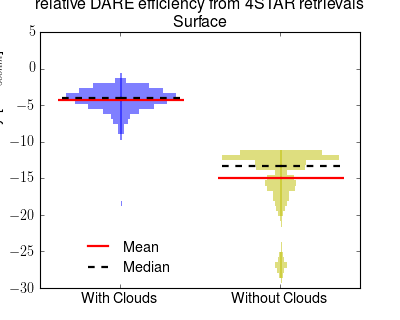

In [75]:
fig = plt.figure(figsize=(5,4))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8],ylim=[-30,5],xlim=[-0.5,1.5])
ax1.set_ylabel('relative DARE efficiency [\%/$\\tau_{{500nm}}$]')
ax1.set_title('relative DARE efficiency from 4STAR retrievals\nSurface')
ax1.set_xticks([0,1])
ax1.set_xticklabels(['With Clouds','Without Clouds'])
pu.plot_vert_hist(fig,ax1,rfes,0,[-30,5],legend=True,onlyhist=False,loc=4,color='b',bins=50)
pu.plot_vert_hist(fig,ax1,rfes_clear,1,[-30,5],legend=True,color='y',bins=50)
plt.savefig(fp+'../plot/ORACLES_rDAREe_surface_4STAR.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


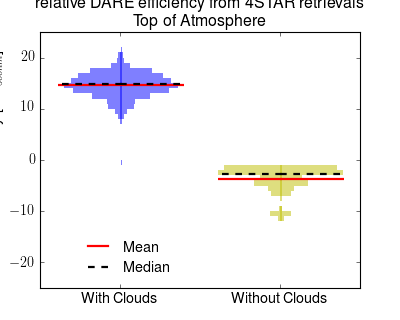

In [76]:
fig = plt.figure(figsize=(5,4))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8],ylim=[-25,25],xlim=[-0.5,1.5])
ax1.set_ylabel('relative DARE efficiency [\%/$\\tau_{{500nm}}$]')
ax1.set_title('relative DARE efficiency from 4STAR retrievals\nTop of Atmosphere')
ax1.set_xticks([0,1])
ax1.set_xticklabels(['With Clouds','Without Clouds'])
pu.plot_vert_hist(fig,ax1,rfet,0,[-25,25],legend=True,onlyhist=False,loc=4,color='b',bins=50)
pu.plot_vert_hist(fig,ax1,rfet_clear,1,[-25,25],legend=True,color='y',bins=50)
plt.savefig(fp+'../plot/ORACLES_rDAREe_TOA_4STAR.png',transparent=True,dpi=600)

In [77]:
print 'Surface rDAREe'
print 'mean clouds: {}, no clouds: {}'.format(np.nanmean(rfes),np.nanmean(rfes_clear))
print 'median clouds: {}, no clouds: {}'.format(np.nanmedian(rfes),np.nanmedian(rfes_clear))
print 'std clouds: {}, no clouds: {}'.format(np.nanstd(rfes),np.nanstd(rfes_clear))

Surface rDAREe
mean clouds: -4.25692700649, no clouds: -14.9656845128
median clouds: -4.07386415135, no clouds: -13.2668053669
std clouds: 1.51791778537, no clouds: 4.17894544221


In [78]:
print 'TOA rDAREe'
print 'mean clouds: {}, no clouds: {}'.format(np.nanmean(rfet),np.nanmean(rfet_clear))
print 'median clouds: {}, no clouds: {}'.format(np.nanmedian(rfet),np.nanmedian(rfet_clear))
print 'std clouds: {}, no clouds: {}'.format(np.nanstd(rfet),np.nanstd(rfet_clear))

TOA rDAREe
mean clouds: 14.6467516968, no clouds: -3.68669248005
median clouds: 14.7500256637, no clouds: -2.67401308961
std clouds: 2.36190007496, no clouds: 2.49790287116


## Calculate the impact of aerosol on CRE

<IPython.core.display.Javascript object>


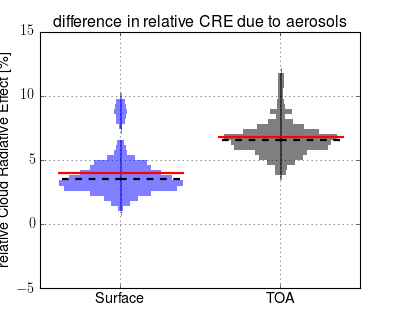

In [138]:
fig = plt.figure(figsize=(5,4))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8],ylim=[-5,15],xlim=[-0.5,1.5])
ax1.set_ylabel('relative Cloud Radiative Effect [\%]')
ax1.set_title('difference in relative CRE due to aerosols')
ax1.set_xticks([0,1])
ax1.set_xticklabels(['Surface','TOA'])
pu.plot_vert_hist(fig,ax1,star_aero_rC[:,0]-star_noaero_rC[:,0],0,[-5,15],legend=True,onlyhist=True,loc=4,color='b',bins=50)
pu.plot_vert_hist(fig,ax1,star_aero_rC[:,2]-star_noaero_rC[:,2],1,[-5,15],legend=True,color='k',bins=50)
ax1.grid()
plt.savefig(fp+'../plot/ORACLES_rCRE_from_aerosol_4STAR.png',transparent=True,dpi=600)

In [139]:
print 'difference in relative CRE due to aerosol'
print 'mean, surface: {}, toa: {}'.format(np.nanmean(star_aero_rC[:,0]-star_noaero_rC[:,0]),np.nanmean(star_aero_rC[:,2]-star_noaero_rC[:,2]))

difference in relative CRE due to aerosol
mean, surface: 3.95046055309, toa: 6.7632074748


<IPython.core.display.Javascript object>


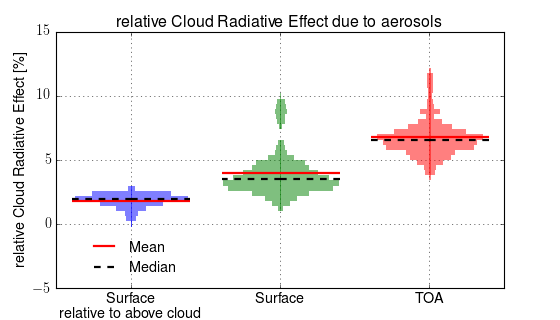

In [127]:
fig = plt.figure(figsize=(7,4))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8],ylim=[-5,15],xlim=[-0.5,2.5])
ax1.set_ylabel('relative Cloud Radiative Effect [\%]')
ax1.set_title('relative Cloud Radiative Effect due to aerosols')
ax1.set_xticks([0,1,2])
ax1.set_xticklabels(['Surface\nrelative to above cloud','Surface','TOA'])
pu.plot_vert_hist(fig,ax1,star_aero_rC_abc[:,0]-star_noaero_rC_abc[:,0],0,[-5,15],legend=True,onlyhist=False,loc=4,color='b',bins=50)
pu.plot_vert_hist(fig,ax1,star_aero_rC[:,0]-star_noaero_rC[:,0],1,[-5,15],legend=True,onlyhist=True,loc=4,color='g',bins=50)
pu.plot_vert_hist(fig,ax1,star_aero_rC[:,2]-star_noaero_rC[:,2],2,[-5,15],legend=True,color='r',bins=50)
ax1.grid()
plt.savefig(fp+'../plot/ORACLES_rCRE_from_aerosol_abc_4STAR.png',transparent=True,dpi=600)

In [98]:
c.keys()

[u'star_aero_CRE',
 u'star_noaero_C',
 u'star_noaero_CRE',
 u'star_noaero_CRE_clear',
 u'star_aero_CRE_clear',
 u'star_aero_C']

In [101]:
c['star_aero_C'].shape

(4072L, 3L)

In [107]:
ar.keys()

[u'fl_alt',
 u'tau',
 u'sza',
 u'lat_fl',
 u'lat',
 u'alt',
 u'lon_fl',
 u'alt_fl',
 u'lon',
 u'tau_fl',
 u'ref',
 u'fl_ki',
 u'utc_fl',
 u'delta',
 u'phase',
 u'fl',
 u'fl_match',
 u'utc',
 u'ref_fl',
 u'days',
 u'fl_incld',
 u'ki']

In [108]:
ar['tau_fl'].shape

(4072L,)

<IPython.core.display.Javascript object>


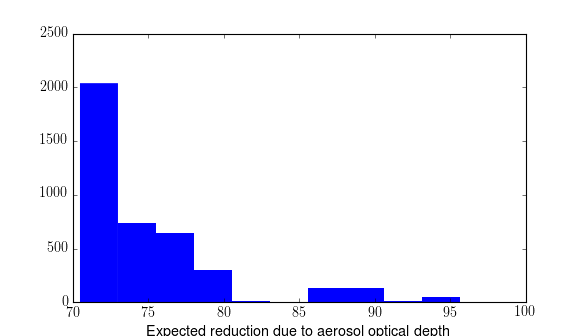

In [112]:
plt.figure()
plt.hist(np.exp(-1.0*0.36*np.cos(ar['sza'][ar['fl'].astype(bool)]*np.pi/180.0))*100.0,edgecolor='None')
plt.xlabel('Expected reduction due to aerosol optical depth')
#plt.title('TOA albedo')
#plt.savefig(fp+'../plot/ORACLES_albedo_toa_4STAR.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


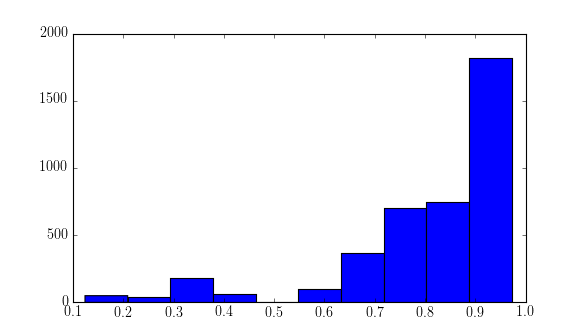

(array([   50.,    40.,   178.,    65.,     2.,   102.,   367.,   706.,
          744.,  1818.]),
 array([ 0.12385716,  0.20871939,  0.29358162,  0.37844384,  0.46330607,
         0.5481683 ,  0.63303052,  0.71789275,  0.80275498,  0.8876172 ,
         0.97247943]),
 <a list of 10 Patch objects>)

In [115]:
plt.figure()
plt.hist( np.cos(ar['sza'][ar['fl'].astype(bool)]*np.pi/180.0) )

In [117]:
np.cos(4*np.pi/180)

0.9975640502598242

In [118]:
1.0/np.cos(45.0*np.pi/180.0)

1.4142135623730949

Ratio the expected reduction due to aerosol

In [119]:
aero_tau_ratio = np.exp(-1.0*0.36*np.cos(ar['sza'][ar['fl'].astype(bool)]*np.pi/180.0))

<IPython.core.display.Javascript object>


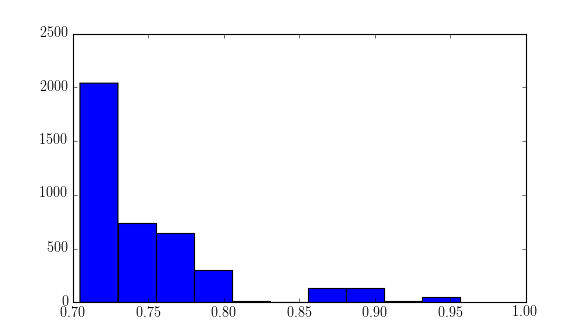

(array([ 2039.,   741.,   642.,   301.,    14.,     4.,   134.,   133.,
           14.,    50.]),
 array([ 0.70462284,  0.72979965,  0.75497645,  0.78015325,  0.80533006,
         0.83050686,  0.85568367,  0.88086047,  0.90603727,  0.93121408,
         0.95639088]),
 <a list of 10 Patch objects>)

In [123]:
plt.figure()
plt.hist(aero_tau_ratio)

In [120]:
print 'Surface CRE'
print 'mean aero: {}, no aero: {}'.format(np.nanmean(c['star_aero_C'][:,0]),np.nanmean(c['star_noaero_C'][:,0]))
print 'median aero: {}, no aero: {}'.format(np.nanmedian(c['star_aero_C'][:,0]),np.nanmedian(c['star_noaero_C'][:,0]))
print 'std aero: {}, no aero: {}'.format(np.nanstd(c['star_aero_C'][:,0]),np.nanstd(c['star_noaero_C'][:,0]))

Surface CRE
mean aero: -571.210240685, no aero: -610.312619598
median aero: -601.360284941, no aero: -638.132627512
std aero: 160.861793015, no aero: 162.326799866


In [122]:
print 'Surface CRE corrected for ratio'
print 'mean aero: {}, no aero: {}'.format(np.nanmean(c['star_aero_C'][:,0]),np.nanmean(c['star_noaero_C'][:,0]*aero_tau_ratio))
print 'median aero: {}, no aero: {}'.format(np.nanmedian(c['star_aero_C'][:,0]),np.nanmedian(c['star_noaero_C'][:,0]*aero_tau_ratio))
print 'std aero: {}, no aero: {}'.format(np.nanstd(c['star_aero_C'][:,0]),np.nanstd(c['star_noaero_C'][:,0]*aero_tau_ratio))


Surface CRE corrected for ratio
mean aero: -571.210240685, no aero: -450.041544857
median aero: -601.360284941, no aero: -468.177892148
std aero: 160.861793015, no aero: 106.793228586


In [125]:
-571.2/-610.3

0.9359331476323122

In [134]:
np.exp(-0.1)

0.90483741803595952